In [ ]:
pip install geopandas

In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from datetime import datetime
import folium
from geopy.geocoders import Nominatim
from itertools import combinations
from collections import Counter
import re

In [ ]:
df = pd.read_excel("/content/Online Retail Data Set_1.xlsx")
print(f"The dataset contains {len(df)} transactions.")
#To view all the columns in the dataframe
pd.set_option('display.max_columns' , len(df.columns))
#To view first 100 rows in the dataframe
pd.set_option('display.max_rows' , 100)
df.head(10)


The dataset contains 541909 transactions.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,NaN
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,NaN
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,NaN
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,NaN
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,NaN


In [ ]:
df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France,NaN
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,NaN
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France,NaN
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,NaN
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France,NaN
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,NaN
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,NaN
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,NaN


## **Exploratory Data Analysis before Data Separation**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Unnamed: 8   1 non-null       float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


In [ ]:
df[['Quantity' , 'UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [ ]:
df.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
Unnamed: 8,541908


In [ ]:
#Dropping the columns which does not have any connection in our analysis
df = df.drop(['Unnamed: 8'] , axis = 1)

In [ ]:
#Identifying the duplicate values
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
541904,False
541905,False
541906,False
541907,False


In [ ]:
#Number of duplicate entries
df.duplicated().sum()

np.int64(5268)

In [ ]:
#Dropping the duplicate entries
df.drop_duplicates(inplace = True)

# **Data Separation**

In [ ]:
#As noticed, there are lots of records in the InvoiceNo column which starts with 'C',
#which means the credit notes and hence it is safe to say that these records are of either return records
#or cancelled order returns hence we will be separating the dataframe into two, df_sales and df_returns

#Creating the return dataframe
df_returns = df[df['InvoiceNo'].fillna('').str.startswith('C').fillna(False)].copy()
print("Shape of Credit NOtes DataFrame: " , df_returns.shape)
print("First 5 rows of Credit Notes DataFrame: ")
print(df_returns.head())


Shape of Credit NOtes DataFrame:  (9251, 8)
First 5 rows of Credit Notes DataFrame: 
    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  


<ipython-input-249-e08773af975f>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_returns = df[df['InvoiceNo'].fillna('').str.startswith('C').fillna(False)].copy()


In [ ]:
#Creating the sales dataframe
df_sales = df[~df['InvoiceNo'].fillna('').str.startswith('C').fillna(False)].copy()
print("Shape of Sales DataFrame: " , df_sales.shape)
print("First 5 rows of Sales DataFrame: ")
print(df_sales.head())

Shape of Sales DataFrame:  (527390, 8)
First 5 rows of Sales DataFrame: 
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


<ipython-input-250-c9be2e3fcea1>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sales = df[~df['InvoiceNo'].fillna('').str.startswith('C').fillna(False)].copy()


# **Cleaning of Sales Data**

In [ ]:
#Detecting the Outliers in UnitPrice Column
q1_sales = df_sales['UnitPrice'].quantile(0.25)
q3_sales = df_sales['UnitPrice'].quantile(0.75)
iqr_sales = q3_sales - q1_sales
lower_sales = q1_sales - (1.5 * iqr_sales)
upper_sales = q3_sales + (1.5 * iqr_sales)


In [ ]:
outliers_sales = df_sales[(df_sales['UnitPrice'] < lower_sales) | (df_sales['UnitPrice'] > upper_sales)]

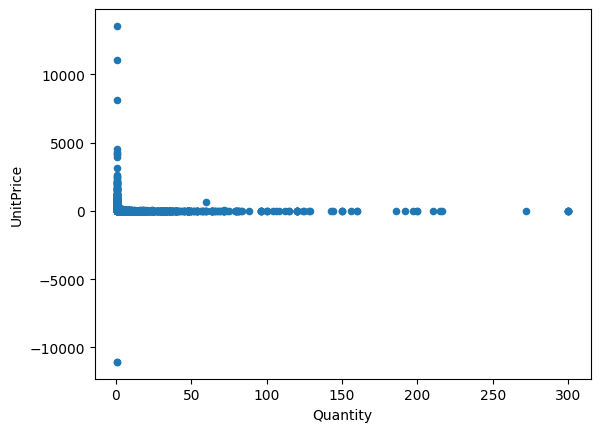

In [ ]:
outliers_sales.plot.scatter(x = 'Quantity' , y = 'UnitPrice')
plt.savefig("Unit_Price_Outlier_Sales.png" , dpi = 200)

In [ ]:
#Detecting the outliers in Quantity Column
q1_sales_1 = df_sales['Quantity'].quantile(0.25)
q3_sales_1 = df_sales['Quantity'].quantile(0.75)
iqr_sales_1 = q3_sales_1 - q1_sales_1
lower_sales_1 = q1_sales_1 - (1.5 * iqr_sales_1)
upper_sales_1 = q3_sales_1 + (1.5 * iqr_sales_1)


In [ ]:
outliers_sales_1 = df_sales[(df_sales['Quantity'] < lower_sales_1) | (df_sales['Quantity'] > upper_sales_1)]

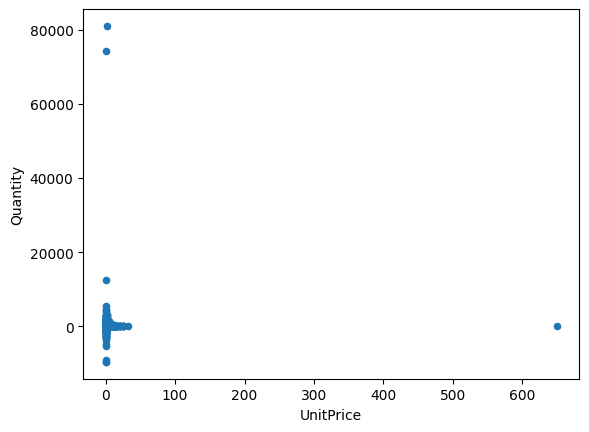

In [ ]:
outliers_sales_1.plot.scatter(x = 'UnitPrice' , y = 'Quantity')
plt.savefig("Quantity_Outlier_Sales.png" , dpi = 200)

In [ ]:
#Treating the Outliers

#Defining the columns to check for outliers
cols_sales = ['Quantity' , 'UnitPrice']

#Set upper and lower limit to detect outliers
low_sales = 0.05
high_sales = 0.95

#Iterate through selected columns
for col in cols_sales:

  #Get quantiles
  q_1_sales = df_sales[col].quantile(low_sales)
  q_3_sales = df_sales[col].quantile(high_sales)
  i_q_r_sales = q_3_sales - q_1_sales

  #Calculate upper and lower bound
  upper_q_sales = q_3_sales + 1.5*i_q_r_sales
  lower_q_sales = q_1_sales - 1.5*i_q_r_sales

  #Trim outliers
  df_sales = df_sales[(df_sales[col] < upper_q_sales) & (df_sales[col] > lower_q_sales)]

#Dataframe without outliers
clean_df_sales = df_sales

In [ ]:
df_sales.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df_sales.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1151
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,131649
Country,0


In [ ]:
#Checking for the negative values in the Quantity column
neg_q_sales = df_sales[df_sales['Quantity'] < 0]
if not neg_q_sales.empty:
  print("Negative Values found in Quantity column of df_sales: ")
  print(neg_q_sales)
else:
  print("No negative values found in Quantity column of df_sales.")
print("-" * 50)

#Checking for the negative values in the UnitPrice column
neg_p_sales = df_sales[df_sales['UnitPrice'] < 0]
if not neg_p_sales.empty:
  print("Negative Values found in UnitPrice column of df_sales: ")
  print(neg_p_sales)
else:
  print("No negative values found in UnitPrice column of df_sales.")

Negative Values found in Quantity column of df_sales: 
       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
2406      536589     21777         NaN       -10 2010-12-01 16:50:00   
4347      536764    84952C         NaN       -38 2010-12-02 14:42:00   
7188      536996     22712         NaN       -20 2010-12-03 15:30:00   
7189      536997     22028         NaN       -20 2010-12-03 15:30:00   
7190      536998     85067         NaN        -6 2010-12-03 15:30:00   
...          ...       ...         ...       ...                 ...   
535322    581199     84581         NaN        -2 2011-12-07 18:26:00   
535323    581200    84508C       check       -21 2011-12-07 18:27:00   
535331    581208    72801C       check       -10 2011-12-07 18:35:00   
535333    581210     23395       check       -26 2011-12-07 18:36:00   
535336    581213     22576       check       -30 2011-12-07 18:38:00   

        UnitPrice  CustomerID         Country  
2406          0.0         NaN  U

In [ ]:
#Checking if all the negative quantity records has 0 unit price
unique_p_for_neg_q = neg_q_sales['UnitPrice'].unique()
print(f"Unique UnitPrice values for the {len(neg_q_sales)} rows with negative Quantity:")
print(unique_p_for_neg_q)
# Check if all UnitPrice values are 0
all_prices_zero = all(neg_q_sales['UnitPrice'] == 0)

if all_prices_zero:
    print("\nAll UnitPrice values for rows with negative Quantity are 0.")
else:
    print("\nNot all UnitPrice values for rows with negative Quantity are 0.")
    # If you want to see the rows where UnitPrice is not 0 for negative quantity:
    non_zero_price_negative_quantity = neg_q_sales[neg_q_sales['UnitPrice'] != 0]
    print("\nRows with negative Quantity and non-zero UnitPrice:")
    print(non_zero_price_negative_quantity)

Unique UnitPrice values for the 803 rows with negative Quantity:
[0.]

All UnitPrice values for rows with negative Quantity are 0.


In [ ]:
#Looking at the Invoice no. column
df_sales['InvoiceNo'].isnull().sum()

np.int64(0)

In [ ]:
#Checking the unique number of values in InvoiceNo column
unique_count = df_sales['InvoiceNo'].nunique()

print("Number of unique invoice numbers: " , unique_count)

Number of unique invoice numbers:  20661


In [ ]:
debt_adjustments = df_sales[df_sales['Description'].str.contains('debt' ,  case = False , na = False)]
print("Number of debt adjustments: " , len(debt_adjustments))

Number of debt adjustments:  0


In [ ]:
#Cleaning the Stock code column

#There are 3 types of stock code in the dataset. First one is only numeric,
# second is alphanumeric and third is only alphabets.
#These transactions seems like the internal business stuff which won't be
#effecting our analysis

sc_sales = df_sales['StockCode'].apply(str)
alphacode_sales = df_sales[~sc_sales.str.contains(r"\d", na = False)]
alphacode_sales.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.0,Germany
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom


In [ ]:
alphacode_sales[['Quantity' , 'UnitPrice']].describe()

,Quantity,UnitPrice
count,1165.000000,1165.000000
mean,3.398283,13.625686
std,5.383984,6.819673
min,1.000000,0.000000
25%,1.000000,10.950000
50%,2.000000,18.000000
75%,4.000000,18.000000
max,72.000000,23.530000


In [ ]:
alphacode_sales['Description'].unique()

array(['POSTAGE', 'Manual', 'Bank Charges', 'DOTCOM POSTAGE',
       'BOYS PARTY BAG', 'GIRLS PARTY BAG', 'PADS TO MATCH ALL CUSHIONS'],
      dtype=object)

In [ ]:
sc_sales = df_sales[df_sales['UnitPrice'] != 0].groupby("Description").agg(
    List = ('StockCode', lambda x : list(set(x))),
    TotalNo = ('StockCode' , lambda x: len(list(set(x))))
).reset_index()
unique_nums = np.sort(sc_sales["TotalNo"].unique())
unique_nums

array([1, 2, 6])

In [ ]:
#Examining cases with exactly two stock codes and checking if the difference
#is just in capitalization.
double_sc_sales = sc_sales[sc_sales["TotalNo"] == 2]
double_sc_sales.head()


,Description,List,TotalNo
46,3 GARDENIA MORRIS BOXED CANDLES,"[85034A, 85034a]",2
60,3 WHITE CHOC MORRIS BOXED CANDLES,"[85034b, 85034B]",2
71,3D DOG PICTURE PLAYING CARDS,"[84558A, 84558a]",2
73,3D SHEET OF CAT STICKERS,"[84559b, 84559B]",2
74,3D SHEET OF DOG STICKERS,"[84559A, 84559a]",2


In [ ]:
#Checking this hypothesis for all entries
check = double_sc_sales['List'].apply(lambda x: str(x[0]).upper() == str(x[1]).upper())
check.unique()

array([ True, False])

In [ ]:
double_sc_sales[check == False].head()

,Description,List,TotalNo
847,COLOURING PENCILS BROWN TUBE,"[10133, 10135]",2
849,COLUMBIAN CANDLE RECTANGLE,"[72131, 72133]",2
850,COLUMBIAN CANDLE ROUND,"[72128, 72130]",2
1104,EAU DE NILE JEWELLED PHOTOFRAME,"[85024B, 85023B]",2
1350,FRENCH FLORAL CUSHION COVER,"[20840, 20837]",2


In [ ]:
#Similarly adding this to previous stockcode list
sc_sales[sc_sales["TotalNo"] == 6]

,Description,List,TotalNo
2057,"METAL SIGN,CUPCAKE SINGLE HOOK","[82613c, 82613C, 82613a, 82613b, 82613B, 82613A]",6


In [ ]:
#Handling multiple stockcode with same description
sc_dict = {row['Description'] : row["List"][0] for _, row in double_sc_sales[check == False].iterrows()}
sc_dict[sc_sales[sc_sales["TotalNo"] == 6]['Description'].item()] = sc_sales[sc_sales["TotalNo"] == 6]['List'].item()[0]

def change_sc_sales(row):
  if row["Description"] in sc_dict:
    return sc_dict[row['Description']]
  return row['StockCode']

final_df_sales = df_sales.copy()
final_df_sales["StockCode"] = final_df_sales.apply(change_sc_sales, axis = 1)
final_df_sales["stockCode"] = final_df_sales["StockCode"].astype(str).str.upper()

In [ ]:
#Handling multiple description with same stock code
description_sales = final_df_sales[final_df_sales["UnitPrice"] != 0].groupby("StockCode").agg(
    List = ("Description" , lambda x: list(set(x))),
    TotalNo = ("Description" , lambda x: len(list(set(x))))
).reset_index()

description_sales["TotalNo"].unique()

array([1, 2, 3, 4])

In [ ]:
# Rename the lowercase 'stockCode' column to a temporary name
final_df_sales.rename(columns={'stockCode': 'stockCode_cleaned'}, inplace=True)

# Drop the original 'StockCode' column
if 'StockCode' in final_df_sales.columns:
    final_df_sales.drop(columns=['StockCode'], inplace=True, errors='ignore')

# Rename the temporary cleaned column back to 'StockCode'
final_df_sales.rename(columns={'stockCode_cleaned': 'StockCode'}, inplace=True)

# Verify the columns
print(final_df_sales.columns)

Index(['InvoiceNo', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country', 'StockCode'],
      dtype='object')


In [ ]:
#Identifying records where quantity is positive and unit price is zero
p_g_mask= (final_df_sales['Quantity'] > 0) & (final_df_sales['UnitPrice'] == 0)
p_g = final_df_sales[p_g_mask].copy()
#Replace blank descriptions in these records with "PROMOTIONAL GIVEAWAYS"
p_g.loc[p_g.index, 'Description'] = p_g.loc[p_g.index, 'Description'].fillna('PROMOTIONAL GIVEAWAYS')
#Identiy records where quantity is positive, unit price is zero, and description has the specific keyword
keywords_to_remove = ['amazon','amazon sales', 'found','adjustment','wrongly sold (22719) barcode','rcvd be air temp fix for dotcom sit','did a credit and did not tick ret', 'adjustment returned','mailout','came coded as 20713','on cargo order','incorrectly credited C550456 see 47','to push order througha s stock was','alan hodge cant mamage this section','dotcom','manual','test','taig adjust','allocate stock for dotcom orders ta','add stock to allocate online orders','for online retail orders','found box','found in w/hse','website fixed','lighthouse trading zero invc incorr','michel oops','wrongly coded 20713','had been put aside.','sale error','amazon adjustment','wrongly marked 23343','marked as 23343','found by jackie','check','wrongly marked','had been put aside','dotcomstock','john lewis','dotcom adjust' , 'returned']
mask_to_drop = final_df_sales['Description'].str.contains('|'.join(keywords_to_remove), case = False, na = False)
df_sales_temp_cleaned = final_df_sales[~mask_to_drop].copy()


<ipython-input-276-eaaaf5629a79>:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask_to_drop = final_df_sales['Description'].str.contains('|'.join(keywords_to_remove), case = False, na = False)


In [ ]:
print("\n---DataFrame for Promotional Giveaways---")
print(p_g.head())
print(f"\nNumber of entries in p_g: {len(p_g)}")


---DataFrame for Promotional Giveaways---
     InvoiceNo            Description  Quantity         InvoiceDate  \
622     536414  PROMOTIONAL GIVEAWAYS        56 2010-12-01 11:52:00   
1970    536545  PROMOTIONAL GIVEAWAYS         1 2010-12-01 14:32:00   
1971    536546  PROMOTIONAL GIVEAWAYS         1 2010-12-01 14:33:00   
1972    536547  PROMOTIONAL GIVEAWAYS         1 2010-12-01 14:33:00   
1987    536549  PROMOTIONAL GIVEAWAYS         1 2010-12-01 14:34:00   

      UnitPrice  CustomerID         Country StockCode  
622         0.0         NaN  United Kingdom     22139  
1970        0.0         NaN  United Kingdom     21134  
1971        0.0         NaN  United Kingdom     22145  
1972        0.0         NaN  United Kingdom     37509  
1987        0.0         NaN  United Kingdom    85226A  

Number of entries in p_g: 1046


In [ ]:
df_sales_cleaned = final_df_sales[~final_df_sales.index.isin(p_g.index)].copy()
print("\n---Shape of df_sales_cleaned (without promotional giveaways)---")
print(df_sales_cleaned.head())
print(f"\nShape of df_sales_cleaned: {df_sales_cleaned.shape}")




---Shape of df_sales_cleaned (without promotional giveaways)---
  InvoiceNo                          Description  Quantity  \
0    536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365                  WHITE METAL LANTERN         6   
2    536365       CREAM CUPID HEARTS COAT HANGER         8   
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country StockCode  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom    85123A  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     71053  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom    84406B  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    84029G  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    84029E  

Shape of df_sales_cleaned: (513625, 8)


In [ ]:
#Removing * from the beginning of the few records in the Description column
df_sales_cleaned['Description'] = df_sales_cleaned['Description'].str.lstrip('*')

In [ ]:
#Separating the records such as "Bank Charges" , "CARRIAGE" , " Next Day Carriage", "PACKING CHARGE" as these records will not be useful in our revenue analysis
low_price_or_charge = df_sales_cleaned[
    df_sales_cleaned['Description'].isin(['Bank Charges', 'CARRIAGE', 'Next Day Carriage', 'PACKING CHARGE']) &
    df_sales_cleaned['Quantity'].isin([1, 2]) &
    df_sales_cleaned['UnitPrice'].isin([0.001, 7.5, 15, 18])
].copy()

print("\n---DataFrame for Low Price or Charge Entries---")
print(low_price_or_charge.head())
print(f"Number of entries in low_price_or_charge: {len(low_price_or_charge)}")


---DataFrame for Low Price or Charge Entries---
       InvoiceNo   Description  Quantity         InvoiceDate  UnitPrice  \
4406      536779  Bank Charges         1 2010-12-02 15:08:00       15.0   
62508     541505  Bank Charges         1 2011-01-18 15:58:00       15.0   
89294     543899      CARRIAGE         1 2011-02-14 12:11:00       15.0   
152966    549717  Bank Charges         1 2011-04-11 14:56:00       15.0   
175275    551945  Bank Charges         1 2011-05-05 11:09:00       15.0   

        CustomerID         Country     StockCode  
4406       15823.0  United Kingdom  BANK CHARGES  
62508      15939.0  United Kingdom  BANK CHARGES  
89294          NaN            EIRE            C2  
152966     14606.0  United Kingdom  BANK CHARGES  
175275     16714.0  United Kingdom  BANK CHARGES  
Number of entries in low_price_or_charge: 106


In [ ]:
#Removing these entries from df_sales_cleaned and adding them to a new dataframe
df_sales_cleaned = df_sales_cleaned[~df_sales_cleaned.index.isin(low_price_or_charge.index)].copy()
print(f"\nShape of df_sales_cleaned after removing low price/charge records: {df_sales_cleaned.shape}")


Shape of df_sales_cleaned after removing low price/charge records: (513519, 8)


In [ ]:
df_sales_cleaned['Description'] = df_sales_cleaned['Description'].str.replace('DOTCOM POSTAGE', 'POSTAGE', case = False)

In [ ]:
#Calculating the revenue from Postage separately, as postage revenue is not the
#part of sales revenue
postage_revenue = (df_sales_cleaned[df_sales_cleaned['Description'] == 'POSTAGE']['Quantity'] * df_sales_cleaned[df_sales_cleaned['Description'] == 'POSTAGE']['UnitPrice']).sum()
print(f"Revenue from Postage: {postage_revenue:.2f}")

Revenue from Postage: 42568.09


In [ ]:
df_postage = df_sales_cleaned[df_sales_cleaned['Description'] == 'POSTAGE'].copy()
print("\n---DataFrame for Postage Entries----")
print(df_postage.head())
print(f"\nNumber of entries in df_postage:, {len(df_postage)}")


---DataFrame for Postage Entries----
     InvoiceNo Description  Quantity         InvoiceDate  UnitPrice  \
45      536370     POSTAGE         3 2010-12-01 08:45:00       18.0   
386     536403     POSTAGE         1 2010-12-01 11:27:00       15.0   
1123    536527     POSTAGE         1 2010-12-01 13:04:00       18.0   
5073    536840     POSTAGE         1 2010-12-02 18:27:00       18.0   
5258    536852     POSTAGE         1 2010-12-03 09:51:00       18.0   

      CustomerID      Country StockCode  
45       12583.0       France      POST  
386      12791.0  Netherlands      POST  
1123     12662.0      Germany      POST  
5073     12738.0      Germany      POST  
5258     12686.0       France      POST  

Number of entries in df_postage:, 895


In [ ]:
#Removing POSTAGE entries from df_sales_cleaned
df_sales_cleaned = df_sales_cleaned[df_sales_cleaned['Description'] != 'POSTAGE'].copy()
print(f"\nShape of df_sales_cleaned after removing POSTAGE records: {df_sales_cleaned.shape}")


Shape of df_sales_cleaned after removing POSTAGE records: (512624, 8)


In [ ]:
#Identify records with negative quantity, zero unit price and blank description
blank_inventory = (df_sales_cleaned['Quantity'] < 0) &(df_sales_cleaned['UnitPrice'] == 0) & (df_sales_cleaned['Description'].isnull())
#Filling the blank records with "INVENTORY ADJUSTMENTS"
df_sales_cleaned.loc[blank_inventory, 'Description'] = 'INVENTORY ADJUSTMENTS'

In [ ]:
#Converting descriptions containing "?" to "INVENTORY MANAGEMENT"
df_sales_cleaned['Description'] = df_sales_cleaned['Description'].str.replace(r"\?" , 'INVENTORY MANAGEMENT', regex = True)
#Converting descriptions for negative quantity and 0 unit price to 'INVENTORY MANAGEMENT'
inventory_mask = (df_sales_cleaned['Quantity']<0) & (df_sales_cleaned['UnitPrice'] == 0)
df_sales_cleaned.loc[inventory_mask, 'Description'] = 'INVENTORY MANAGEMENT'
#Dropping all rows where the description is "INVENTORY MANAGEMENT"
drop_mask = df_sales_cleaned['Description'] == 'INVENTORY MANAGEMENT'
df_sales_cleaned = df_sales_cleaned[~drop_mask].copy()

In [ ]:
#Converting all the records in Uppercase
c_c = 'Country'
df_sales_cleaned[c_c] = df_sales_cleaned[c_c].str.upper()
print(df[c_c].head())

0    United Kingdom
1    United Kingdom
2    United Kingdom
3    United Kingdom
4    United Kingdom
Name: Country, dtype: object


In [ ]:
#Replacing Unspecified Countries to Others
df_sales_cleaned[c_c] = df_sales_cleaned[c_c].replace("UNSPECIFIED", "OTHERS")
#Replacing EIRE to Ireland for easier understanding
df_sales_cleaned[c_c] = df_sales_cleaned[c_c].replace("EIRE","IRELAND")
#Replacing RSA to South Africa for easier understanding
df_sales_cleaned[c_c] = df_sales_cleaned[c_c].replace("RSA","SOUTH AFRICA")
#Printing the 5 records just to verify the changes
print(df_sales_cleaned[df_sales_cleaned[c_c] == 'OTHERS'].head(5))
print(df_sales_cleaned[df_sales_cleaned[c_c] == 'IRELAND'].head(5))
print(df_sales_cleaned[df_sales_cleaned[c_c] == 'SOUTH AFRICA'].head(5))

       InvoiceNo                         Description  Quantity  \
152712    549687               DOORMAT RED RETROSPOT         2   
152713    549687             DOORMAT WELCOME SUNRISE         2   
152714    549687          DOORMAT MULTICOLOUR STRIPE         2   
152715    549687         PACK OF 72 SKULL CAKE CASES        24   
152716    549687  PACK OF 60 PINK PAISLEY CAKE CASES        24   

               InvoiceDate  UnitPrice  CustomerID Country StockCode  
152712 2011-04-11 13:29:00       7.95     12363.0  OTHERS     20685  
152713 2011-04-11 13:29:00       7.95     12363.0  OTHERS     22691  
152714 2011-04-11 13:29:00       7.95     12363.0  OTHERS     48116  
152715 2011-04-11 13:29:00       0.55     12363.0  OTHERS     21213  
152716 2011-04-11 13:29:00       0.55     12363.0  OTHERS     21977  
     InvoiceNo                          Description  Quantity  \
1404    536540           ROSE COTTAGE KEEPSAKE BOX          4   
1405    536540  BLUE CHARLIE+LOLA PERSONAL DOORSIGN  

In [ ]:
#Combining Channel Islands and European Community and Rewriting it as European Region
df_sales_cleaned[c_c] = df_sales_cleaned[c_c].replace(
    {'CHANNEL ISLANDS' : 'EUROPEAN REGION','EUROPEAN COMMUNITY' :'EUROPEAN REGION'}
)
#Printing the 5 records to verify the records
print(df_sales_cleaned[df_sales_cleaned[c_c] == 'EUROPEAN REGION'].head(5))

      InvoiceNo                         Description  Quantity  \
20000    538002       DOORMAT HOME SWEET HOME BLUE          2   
20001    538002   DOORMAT UNION JACK GUNS AND ROSES         2   
20002    538002               DOORMAT RED RETROSPOT         2   
20003    538002  DOORMAT FANCY FONT HOME SWEET HOME         2   
20004    538002     YOU'RE CONFUSING ME METAL SIGN         12   

              InvoiceDate  UnitPrice  CustomerID          Country StockCode  
20000 2010-12-09 11:48:00       7.95     14932.0  EUROPEAN REGION     22690  
20001 2010-12-09 11:48:00       7.95     14932.0  EUROPEAN REGION     21955  
20002 2010-12-09 11:48:00       7.95     14932.0  EUROPEAN REGION     20685  
20003 2010-12-09 11:48:00       7.95     14932.0  EUROPEAN REGION     21523  
20004 2010-12-09 11:48:00       1.69     14932.0  EUROPEAN REGION     21169  


In [ ]:
country_column = 'Country'
customer_id_column = 'CustomerID'

#Identifying the missing values in the Customer ID column
print("Number of actual NaN values in CustomerID:" , df_sales_cleaned[customer_id_column].isnull().sum())
print("Number of empty string values in CustomerID:" , (df_sales_cleaned[customer_id_column] == '').sum())
print("Number of 'nan' string values in CustomerID:" , (df_sales_cleaned[customer_id_column] == 'nan').sum())

#Checking the current dtype
print("Current data type of CustomerID column:" , df[customer_id_column].dtype)

Number of actual NaN values in CustomerID: 129790
Number of empty string values in CustomerID: 0
Number of 'nan' string values in CustomerID: 0
Current data type of CustomerID column: float64


In [ ]:
df_sales_cleaned[customer_id_column] = df_sales_cleaned[customer_id_column].astype(str)

print("Data Type of CustomerID column after conversion:" , df_sales_cleaned[customer_id_column].dtype)
print("Number of actual NaN values in Customer ID after conversion:" , df_sales_cleaned[customer_id_column].isnull().sum())
print("Number of 'nan' string values in CustomerID after conversion:", (df_sales_cleaned[customer_id_column] == 'nan').sum())



Data Type of CustomerID column after conversion: object
Number of actual NaN values in Customer ID after conversion: 0
Number of 'nan' string values in CustomerID after conversion: 129790


In [ ]:
country_column = 'Country'
customer_id_column = 'CustomerID'
invoice_no_column = 'InvoiceNo'

#Ensuring 'Country' is uppercase
df_sales_cleaned[country_column] = df_sales_cleaned[country_column].str.upper()

#Identify 'HONG KONG' records with 'nan' CustomerID
hk_nan_mask = (df_sales_cleaned[country_column] == 'HONG KONG') & (df_sales_cleaned[customer_id_column] == 'nan')
unique_hk_invoices = df_sales_cleaned.loc[hk_nan_mask , invoice_no_column].unique()
invoice_to_hk_id = {invoice: f'HK{i+1}' for i, invoice in enumerate(unique_hk_invoices)}

def map_invoice_to_hk(row):
    if row[country_column] == 'HONG KONG' and row[customer_id_column] == 'nan' :
        return invoice_to_hk_id.get(row[invoice_no_column])
    return row[customer_id_column]

df_sales_cleaned[customer_id_column] = df_sales_cleaned.apply(map_invoice_to_hk , axis = 1)

print("Number of 'nan' string values in CustomerID for HONG KONG after fill:" , (df_sales_cleaned[(df_sales_cleaned[country_column] == 'HONG KONG') & (df_sales_cleaned[customer_id_column] == 'nan')][customer_id_column]).count())
print("\nFirst few 'HONG KONG' records wih CustomerID:")
print(df_sales_cleaned[df_sales_cleaned[country_column] == 'HONG KONG'][[invoice_no_column , customer_id_column]].head(20))
hk_customer_ids = df_sales_cleaned[df_sales_cleaned[country_column] == 'HONG KONG'][customer_id_column]
unique_hk_assigned_ids = hk_customer_ids[hk_customer_ids != 'nan'].unique()
print("Unique Customer IDs assigned to HONG KONG:")
print(unique_hk_assigned_ids)
print("\nNumber of unique CustomerID values assigned to HONG KONG:" , len(unique_hk_assigned_ids))

Number of 'nan' string values in CustomerID for HONG KONG after fill: 0

First few 'HONG KONG' records wih CustomerID:
      InvoiceNo CustomerID
69623    541975        HK1
69624    541975        HK1
69625    541975        HK1
69626    541975        HK1
69627    541975        HK1
69628    541975        HK1
69629    541975        HK1
69630    541975        HK1
69631    541975        HK1
69632    541975        HK1
69633    541975        HK1
69634    541975        HK1
69635    541975        HK1
69636    541975        HK1
69637    541975        HK1
69638    541975        HK1
69639    541975        HK1
69640    541975        HK1
69641    541975        HK1
69642    541975        HK1
Unique Customer IDs assigned to HONG KONG:
['HK1' 'HK2' 'HK3' 'HK4' 'HK5' 'HK6' 'HK7']

Number of unique CustomerID values assigned to HONG KONG: 7


In [ ]:
#Idenitfy countries with missing CustomerID (excluding 'HONG KONG' , 'UNITED KINGDOM' , 'OTHERS')
countries_missing_id = df_sales_cleaned[df_sales_cleaned[customer_id_column] == 'nan'][country_column].unique()
countries_to_process = [country for country in countries_missing_id if country not in ['HONG KONG' ,'UNITED KINGDOM' , 'OTHERS']]

In [ ]:
#Process for each country
for country in countries_to_process:
    print(f"\nProcessing missing CustomerID for {country}...")

    #Calculate the overall mode of CustomerID for the current country
    overall_customer_id_mode = df_sales_cleaned[df_sales_cleaned[country_column] == country][customer_id_column].mode()

    #Chec if a mode exists
    if not overall_customer_id_mode.empty:
      most_frequent_customer_id = overall_customer_id_mode[0]
      #Remove '.0' if present
      if isinstance(most_frequent_customer_id , str) and most_frequent_customer_id.endswith('.0'):
         most_frequent_customer_id = most_frequent_customer_id[:-2]

      #Fill missing CustomerID ('nan' strings) in the original DataFrame
      df_sales_cleaned.loc[(df_sales_cleaned[country_column] == country) & (df_sales_cleaned[customer_id_column] == 'nan') , customer_id_column] = most_frequent_customer_id
      print(f"Missing CustomerID values for {country} filled with mode: {most_frequent_customer_id}")
    else:
      print(f"No CustomerID values found for {country} to calculate the mode. Missing value remain as 'nan'. ")

#----Fill UK and Others by InvoiceNo----
def fill_missing_by_invoice(country_name, prefix):
    """Fills missing CustomerID in a given country with prefix + unique number per InvoiceNO."""
    country_mask = (df_sales_cleaned[country_column] == country_name) & (df_sales_cleaned[customer_id_column] == 'nan')
    unique_invoices = df_sales_cleaned.loc[country_mask , invoice_no_column].unique()
    invoice_to_id = {invoice: f'{prefix}{i+1}' for i, invoice in enumerate(unique_invoices)}

    def map_invoice_to_id(row):
        if row[country_column] == country_name and row[customer_id_column] =='nan':
            return invoice_to_id.get(row[invoice_no_column])
        return row[customer_id_column]
    df_sales_cleaned[customer_id_column] = df_sales_cleaned.apply(map_invoice_to_id, axis = 1)
    print(f"Missing CustomerID for {country_name} filled based on InvoiceNo.")

#Fill missing CustomerID for 'UNITED KINGDOM'
fill_missing_by_invoice('UNITED KINGDOM', 'UK')

#Fill missing CustomerID for 'OTHERS'
fill_missing_by_invoice('OTHERS' , 'OT')

#----Verification----
print("\n---Final Verification of Missing CustomerIDs---")
print(df_sales_cleaned.groupby(country_column)[customer_id_column].apply(lambda x: (x == 'nan').sum()))


Processing missing CustomerID for IRELAND...
Missing CustomerID values for IRELAND filled with mode: 14911

Processing missing CustomerID for BAHRAIN...
Missing CustomerID values for BAHRAIN filled with mode: 12355

Processing missing CustomerID for ISRAEL...
Missing CustomerID values for ISRAEL filled with mode: 12688

Processing missing CustomerID for FRANCE...
Missing CustomerID values for FRANCE filled with mode: 12681

Processing missing CustomerID for SWITZERLAND...
Missing CustomerID values for SWITZERLAND filled with mode: 12451

Processing missing CustomerID for PORTUGAL...
Missing CustomerID values for PORTUGAL filled with mode: 12757
Missing CustomerID for UNITED KINGDOM filled based on InvoiceNo.
Missing CustomerID for OTHERS filled based on InvoiceNo.

---Final Verification of Missing CustomerIDs---
Country
AUSTRALIA               0
AUSTRIA                 0
BAHRAIN                 0
BELGIUM                 0
BRAZIL                  0
CANADA                  0
CYPRUS     

In [ ]:
# Get unique CustomerID values for UNITED KINGDOM (excluding 'nan')
unique_uk_ids = df_sales_cleaned[(df_sales_cleaned[country_column] == 'UNITED KINGDOM') & (df_sales_cleaned[customer_id_column] != 'nan')][customer_id_column].unique()
print("\nUnique CustomerID values for UNITED KINGDOM (excluding 'nan'):")
print(unique_uk_ids[:20])  # Displaying the first 20 for brevity
print(f"Number of unique CustomerID values for UNITED KINGDOM (excluding 'nan'): {len(unique_uk_ids)}")

# Get unique CustomerID values for OTHERS (excluding 'nan')
unique_others_ids = df_sales_cleaned[(df_sales_cleaned[country_column] == 'OTHERS') & (df_sales_cleaned[customer_id_column] != 'nan')][customer_id_column].unique()
print("\nUnique CustomerID values for OTHERS (excluding 'nan'):")
print(unique_others_ids[:20])  # Displaying the first 20 for brevity
print(f"Number of unique CustomerID values for OTHERS (excluding 'nan'): {len(unique_others_ids)}")


Unique CustomerID values for UNITED KINGDOM (excluding 'nan'):
['17850.0' '13047.0' '15100.0' '15291.0' '14688.0' '17809.0' '15311.0'
 '16098.0' '18074.0' '17420.0' '16029.0' '16250.0' '17511.0' '13705.0'
 '13747.0' '13408.0' '13767.0' '17924.0' '13448.0' '15862.0']
Number of unique CustomerID values for UNITED KINGDOM (excluding 'nan'): 5180

Unique CustomerID values for OTHERS (excluding 'nan'):
['12363.0' '16320.0' 'OT1' 'OT2' '14265.0' '12743.0' 'OT3' 'OT4' 'OT5']
Number of unique CustomerID values for OTHERS (excluding 'nan'): 9


In [ ]:
def remove_decimal_if_string(customer_id):
    if isinstance(customer_id, str) and customer_id.endswith('.0'):
        return customer_id[:-2]
    return customer_id

df_sales_cleaned[customer_id_column] = df_sales_cleaned[customer_id_column].apply(remove_decimal_if_string)

# Verify the change by displaying unique values for UK and Others again
uk_unique_ids_cleaned = df_sales_cleaned[df_sales_cleaned['Country'] == 'UNITED KINGDOM'][customer_id_column].unique()
print("\nUnique CustomerID values for UNITED KINGDOM:")
print(uk_unique_ids_cleaned[:20])

others_unique_ids_cleaned = df_sales_cleaned[df_sales_cleaned['Country'] == 'OTHERS'][customer_id_column].unique()
print("\nUnique CustomerID values for OTHERS:")
print(others_unique_ids_cleaned[:20])


Unique CustomerID values for UNITED KINGDOM:
['17850' '13047' '15100' '15291' '14688' '17809' '15311' '16098' '18074'
 '17420' '16029' '16250' '17511' '13705' '13747' '13408' '13767' '17924'
 '13448' '15862']

Unique CustomerID values for OTHERS:
['12363' '16320' 'OT1' 'OT2' '14265' '12743' 'OT3' 'OT4' 'OT5']


In [ ]:
dates_sales = df_sales_cleaned['InvoiceDate']
print(dates_sales.head())
print("\n")

#Checking if date is sorted or not
print("Starting date:" , dates_sales.iloc[0])
print("Is Monotonic Increasing:" , dates_sales.is_monotonic_increasing)
print("Ending date:" , dates_sales.iloc[-1])

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]


Starting date: 2010-12-01 08:26:00
Is Monotonic Increasing: True
Ending date: 2011-12-09 12:50:00


In [ ]:
df_sales_cleaned['Time'] = df_sales_cleaned['InvoiceDate'].dt.time
df_sales_cleaned['Day'] = df_sales_cleaned['InvoiceDate'].dt.day_name()
df_sales_cleaned['Month'] = df_sales_cleaned['InvoiceDate'].dt.month_name()
df_sales_cleaned['Year'] = df_sales_cleaned['InvoiceDate'].dt.year

In [ ]:
df_sales_cleaned.isnull().sum()

,0
InvoiceNo,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
StockCode,0
Time,0
Day,0


In [ ]:
df_sales_cleaned.to_csv("sales_data.csv" , index = False, encoding = 'utf-8')

# **Cleaning the Returns Data**

In [ ]:
#Detecting the outliers in UnitPrice Column
q1_returns = df_returns['UnitPrice'].quantile(0.25)
q3_returns = df_returns['UnitPrice'].quantile(0.75)
iqr_returns = q3_returns - q1_returns
lower_returns = q1_returns - (1.5 * iqr_returns)
upper_returns = q3_returns + (1.5 * iqr_returns)

In [ ]:
outliers_returns = df_returns[(df_returns['UnitPrice'] < lower_returns) | (df_returns['UnitPrice'] > upper_returns)]

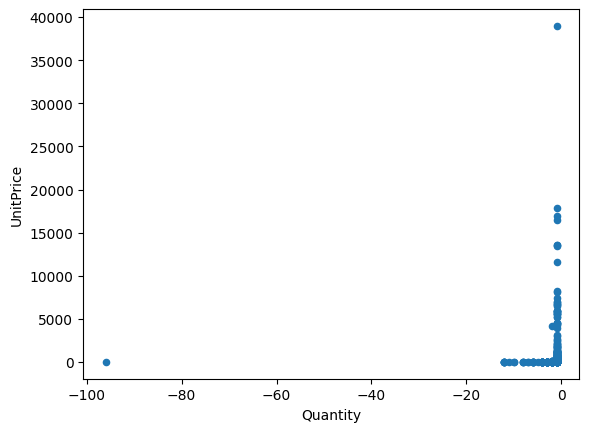

In [ ]:
outliers_returns.plot.scatter(x = 'Quantity' , y = 'UnitPrice')
plt.savefig("Unit_Price_Outlier_Returns.png" , dpi = 200)

In [ ]:
#Detecting the outliers in Quantity Column
q1_returns_1 = df_returns['Quantity'].quantile(0.25)
q3_returns_1 = df_returns['Quantity'].quantile(0.75)
iqr_returns_1 = q3_returns_1 - q1_returns_1
lower_returns_1 = q1_returns_1 - (1.5 * iqr_returns_1)
upper_returns_1 = q3_returns_1 + (1.5 * iqr_returns_1)


In [ ]:
outliers_returns_1 = df_returns[(df_returns['Quantity'] < lower_returns_1) | (df_returns['Quantity'] > upper_returns_1)]

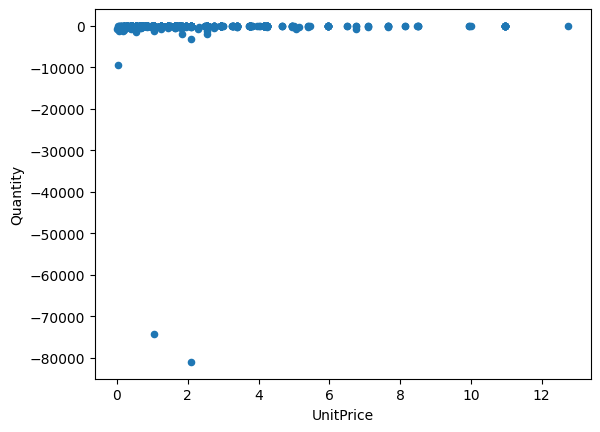

In [ ]:
outliers_returns_1.plot.scatter(x = 'UnitPrice' , y = 'Quantity')
plt.savefig("Quantity_Outlier_Returns.png" , dpi = 200)

In [ ]:
#Treating the Outliers

#Defining the columns to check for outliers
cols_returns = ['Quantity' , 'UnitPrice']

#Set upper and lower limit to detect outliers
low_returns = 0.05
high_returns = 0.95

#Iterate through selected columns
for col in cols_returns:

  #Get quantiles
  q_1_returns = df_returns[col].quantile(low_returns)
  q_3_returns = df_returns[col].quantile(high_returns)
  i_q_r_returns = q_3_returns - q_1_returns

  #Calculate upper and lower bound
  upper_q_returns = q_3_returns + 1.5*i_q_r_returns
  lower_q_returns = q_1_returns - 1.5*i_q_r_returns

  #Trim outliers
  df_returns = df_returns[(df_returns[col] < upper_q_returns) & (df_returns[col] > lower_q_returns)]

#Dataframe without outliers
clean_df_returns = df_returns

In [ ]:
df_returns.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df_returns.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,232
Country,0


In [ ]:
#Checking for the negative values in the Quantity column
neg_q_returns = df_returns[df_returns['Quantity'] < 0]
if not neg_q_returns.empty:
  print("Negative Values found in Quantity column of df_returns: ")
  print(neg_q_returns)
else:
  print("No negative values found in Quantity column of df_returns.")
print("-" * 50)

#Checking for the negative values in the UnitPrice column
neg_p_returns = df_returns[df_returns['UnitPrice'] < 0]
if not neg_p_returns.empty:
  print("Negative Values found in UnitPrice column of df_returns: ")
  print(neg_p_returns)
else:
  print("No negative values found in UnitPrice column of df_returns.")

Negative Values found in Quantity column of df_returns: 
       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540448   C581490     22178   VICTORIAN GLASS HANGING T-LIGHT       -12   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID     

In [ ]:
#Checking if all the negative quantity records has 0 unit price
unique_p_for_neg_q_returns = neg_q_returns['UnitPrice'].unique()
print(f"Unique UnitPrice values for the {len(neg_q_returns)} rows with negative Quantity:")
print(unique_p_for_neg_q_returns)
# Check if all UnitPrice values are 0
all_prices_zero_returns = all(neg_q_returns['UnitPrice'] == 0)

if all_prices_zero_returns:
    print("\nAll UnitPrice values for rows with negative Quantity are 0.")
else:
    print("\nNot all UnitPrice values for rows with negative Quantity are 0.")
    # If you want to see the rows where UnitPrice is not 0 for negative quantity:
    non_zero_price_negative_quantity_returns = neg_q_returns[neg_q_returns['UnitPrice'] != 0]
    print("\nRows with negative Quantity and non-zero UnitPrice:")
    print(non_zero_price_negative_quantity_returns)

Unique UnitPrice values for the 8700 rows with negative Quantity:
[27.5   4.65  1.65  0.29  3.45  4.25  2.1   0.85  1.95  2.95  1.25  5.95
  9.95  8.5   3.75  1.45 14.95  7.95  3.95 12.75  2.55  0.42  6.95  3.25
 10.95 16.95  4.95 10.75  7.65  6.75  1.69 21.95 29.29  8.95  4.41  6.35
 12.95  1.    0.72  5.55  0.64  1.06  3.35  0.55  0.65  0.5   1.85  6.45
  3.49  5.76 26.93  3.81 12.34  5.45  3.5  18.    2.75 13.88  0.75 24.95
  2.25  5.75 40.    0.38 22.97  1.49 15.95 35.09  3.39  5.72  3.   12.99
 34.95  7.06  0.87  8.49 39.95  0.95  0.21  0.19  3.29  8.29  4.   15.
 29.95  4.15  4.5   5.74 11.08  5.79  6.7   8.74  9.74  9.99 20.98  7.69
  5.44  7.   10.   19.5  20.55 29.99 12.94 39.5  37.49 31.98  2.8   4.59
 21.9  30.19 30.38 10.65  0.83  8.65 16.05 17.55  9.87  0.7   1.72  2.84
  4.4   2.5   0.45  0.67 19.05  7.9   0.66  2.89 18.66 38.45 13.39 29.7
  2.7   2.08  5.7   7.88  0.22 14.52  0.76  0.39  0.79 15.05 11.    8.25
  1.79  3.82 21.78  3.96  0.24 11.76  1.01 10.4  11.84  2.49 

In [ ]:
#Checking the number of records with a UnitPrice of 0
zero_price_returns_count = len(df_returns[df_returns['UnitPrice'] == 0])
print(f"Number of records with a UnitPrice of 0: {zero_price_returns_count}")

#Seeing those results
zero_price_returns = df_returns[df_returns['UnitPrice'] == 0]
if not zero_price_returns.empty:
  print("\nRecords with UnitPrice equal to 0:")
  print(zero_price_returns)
else:
  print("\nNo records found with UnitPrice equal to 0.")

Number of records with a UnitPrice of 0: 0

No records found with UnitPrice equal to 0.


In [ ]:
#Looking at the Invoice No column
df_returns['InvoiceNo'].isnull().sum()

np.int64(0)

In [ ]:
#Checking the unique number of values in InvoiceNo column
unique_count = df_returns['InvoiceNo'].nunique()

print("Number of unique invoice numbers: " , unique_count)

Number of unique invoice numbers:  3511


In [ ]:
debt_adjustments_r = df_returns[df_returns['Description'].str.contains('debt' , case = False, na = False)]
print("Number of debt adjustments:" , len(debt_adjustments_r))

Number of debt adjustments: 0


In [ ]:
#Cleaning the Stock code column

#There are 3 types of stock code in the dataset. First one is only numeric,
# second is alphanumeric and third is only alphabets.
#These transactions seems like the internal business stuff which won't be
#effecting our analysis

sc_returns = df_returns['StockCode'].apply(str)
alphacode_returns = df_returns[~sc_returns.str.contains(r"\d", na = False)]
alphacode_returns.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom
13052,C537414,POST,POSTAGE,-1,2010-12-06 15:09:00,4.41,16861.0,United Kingdom
14436,C537581,S,SAMPLES,-1,2010-12-07 12:03:00,12.95,NaN,United Kingdom
14514,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom


In [ ]:
alphacode_returns[['Quantity' , 'UnitPrice']].describe()

,Quantity,UnitPrice
count,295.000000,295.000000
mean,-2.650847,12.447051
std,6.428317,10.453483
min,-48.000000,0.200000
25%,-1.000000,4.025000
50%,-1.000000,9.990000
75%,-1.000000,18.000000
max,-1.000000,40.460000


In [ ]:
alphacode_returns['Description'].unique()

array(['Discount', 'POSTAGE', 'SAMPLES', 'AMAZON FEE', 'Manual',
       'DOTCOM POSTAGE', 'Bank Charges', 'CRUK Commission'], dtype=object)

In [ ]:
sc_returns = df_returns[df_returns['UnitPrice'] != 0].groupby("Description").agg(
    List_returns = ('StockCode', lambda x : list(set(x))),
    TotalNo_returns = ('StockCode' , lambda x: len(list(set(x))))
).reset_index()
unique_nums_returns = np.sort(sc_returns["TotalNo_returns"].unique())
unique_nums_returns

array([1, 2])

In [ ]:
#Examining cases with exactly two stock codes and checking if the difference
#is just in capitalization.
double_sc_returns = sc_returns[sc_returns["TotalNo_returns"] == 2]
double_sc_returns.head()

,Description,List_returns,TotalNo_returns
417,COLOURING PENCILS BROWN TUBE,"[10133, 10135]",2
1024,"METAL SIGN,CUPCAKE SINGLE HOOK","[82613B, 82613C]",2
1393,RETRO PLASTIC POLKA TRAY,"[79190B, 79191B]",2


In [ ]:
#Checking this hypothesis for all entries
check_returns = double_sc_returns['List_returns'].apply(lambda x: str(x[0]).upper() == str(x[1]).upper())
check_returns.unique()

array([False])

In [ ]:
double_sc_returns[check_returns == False].head()

,Description,List_returns,TotalNo_returns
417,COLOURING PENCILS BROWN TUBE,"[10133, 10135]",2
1024,"METAL SIGN,CUPCAKE SINGLE HOOK","[82613B, 82613C]",2
1393,RETRO PLASTIC POLKA TRAY,"[79190B, 79191B]",2


In [ ]:
#Similarly adding this to previous stockcode list
sc_returns[sc_returns["TotalNo_returns"] == 6]

,Description,List_returns,TotalNo_returns


In [ ]:
#Handling multiple stockcode with same description
sc_dict_returns = {row['Description'] : row["List_returns"][0] for _, row in double_sc_returns[check_returns == False].iterrows()}

#Check if there are any rows with "TotalNo_returns" equal to 6
if any(sc_returns['TotalNo_returns'] == 6):
  #Get the index of the row where "TotalNo_returns" is 6
  index_6 = sc_returns[sc_returns["TotalNo_returns"] == 6].index[0]
  sc_dict_returns[sc_returns.loc[index_6 , 'Description']] = sc_returns.loc[index_6, 'List_returns'][0]

def change_sc_returns(row):
  if row["Description"] in sc_dict_returns:
    return sc_dict_returns[row['Description']]
  return row['StockCode']

final_df_returns = df_returns.copy()
final_df_returns["StockCode"] = final_df_returns.apply(change_sc_returns, axis = 1)
final_df_returns["stockCode"] = final_df_returns["StockCode"].astype(str).str.upper()

In [ ]:
#Handling multiple description with same stock code
description_returns = final_df_returns[final_df_returns["UnitPrice"] != 0].groupby("StockCode").agg(
    List_returns = ("Description" , lambda x: list(set(x))),
    TotalNo_returns = ("Description" , lambda x: len(list(set(x))))
).reset_index()

description_returns["TotalNo_returns"].unique()

array([1, 2])

In [ ]:
# Rename the lowercase 'stockCode' column to a temporary name
final_df_returns.rename(columns={'stockCode': 'stockCode_cleaned'}, inplace=True)

# Drop the original 'StockCode' column
if 'StockCode' in final_df_returns.columns:
    final_df_returns.drop(columns=['StockCode'], inplace=True, errors='ignore')

# Rename the temporary cleaned column back to 'StockCode'
final_df_returns.rename(columns={'stockCode_cleaned': 'StockCode'}, inplace=True)

# Verify the columns
print(final_df_returns.columns)

Index(['InvoiceNo', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country', 'StockCode'],
      dtype='object')


In [ ]:
#Identify records where quantity is negative, unit price is positive and have specific keywords
keywords_to_remove_r = ['Discount' , 'SAMPLES','Manual']
#Create a boolean mask to identify rows containing these keywords in "Description"
mask_toremove = final_df_returns['Description'].str.contains('|'.join(keywords_to_remove_r),case = False , na = False)
#Identify rows that are NOT in the mask to remove
mask_tokeep = ~mask_toremove
#Defining the final mask
final_mask_r = mask_tokeep
#Filter the Dataframe to keep only the desired rows
df_returns_cleaned = final_df_returns[final_mask_r].copy()

In [ ]:
#Separating the records such as "Bank Charges" , "Fees", "Commission" etc as these records will not be useful in the analysis
fee_or_charges = df_returns_cleaned[
    df_returns_cleaned['Description'].isin(['AMAZON FEE' , 'Next Day Carriage' , 'CARRIAGE' , 'Bank Charges' , 'PACKING CHARGE' , 'CRUK Commission']) &
    df_returns_cleaned['Quantity'].isin([-1]) &
    df_returns_cleaned['UnitPrice'].isin([1,1.6,7.5,13.01,15,15.96,21.9,27.21])
]
print("Transactions matching all specified criteria:")
print(fee_or_charges)

Transactions matching all specified criteria:
       InvoiceNo        Description  Quantity         InvoiceDate  UnitPrice  \
14514    C537600         AMAZON FEE        -1 2010-12-07 12:41:00       1.00   
235920   C557663           CARRIAGE        -1 2011-06-21 17:59:00      15.00   
252022   C559059  Next Day Carriage        -1 2011-07-06 10:00:00      15.00   
273311   C560823       Bank Charges        -1 2011-07-21 11:22:00      21.90   
309377   C564084     PACKING CHARGE        -1 2011-08-23 09:16:00       7.50   
317508   C564763    CRUK Commission        -1 2011-08-30 10:49:00       1.60   
324023   C565382    CRUK Commission        -1 2011-09-02 15:45:00      13.01   
333779   C566216    CRUK Commission        -1 2011-09-09 15:17:00      15.96   
374910   C569410     PACKING CHARGE        -1 2011-10-04 09:48:00       7.50   
481153   C577343       Bank Charges        -1 2011-11-18 15:13:00      27.21   

        CustomerID         Country     StockCode  
14514          NaN  Un

In [ ]:
#Calculating the total contribution from Postage separately, as Postage is not the part of returns cost
df_returns_cleaned['Description'] = df_returns_cleaned['Description'].str.replace('DOTCOM POSTAGE' , 'POSTAGE', case = False)
postage_cost_r = (df_returns_cleaned[df_returns_cleaned['Description'] == 'POSTAGE']['Quantity'] * df_returns_cleaned[df_returns_cleaned['Description'] == 'POSTAGE']['UnitPrice']).sum()
print(f"Cost from Postage: {postage_cost_r:.2f}")

Cost from Postage: -1983.52


In [ ]:
#Converting all the records in Uppercase
c_c_r = 'Country'
df_returns_cleaned[c_c_r] = df_returns_cleaned[c_c_r].str.upper()
print(df_returns_cleaned[c_c_r].head())

154    UNITED KINGDOM
235    UNITED KINGDOM
236    UNITED KINGDOM
237    UNITED KINGDOM
238    UNITED KINGDOM
Name: Country, dtype: object


In [ ]:
#Replacing EIRE to Ireland for easier understanding
df_returns_cleaned[c_c_r] = df_returns_cleaned[c_c_r].replace("EIRE", "IRELAND")
#Printing the records to verify
print(df_returns_cleaned[df_returns_cleaned[c_c_r] == 'IRELAND'].head())

      InvoiceNo                        Description  Quantity  \
4884    C536817   GREEN CHRISTMAS TREE CARD HOLDER        -1   
4885    C536817  COLOUR GLASS. STAR T-LIGHT HOLDER        -1   
33082   C539221  AMETHYST DIAMANTE EXPANDABLE RING        -3   
33083   C539221     BLACK DIAMANTE EXPANDABLE RING        -4   
33084   C539221      CARDHOLDER HOLLY WREATH METAL        -1   

              InvoiceDate  UnitPrice  CustomerID  Country StockCode  
4884  2010-12-02 17:08:00       4.25     14156.0  IRELAND     22187  
4885  2010-12-02 17:08:00       3.25     14156.0  IRELAND     71477  
33082 2010-12-16 12:56:00       4.25     14911.0  IRELAND    90185B  
33083 2010-12-16 12:56:00       4.25     14911.0  IRELAND    90185C  
33084 2010-12-16 12:56:00       3.75     14911.0  IRELAND     22592  


In [ ]:
#Combining Channel Islands and European Community and rewriting it as European Region
df_returns_cleaned[c_c_r] = df_returns_cleaned[c_c_r].replace(
    {'CHANNEL ISLANDS' : 'EUROPEAN REGION' , 'EUROPEAN COMMUNITY' : 'EUROPEAN REGION'}
)
#printing the 5 records to verify the records
print(df_returns_cleaned[df_returns_cleaned[c_c_r] == 'EUROPEAN REGION'].head(5))

       InvoiceNo                         Description  Quantity  \
77527    C542734    FAMILY ALBUM WHITE PICTURE FRAME        -2   
77528    C542734  PICTURE FRAME WOOD TRIPLE PORTRAIT        -2   
204689   C554688               PIGGY BANK RETROSPOT         -1   
204690   C554688     LARGE ANTIQUE WHITE PHOTO FRAME        -1   
221924   C556294            JAM MAKING SET WITH JARS        -2   

               InvoiceDate  UnitPrice  CustomerID          Country StockCode  
77527  2011-01-31 15:36:00       8.50     14442.0  EUROPEAN REGION     22169  
77528  2011-01-31 15:36:00       6.75     14442.0  EUROPEAN REGION     22170  
204689 2011-05-25 16:50:00       2.55     14442.0  EUROPEAN REGION     22637  
204690 2011-05-25 16:50:00       7.90     14442.0  EUROPEAN REGION     23092  
221924 2011-06-10 09:34:00       4.25     15108.0  EUROPEAN REGION     22960  


In [ ]:
country_column_r = 'Country'
customer_id_r = 'CustomerID'

#Identifying the missing values in the Customer ID Column
print("Number of actual NaN values in Customer ID:" , df_returns_cleaned[customer_id_r].isnull().sum())
print("Number of empty string values in Customer ID:" , (df_returns_cleaned[customer_id_r] == '').sum())
print("Number of 'nan' string values in Customer ID:" , (df_returns_cleaned[customer_id_r] == 'nan').sum())

#Checking the current dtype
print("Current data type of Customer ID column:" , df_returns_cleaned[customer_id_r].dtype)

Number of actual NaN values in Customer ID: 188
Number of empty string values in Customer ID: 0
Number of 'nan' string values in Customer ID: 0
Current data type of Customer ID column: float64


In [ ]:
df_returns_cleaned[customer_id_r] = df_returns_cleaned[customer_id_r].astype(str)

print("Data Type of CustomerID column after conversion:" , df_returns_cleaned[customer_id_r].dtype)
print("Number of actual NaN values in Customer ID after conversion:" , df_returns_cleaned[customer_id_r].isnull().sum())
print("Number of 'nan' string values in CustomerID after conversion:", (df_returns_cleaned[customer_id_r] == 'nan').sum())



Data Type of CustomerID column after conversion: object
Number of actual NaN values in Customer ID after conversion: 0
Number of 'nan' string values in CustomerID after conversion: 188


In [ ]:
country_column_r = 'Country'
customer_id_r = 'CustomerID'
invoice_no_r = 'InvoiceNo'

#Ensuring 'Country' is Uppercase
df_returns_cleaned[country_column_r] = df_returns_cleaned[country_column_r].str.upper()

#Identify 'HONG KONG' records with 'nan' CustomerID
hk_nan_mask_r = (df_returns_cleaned[country_column_r] == 'HONG KONG') & (df_returns_cleaned[customer_id_r] == 'nan')
unique_hk_invoices_r = df_returns_cleaned.loc[hk_nan_mask_r , invoice_no_r].unique()
invoice_to_hk_id_r = {invoice: f'HK_C{i+1}' for i, invoice in enumerate(unique_hk_invoices_r)}

def map_invoice_to_hk_r(row):
    if row[country_column_r] == 'HONG KONG' and row[customer_id_r] == 'nan' :
        return invoice_to_hk_id_r.get(row[invoice_no_r])
    return row[customer_id_r]

df_returns_cleaned[customer_id_r] = df_returns_cleaned.apply(map_invoice_to_hk_r , axis =1 )

print("Number of 'nan' string values in CustomerID for HONG KONG after fill:" , (df_returns_cleaned[(df_returns_cleaned[country_column_r] == 'HONG KONG') & (df_returns_cleaned[customer_id_r] == 'nan')][customer_id_r]).count())
print("\nHONG KONG records:")
print(df_returns_cleaned[df_returns_cleaned[country_column_r] == 'HONG KONG'][[invoice_no_r , customer_id_r]].head())
hk_customer_ids_r = df_returns_cleaned[df_returns_cleaned[country_column_r] == 'HONG KONG'][customer_id_r]
unique_hk_assigned_ids_r = hk_customer_ids_r[hk_customer_ids_r != 'nan'].unique()
print("Unique Customer IDs assigned to HONG KONG:")
print(unique_hk_assigned_ids_r)
print("\nNumber of unique CustomerID values assigned to HONG KONG:" , len(unique_hk_assigned_ids_r))


Number of 'nan' string values in CustomerID for HONG KONG after fill: 0

HONG KONG records:
       InvoiceNo CustomerID
376126   C569495      HK_C1
Unique Customer IDs assigned to HONG KONG:
['HK_C1']

Number of unique CustomerID values assigned to HONG KONG: 1


In [ ]:
#Identify 'BAHRAIN' records with 'nan' CustomerID
b_nan_mask_r = (df_returns_cleaned[country_column_r] == 'BAHRAIN') & (df_returns_cleaned[customer_id_r] == 'nan')
unique_b_invoices_r = df_returns_cleaned.loc[b_nan_mask_r , invoice_no_r].unique()
invoice_to_b_id_r = {invoice: f'BR_C{i+1}' for i, invoice in enumerate(unique_b_invoices_r)}

def map_invoice_to_b_r(row):
    if row[country_column_r] == 'BAHRAIN' and row[customer_id_r] == 'nan' :
        return invoice_to_b_id_r.get(row[invoice_no_r])
    return row[customer_id_r]

df_returns_cleaned[customer_id_r] = df_returns_cleaned.apply(map_invoice_to_b_r , axis =1 )

print("Number of 'nan' string values in CustomerID for BAHRAIN after fill:" , (df_returns_cleaned[(df_returns_cleaned[country_column_r] == 'BAHRAIN') & (df_returns_cleaned[customer_id_r] == 'nan')][customer_id_r]).count())
print("\nBAHRAIN records:")
print(df_returns_cleaned[df_returns_cleaned[country_column_r] == 'BAHRAIN'][[invoice_no_r , customer_id_r]].head())
b_customer_ids_r = df_returns_cleaned[df_returns_cleaned[country_column_r] == 'BAHRAIN'][customer_id_r]
unique_b_assigned_ids_r = b_customer_ids_r[b_customer_ids_r != 'nan'].unique()
print("Unique Customer IDs assigned to BAHRAIN:")
print(unique_b_assigned_ids_r)
print("\nNumber of unique CustomerID values assigned to BAHRAIN:" , len(unique_b_assigned_ids_r))


Number of 'nan' string values in CustomerID for BAHRAIN after fill: 0

BAHRAIN records:
      InvoiceNo CustomerID
44152   C540155      BR_C1
Unique Customer IDs assigned to BAHRAIN:
['BR_C1']

Number of unique CustomerID values assigned to BAHRAIN: 1


In [ ]:
#Idenitfy countries with missing CustomerID (excluding 'HONG KONG' ,'BAHRAIN')
countries_missing_id_r = df_returns_cleaned[df_returns_cleaned[customer_id_r] == 'nan'][country_column_r].unique()
countries_to_process_r = [country for country in countries_missing_id_r if country not in ['HONG KONG' , 'BAHRAIN']]

In [ ]:
#Process for each country
for country in countries_to_process_r:
    print(f"\nProcessing missing CustomerID for {country}...")
    overall_customer_id_mode_r = df_returns_cleaned[df_returns_cleaned[country_column_r] == country][customer_id_r].mode()
    if not overall_customer_id_mode_r.empty:
        most_frequent_customer_id_r = overall_customer_id_mode_r[0]
        if isinstance(most_frequent_customer_id_r , str) and most_frequent_customer_id_r.endswith('.0'):
            most_frequent_customer_id_r = most_frequent_customer_id_r[:-2]
        df_returns_cleaned.loc[(df_returns_cleaned[country_column_r] == country) & (df_returns_cleaned[customer_id_r] == 'nan') , customer_id_r] = most_frequent_customer_id_r
        print(f"Missing CustomerID values for {country} filled with mode: {most_frequent_customer_id_r}")
    else:
        print(f"No CustomerID mode found for {country}. Missing value remain as 'nan'. ")

#----Fill UK by InvoiceNo----
def fill_missing_by_invoice_r(country_name_r, prefix):
    """Fills missing CustomerID in a given country with prefix + unique number per InvoiceNO (with debug prints)."""
    country_mask_r = (df_returns_cleaned[country_column_r] == country_name_r) & (df_returns_cleaned[customer_id_r] == 'nan')
    unique_invoices_r = df_returns_cleaned.loc[country_mask_r, invoice_no_r].unique()
    print(f"\n[DEBUG] Unique invoices for {country_name_r}: {unique_invoices_r}")
    invoice_to_id_r = {invoice: f'{prefix}_C{i+1}' for i, invoice in enumerate(unique_invoices_r)}
    print(f"[DEBUG] Generated IDs for {country_name_r}: {invoice_to_id_r}")

    def map_invoice_to_id_r(row):
        if row[country_column_r] == country_name_r and row[customer_id_r] == 'nan':
            assigned_id = invoice_to_id_r.get(row[invoice_no_r])
            print(f"[DEBUG] Mapping Invoice '{row[invoice_no_r]}' to ID '{assigned_id}'")
            return assigned_id
        return row[customer_id_r]
    df_returns_cleaned[customer_id_r] = df_returns_cleaned.apply(map_invoice_to_id_r, axis=1)
    print(f"Missing CustomerID for {country_name_r} filled based on InvoiceNo (with debug).")

# Re-run the UK filling with the function without "debug" in the name
print("\n--- Re-running UK Filling ---")
fill_missing_by_invoice_r('UNITED KINGDOM', 'UK')

# --- Final Verification Again ---
print("\n--- Final Verification of Missing CustomerIDs (Again) ---")
print(df_returns_cleaned.groupby(country_column_r)[customer_id_r].apply(lambda x: (x == 'nan').sum()))
print("-" * 30)

# --- Additional Checks for 'UNITED KINGDOM' ---
uk_nan_records = df_returns_cleaned[(df_returns_cleaned[country_column_r] == 'UNITED KINGDOM') & (df_returns_cleaned[customer_id_r] == 'nan')]
print(f"\n--- Additional Checks for UNITED KINGDOM ---")
print(f"Number of 'nan' string records for UK after filling: {len(uk_nan_records)}")
uk_nan_with_whitespace = df_returns_cleaned[(df_returns_cleaned[country_column_r] == 'UNITED KINGDOM') & (df_returns_cleaned[customer_id_r].str.strip() == 'nan')]
print(f"Number of 'nan' string records with whitespace for UK after filling: {len(uk_nan_with_whitespace)}")


Processing missing CustomerID for UNITED KINGDOM...
Missing CustomerID values for UNITED KINGDOM filled with mode: nan

Processing missing CustomerID for IRELAND...
Missing CustomerID values for IRELAND filled with mode: 14911

--- Re-running UK Filling ---

[DEBUG] Unique invoices for UNITED KINGDOM: ['C537251' 'C537600' 'C538686' 'C539756' 'C540266' 'C540854' 'C541492'
 'C542540' 'C542860' 'C543185' 'C543384' 'C546758' 'C547008' 'C547091'
 'C547725' 'C547905' 'C547908' 'C547913' 'C547915' 'C548605' 'C553370'
 'C553372' 'C553373' 'C553376' 'C553378' 'C553854' 'C553862' 'C554716'
 'C556807' 'C558364' 'C560386' 'C560823' 'C561966' 'C562030' 'C564183'
 'C570654' 'C571196' 'C572398' 'C572422' 'C572441' 'C572444' 'C572445'
 'C572450' 'C572455' 'C572456' 'C572470' 'C573180' 'C574288' 'C575153'
 'C577343' 'C578097' 'C579757']
[DEBUG] Generated IDs for UNITED KINGDOM: {'C537251': 'UK_C1', 'C537600': 'UK_C2', 'C538686': 'UK_C3', 'C539756': 'UK_C4', 'C540266': 'UK_C5', 'C540854': 'UK_C6', 'C54

In [ ]:
dates_returns = df_returns_cleaned['InvoiceDate']
print(dates_returns.head())
print("\n")

#Checking if date is sorted or not
print("Starting Date:" , dates_returns.iloc[0])
print("Is Monotonic Increasing:", dates_returns.is_monotonic_increasing)
print("Ending Date:", dates_returns.iloc[-1])

154   2010-12-01 09:49:00
235   2010-12-01 10:24:00
236   2010-12-01 10:24:00
237   2010-12-01 10:24:00
238   2010-12-01 10:24:00
Name: InvoiceDate, dtype: datetime64[ns]


Starting Date: 2010-12-01 09:49:00
Is Monotonic Increasing: True
Ending Date: 2011-12-09 11:58:00


In [ ]:
df_returns_cleaned['Time'] = df_returns_cleaned['InvoiceDate'].dt.time
df_returns_cleaned['Day'] = df_returns_cleaned['InvoiceDate'].dt.day_name()
df_returns_cleaned['Month'] = df_returns_cleaned['InvoiceDate'].dt.month_name()
df_returns_cleaned['Year'] = df_returns_cleaned['InvoiceDate'].dt.year

In [ ]:
df_returns_cleaned.to_csv('returns_data.csv' , index = False, encoding = 'utf-8')

In [ ]:
df_returns_cleaned.isna().sum()

,0
InvoiceNo,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
StockCode,0
Time,0
Day,0


In [ ]:
df_returns_cleaned.head()

,InvoiceNo,Description,Quantity,InvoiceDate,...,Time,Day,Month,Year
154,C536383,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,...,09:49:00,Wednesday,December,2010
235,C536391,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,...,10:24:00,Wednesday,December,2010
236,C536391,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,...,10:24:00,Wednesday,December,2010
237,C536391,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,...,10:24:00,Wednesday,December,2010
238,C536391,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,...,10:24:00,Wednesday,December,2010


# **Revenue Analysis**

## **Customer Segment Analysis (By Purchasing Power)**

In [ ]:
#Calculating the Gross sales revenue
gross_revenue = (df_sales_cleaned['UnitPrice'] * df_sales_cleaned['Quantity']).sum()
print(f"Gross Product Revenue: ${gross_revenue:.2f}")

Gross Product Revenue: $7567459.36


In [ ]:
#Calculating Total Revenue per Customer
df_sales_cleaned['TotalTransactionValue'] = df_sales_cleaned['UnitPrice'] * df_sales_cleaned['Quantity']
customer_revenue = df_sales_cleaned.groupby('CustomerID')['TotalTransactionValue'].sum()
print(customer_revenue)

CustomerID
12347    4060.40
12348     495.08
12349    1417.60
12350     294.40
12352    1385.74
          ...   
UK995       7.09
UK996    1165.75
UK997    1371.52
UK998     789.61
UK999    1301.40
Name: TotalTransactionValue, Length: 5606, dtype: float64


In [ ]:
customer_revenue.sort_values(ascending = False)

,TotalTransactionValue
CustomerID,
14911,136617.98
14646,86084.64
14156,55802.02
13089,52049.95
14096,51588.15
...,...
UK235,0.84
UK400,0.84
UK890,0.79


In [ ]:
#Convert the series to a dataframe
customer_revenue_df = customer_revenue.reset_index()
customer_revenue_df.columns = ['CustomerID' , 'TotalSpending']


In [ ]:
#Defining Spending Segments using percentiles
#Top 20% of the customers
high_threshold = customer_revenue.quantile(0.80)
#Bottom 20% of the customers
low_threshold = customer_revenue.quantile(0.20)

print(f"High Spending Threshold (Top 20%): {high_threshold:.2f}")
print(f"Low Spending Threshold (Bottom 20%): {low_threshold:.2f}")

High Spending Threshold (Top 20%): 1771.48
Low Spending Threshold (Bottom 20%): 166.20


In [ ]:
#Assigning Customers to Segments
def segment_customer(total_spending):
    if total_spending >= high_threshold:
        return "High"
    elif total_spending <= low_threshold:
        return "Low"
    else:
        return "Medium"

customer_revenue_df['SpendingSegment'] = customer_revenue_df['TotalSpending'].apply(segment_customer)

#Display the Results
print("\n---Customer Spending Segments (First 10 Customers)---")
print(customer_revenue_df.head(10))



---Customer Spending Segments (First 10 Customers)---
  CustomerID  TotalSpending SpendingSegment
0      12347        4060.40            High
1      12348         495.08          Medium
2      12349        1417.60          Medium
3      12350         294.40          Medium
4      12352        1385.74          Medium
5      12353          89.00             Low
6      12354        1079.40          Medium
7      12355         545.14          Medium
8      12356        2386.63            High
9      12357        5885.07            High


In [ ]:
#Getting the count of customers in each segment
segment_counts = customer_revenue_df['SpendingSegment'].value_counts()
print("\n---Customer Segment Counts---")
print(segment_counts)


---Customer Segment Counts---
SpendingSegment
Medium    3362
High      1122
Low       1122
Name: count, dtype: int64


In [ ]:
total_customers = segment_counts.sum()
percentages = (segment_counts / total_customers) * 100
print("\n---Customer Segment Percentages---")
print(percentages)


---Customer Segment Percentages---
SpendingSegment
Medium    59.971459
High      20.014270
Low       20.014270
Name: count, dtype: float64


In [ ]:
labels = [f'{segment} ({percentages[i]:.1f}% , {segment_counts[i]})'
          for i, segment in enumerate(segment_counts.index)]

<ipython-input-353-aee362d6a3a9>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = [f'{segment} ({percentages[i]:.1f}% , {segment_counts[i]})'


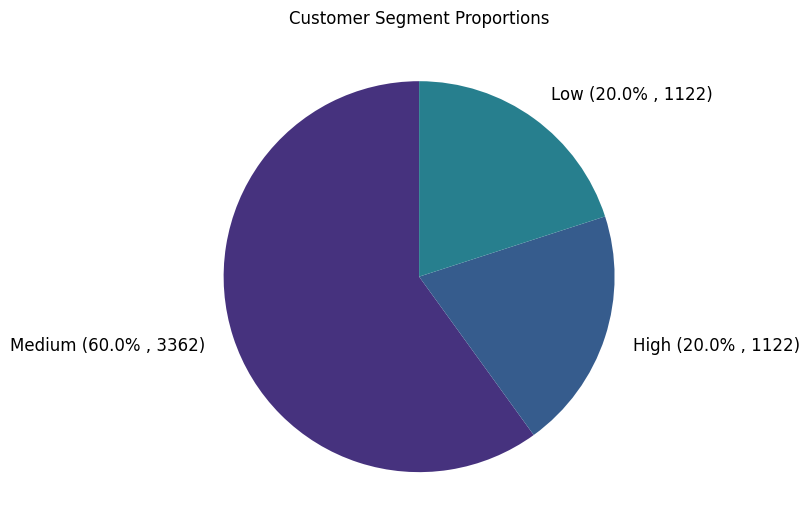

In [ ]:
#Creating a pie chart of the segment counts
plt.figure(figsize=(8,8))
wedges, outer_labels, inner_labels = plt.pie(segment_counts, labels = labels , autopct = "  " , startangle = 90, colors = sns.color_palette("viridis") , labeldistance = 1.15)
for text in outer_labels:
    text.set_fontsize(12)
    text.set_bbox(dict(facecolor = 'white' , edgecolor = 'none' , alpha = 1))
plt.title("Customer Segment Proportions")
plt.tight_layout()
plt.show()

In [ ]:
top_10_customers = customer_revenue_df.sort_values(by = 'TotalSpending' , ascending = False).head(10)
print(top_10_customers)

     CustomerID  TotalSpending SpendingSegment
1856      14911      136617.98            High
1668      14646       86084.64            High
1315      14156       55802.02            High
554       13089       52049.95            High
1271      14096       51588.15            High
1266      14088       49264.56            High
1416      14298       42851.27            High
3719      17511       42440.58            High
3956      17841       38884.87            High
54        12415       35226.13            High


In [ ]:
top_10_revenue = top_10_customers.groupby('CustomerID')['TotalSpending'].mean().sort_values(ascending = False)
print("Mean Revenue for the top 10 Customer:")
print(top_10_revenue.mean())

Mean Revenue for the top 10 Customer:
59081.015


In [ ]:
bottom_10_customers = customer_revenue_df.sort_values(by = "TotalSpending" , ascending = True).head(10)
print(bottom_10_customers)

     CustomerID  TotalSpending SpendingSegment
5529       UK93           0.42             Low
4695      UK179           0.65             Low
5485      UK890           0.79             Low
5055      UK502           0.84             Low
4942      UK400           0.84             Low
4758      UK235           0.84             Low
5131      UK571           0.85             Low
4871      UK337           0.85             Low
4854      UK321           0.85             Low
5376      UK792           1.07             Low


In [ ]:
bottom_10_revenue = bottom_10_customers.groupby('CustomerID')['TotalSpending'].mean().sort_values(ascending = True)
print("Mean Revenue for the Bottom 10 Customer:")
print(bottom_10_revenue.mean())

Mean Revenue for the Bottom 10 Customer:
0.8


<ipython-input-359-064cfcf574a2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='CustomerID', y='TotalSpending', data = top_10_customers, palette = 'viridis')


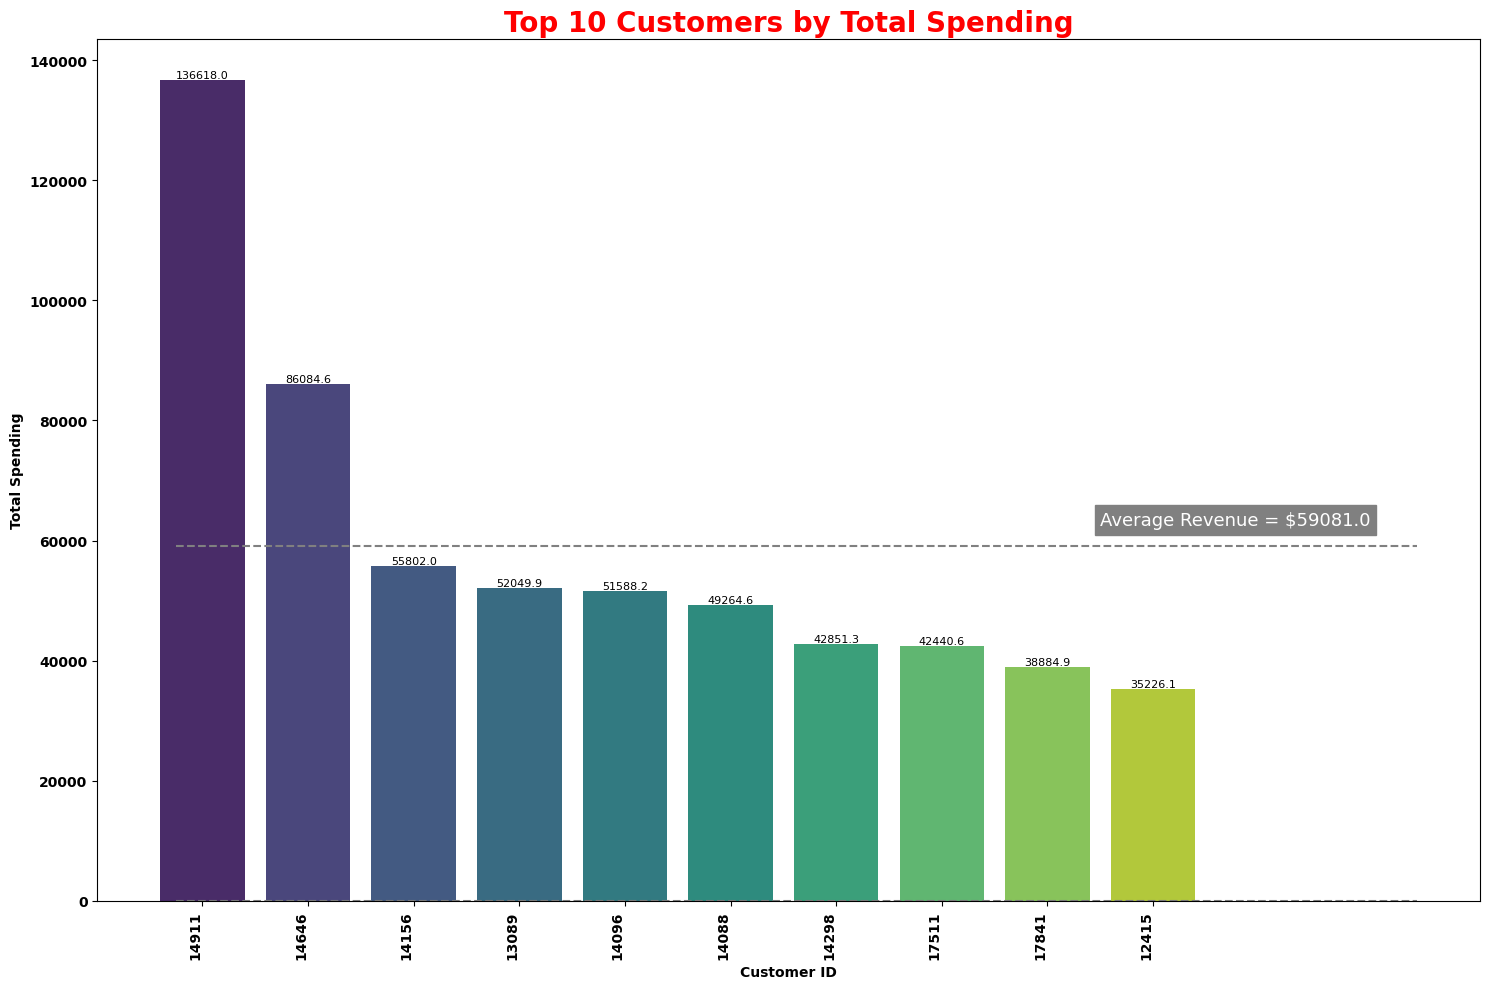

In [ ]:
#Plotting Top 10 Customers
plt.figure(figsize=(15,10) , dpi = 100),
plt.style.use('default')
ax = sns.barplot(x='CustomerID', y='TotalSpending', data = top_10_customers, palette = 'viridis')
plt.title('Top 10 Customers by Total Spending' , weight = 'bold', c = 'red' , fontsize = 20)
plt.xlabel('Customer ID' , weight = 'bold', c = 'k')
plt.ylabel('Total Spending' , weight = 'bold' , c = 'k')
plt.xticks(rotation = 90 , ha = 'right' , weight = 'bold')
plt.yticks(weight = 'bold')
for p in ax.patches:
        ax.annotate('{:.1f}' . format(p.get_height()),(p.get_x()+0.4 , p.get_height()+0.5),
                     ha = 'center' , va= 'bottom',
                    color = 'black' , size = 8, rotation = 0)
x_coordinates = [-0.25,11.50]
y_median = [(top_10_revenue.mean(),2) , (top_10_revenue.mean(),2)]
plt.plot(x_coordinates, y_median , linestyle = '--', c='gray')
plt.text(8.5,top_10_revenue.mean()+ 3500, f'Average Revenue = ${top_10_revenue.mean():.1f}' , fontsize = 13, backgroundcolor = 'gray' , color = 'white')

plt.tight_layout()
plt.show()


<ipython-input-360-ccc111a4c2e9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(x='CustomerID', y='TotalSpending', data = bottom_10_customers, palette = 'viridis')


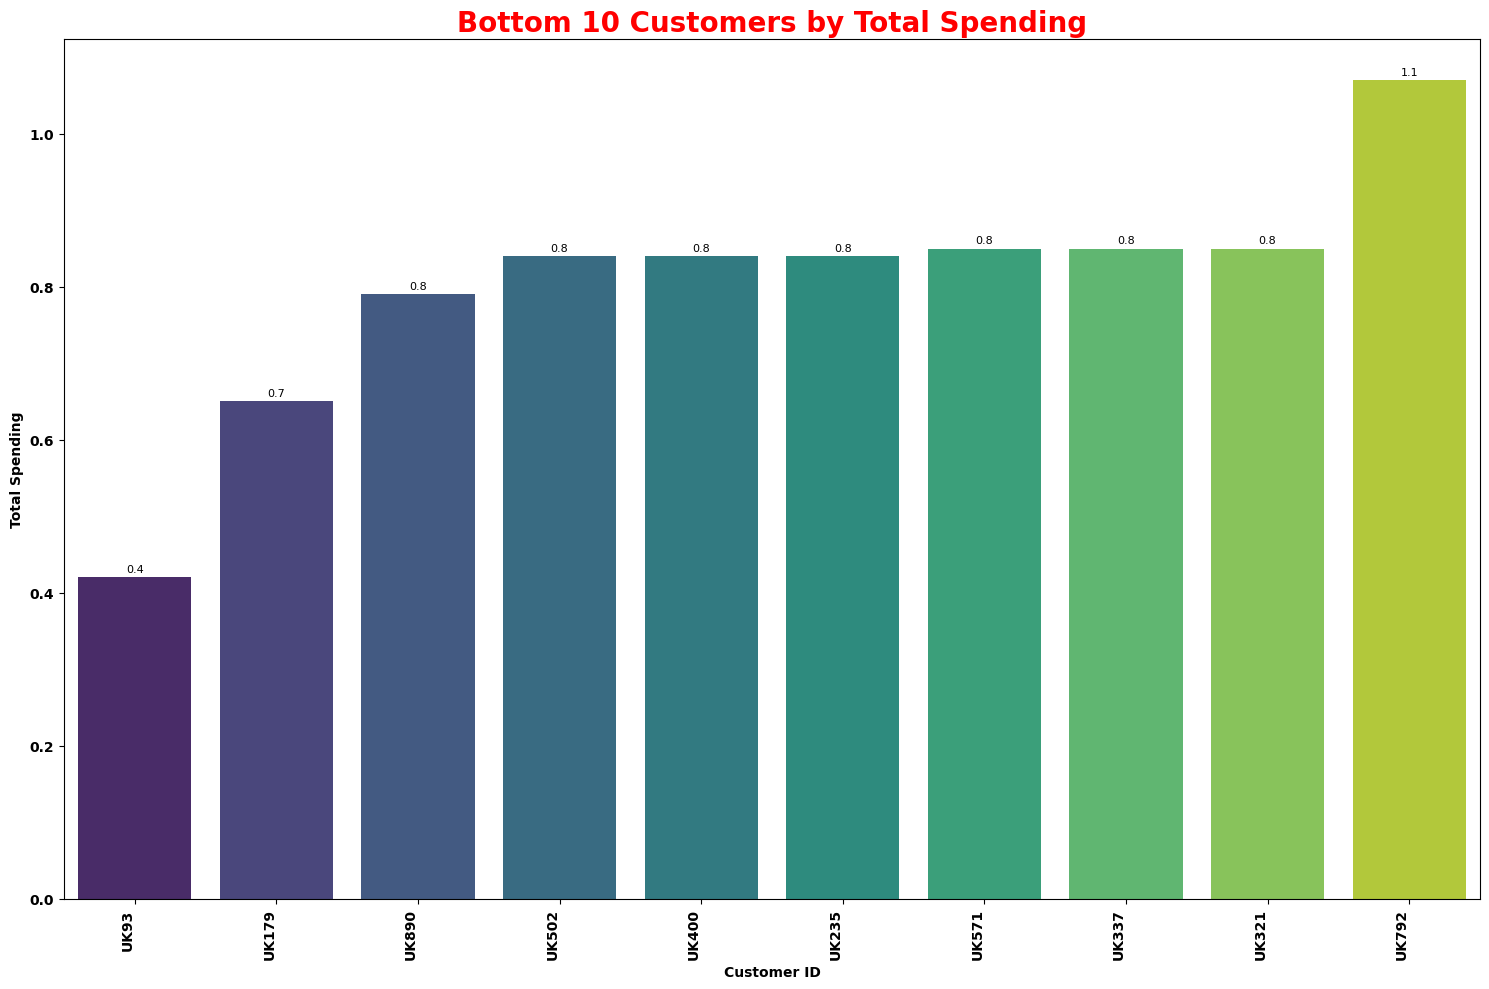

In [ ]:
#Plotting Bottom 10 Customers
plt.figure(figsize=(15,10) , dpi = 100),
plt.style.use('default')
a = sns.barplot(x='CustomerID', y='TotalSpending', data = bottom_10_customers, palette = 'viridis')
plt.title('Bottom 10 Customers by Total Spending' ,weight = 'bold' ,c = 'red' ,  fontsize = 20)

plt.xlabel('Customer ID' , weight = 'bold', c = 'k')
plt.ylabel('Total Spending' , weight = 'bold' , c = 'k')
plt.xticks(rotation = 90 , ha = 'right' , weight = 'bold')
plt.yticks(weight = 'bold')
for p in a.patches:
        a.annotate('{:.1f}' . format(p.get_height()),(p.get_x()+0.4 , p.get_height()+0.004),
                     ha = 'center' , va= 'bottom',
                    color = 'black' , size = 8, rotation = 0)
plt.tight_layout()
plt.show()

<ipython-input-361-34a78fd09f4f>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'CustomerID' , y = 'TotalSpending' ,data = segment_data_top , ax = axes[0] , palette = 'viridis')
<ipython-input-361-34a78fd09f4f>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'CustomerID' , y = 'TotalSpending' , data = segment_data_bottom , ax = axes[1] , palette = 'magma')


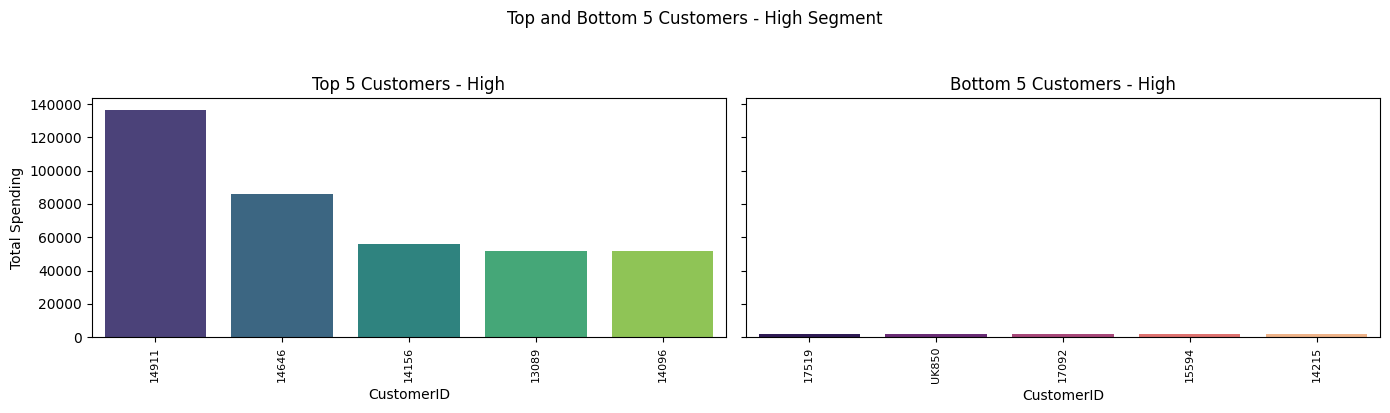

<ipython-input-361-34a78fd09f4f>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'CustomerID' , y = 'TotalSpending' ,data = segment_data_top , ax = axes[0] , palette = 'viridis')
<ipython-input-361-34a78fd09f4f>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'CustomerID' , y = 'TotalSpending' , data = segment_data_bottom , ax = axes[1] , palette = 'magma')


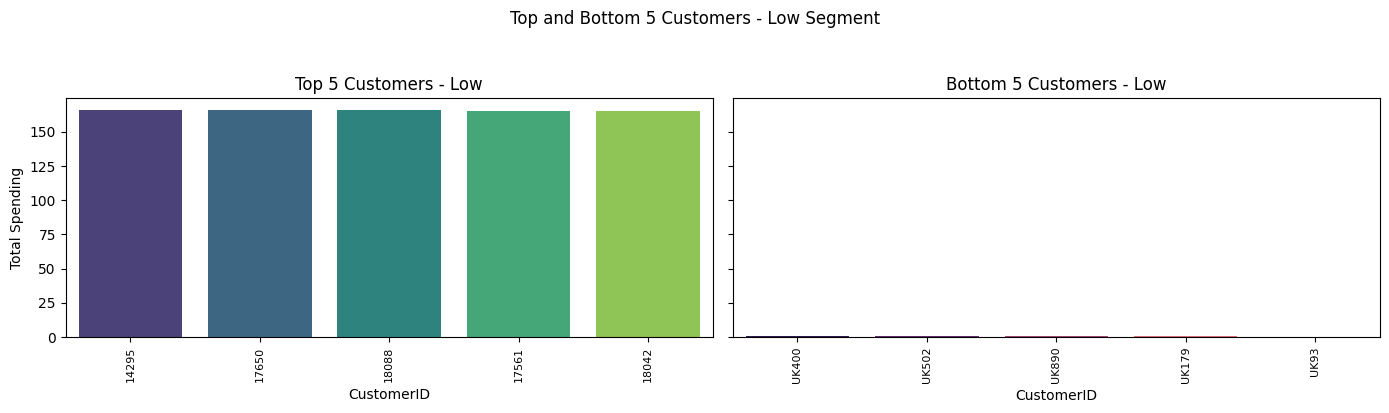

<ipython-input-361-34a78fd09f4f>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'CustomerID' , y = 'TotalSpending' ,data = segment_data_top , ax = axes[0] , palette = 'viridis')
<ipython-input-361-34a78fd09f4f>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'CustomerID' , y = 'TotalSpending' , data = segment_data_bottom , ax = axes[1] , palette = 'magma')


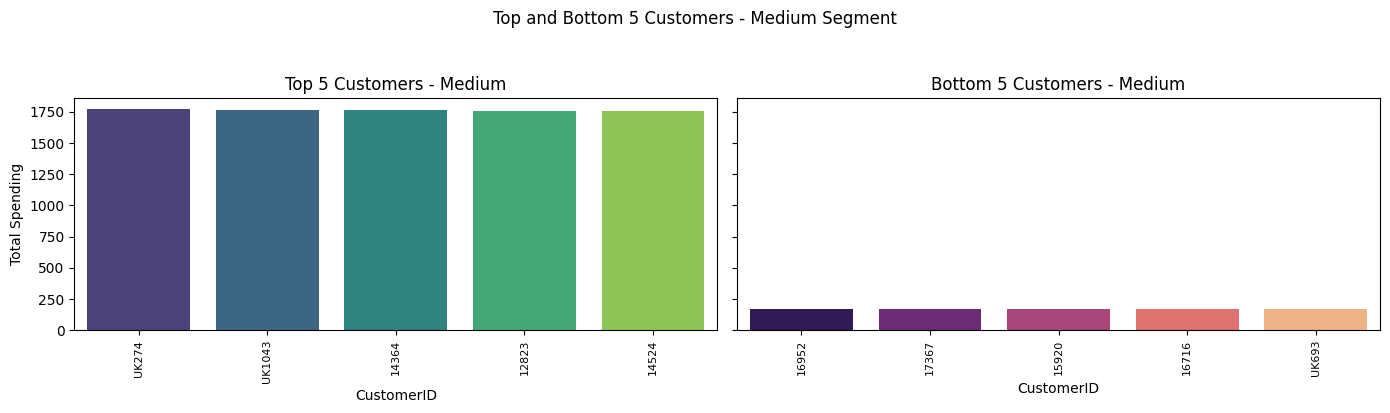

In [ ]:
sorted_df = customer_revenue_df.sort_values(by =['SpendingSegment' , 'TotalSpending'] , ascending = [True, False])
#Initializing the lists to store top and bottom customers of each segment
top_bottom_customers = []
#Iterate through each spending segment
for segment in sorted_df['SpendingSegment'].unique():
    segment_df = sorted_df[sorted_df['SpendingSegment'] == segment]

    #Getting top 5 customers in the segment
    top_5 = segment_df.head(5).copy()
    top_5['Type'] = 'Top'

    #Getting bottom 5 customers in the segment
    bottom_5 = segment_df.tail(5).copy()
    bottom_5['Type'] = "Bottom"

    top_bottom_customers.append(top_5)
    top_bottom_customers.append(bottom_5)

#Combine the top and bottom customers from all segments in one dataframe
top_bottom_df = pd.concat(top_bottom_customers)

#Creating the plot
for segment in sorted_df['SpendingSegment'].unique():
    segment_data_top = top_bottom_df[(top_bottom_df['SpendingSegment'] == segment) & (top_bottom_df['Type'] == 'Top')]
    segment_data_bottom = top_bottom_df[(top_bottom_df['SpendingSegment'] == segment) & (top_bottom_df['Type'] == 'Bottom')]

    fig, axes = plt.subplots(1,2, figsize=(14,6) , sharey = True)
    fig.suptitle(f'Top and Bottom 5 Customers - {segment} Segment' , fontsize = 12)

    sns.barplot(x = 'CustomerID' , y = 'TotalSpending' ,data = segment_data_top , ax = axes[0] , palette = 'viridis')
    axes[0].set_title(f'Top 5 Customers - {segment}')
    axes[0].set_xlabel('CustomerID' , fontsize = 10)
    axes[0].set_ylabel('Total Spending' , fontsize = 10)
    axes[0].tick_params(axis = 'x' , rotation = 90 , labelbottom = True, labelsize = 8)

    sns.barplot(x = 'CustomerID' , y = 'TotalSpending' , data = segment_data_bottom , ax = axes[1] , palette = 'magma')
    axes[1].set_title(f"Bottom 5 Customers - {segment}")
    axes[1].set_xlabel('CustomerID' , fontsize = 10)
    axes[1].tick_params(axis = 'x' , rotation = 90 , labelbottom = True, labelsize = 8)

    plt.tight_layout(rect=[0,0.3,1,0.95])
    plt.show()


In [ ]:
customer_country_df = pd.merge(df_sales_cleaned[['CustomerID' , 'Country']].drop_duplicates(subset=['CustomerID']), customer_revenue_df, on='CustomerID' , how = 'left')
#Display the first few rows with country and spending segment
print("---Customer Spending Segments with Country---")
print(customer_country_df.head(10))

---Customer Spending Segments with Country---
  CustomerID         Country  TotalSpending SpendingSegment
0      17850  UNITED KINGDOM        4783.46            High
1      13047  UNITED KINGDOM        3237.54            High
2      12583          FRANCE        6400.98            High
3      15100  UNITED KINGDOM         876.00          Medium
4      15291  UNITED KINGDOM        3682.02            High
5      14688  UNITED KINGDOM        5467.22            High
6      17809  UNITED KINGDOM        4138.15            High
7      15311  UNITED KINGDOM       29919.17            High
8      16098  UNITED KINGDOM        2005.63            High
9      18074  UNITED KINGDOM         489.60          Medium


In [ ]:
#Analyzing Country Distribution per Segment
segment_country_counts = customer_country_df.groupby('SpendingSegment')['Country'].value_counts()
print("\n---Country Distribution per Segment---")
print(segment_country_counts)


---Country Distribution per Segment---
SpendingSegment  Country             
High             UNITED KINGDOM           998
                 GERMANY                   32
                 FRANCE                    26
                 BELGIUM                    8
                 SWITZERLAND                7
                 SPAIN                      6
                 NORWAY                     5
                 PORTUGAL                   5
                 AUSTRALIA                  3
                 CYPRUS                     3
                 DENMARK                    3
                 EUROPEAN REGION            3
                 HONG KONG                  3
                 IRELAND                    3
                 ITALY                      3
                 FINLAND                    2
                 ISRAEL                     2
                 SWEDEN                     2
                 AUSTRIA                    1
                 CANADA                     1
  

<ipython-input-364-2db2c002a635>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='magma')


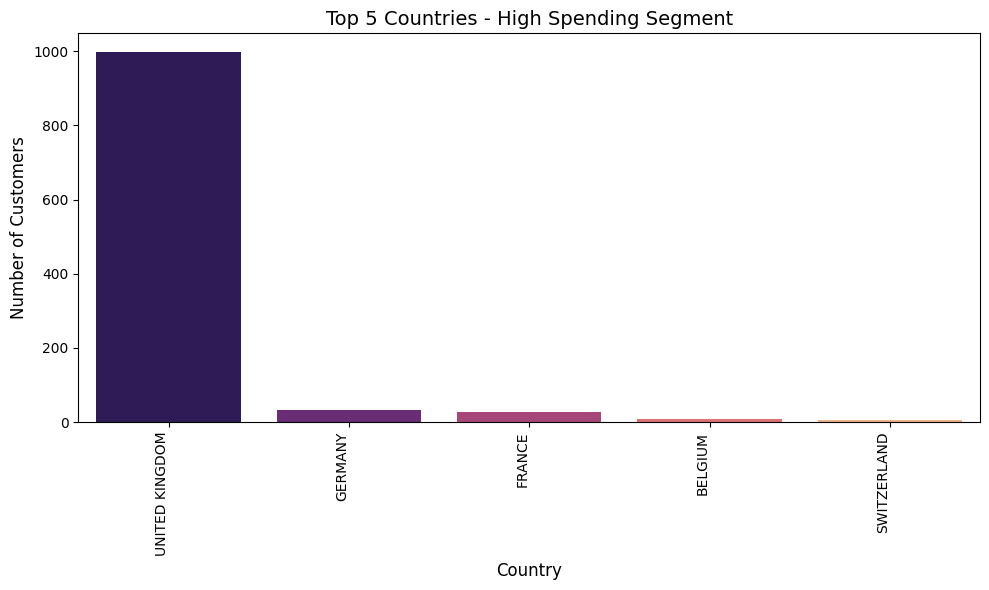

<ipython-input-364-2db2c002a635>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='magma')


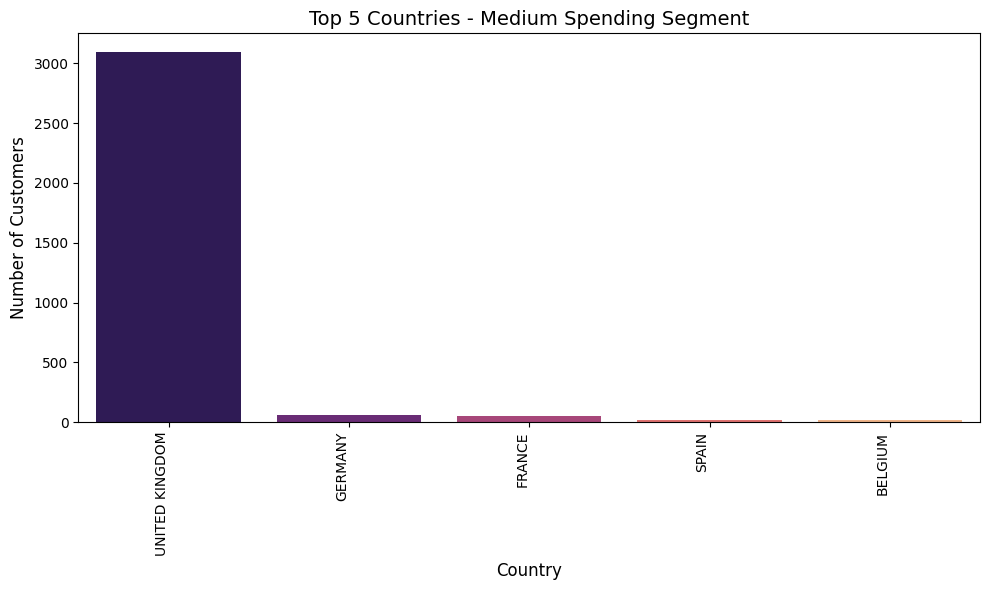

<ipython-input-364-2db2c002a635>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='magma')


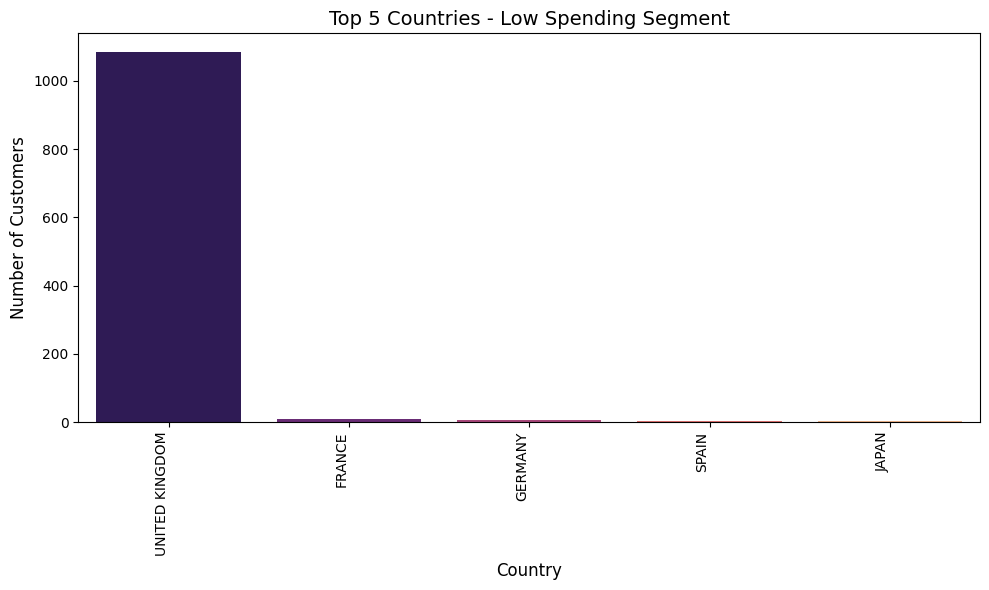

In [ ]:
#Plotting Countries in Each Segment
def plot_top_countries_per_segment(df, segment, n=5):
    top_countries = df[df['SpendingSegment'] == segment]['Country'].value_counts().nlargest(n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_countries.index, y=top_countries.values, palette='magma')
    plt.title(f'Top {n} Countries - {segment} Spending Segment' , fontsize = 14 )
    plt.xlabel('Country' , fontsize = 12)
    plt.ylabel('Number of Customers' , fontsize = 12)
    plt.xticks(rotation=90, ha='right' , fontsize = 10)
    plt.tight_layout()
    plt.show()

for segment in customer_country_df['SpendingSegment'].unique():
    plot_top_countries_per_segment(customer_country_df, segment)

**Insights**
1. The significant differenct between the highest and lowest individual customer revenue (136,617.98 vs. 0.42) and the high average for the Top 10 customers (59,081.015) indicates a highly skewed revenue distribution.
2. Nearly 60% of customer base falls into the "Medium Spender" category. While not individually contributing the most, their sheer volume makes them a critical segmebt for consistent, long-term revenue.
3. Although there are only 20% of customer base who falls under the"High Spender" category, their average spending suggests they are extremely valuable. Losing even a few of these customers could have a significant negative impact on total revenue.
4. The "Low Spender" segment with a very low average revenue ($0.80 for bottom 10) indicates a substantial number of customers whi make minimal purchases. While they contribute little directly, they might represent opportunities for upsell/cross-sell or a high acquisition cost for low return.
5. The UK, Germany and France consistently appear across all three spending segments (High, Medium and Low). This suggests that these are the core markets, providing customers across the entire value spectrum.

## **Customer Segmentation (RFM Analysis)**

In [ ]:
df_rfm = df_sales_cleaned.copy()

In [ ]:
#Defining the snapshot date
import datetime as dt
snapshot_date = df_rfm['InvoiceDate'].max() + dt.timedelta(days = 1)

In [ ]:
#Calculating Recency (R), Frequency(F), Monetary(M) for each customer
rfm_data = df_rfm.groupby('CustomerID').agg(
    Recency=('InvoiceDate' , lambda date:(snapshot_date - date.max()).days),
    Frequency = ('InvoiceNo' , 'nunique'),
    Monetary=('TotalTransactionValue' , 'sum')
)
#Renameing the columns
rfm_data.rename(columns = {'Recency' : 'Recency' , 'Frequency' : 'Frequency', 'Monetary':'Monetary'} , inplace = True)
print("RFM Data for each Customer (first 10 rows):\n" , rfm_data.head(10))
print("\nRFM Data Description:\n" , rfm_data.describe())

RFM Data for each Customer (first 10 rows):
             Recency  Frequency  Monetary
CustomerID                              
12347             2          7   4060.40
12348           249          3    495.08
12349            19          1   1417.60
12350           310          1    294.40
12352            36          7   1385.74
12353           204          1     89.00
12354           232          1   1079.40
12355           214          2    545.14
12356            23          3   2386.63
12357            33          1   5885.07

RFM Data Description:
            Recency    Frequency       Monetary
count  5606.000000  5606.000000    5606.000000
mean    117.271316     3.410631    1349.885723
std     111.516932     6.715696    3414.589277
min       1.000000     1.000000       0.420000
25%      23.000000     1.000000     216.862500
50%      71.000000     1.000000     574.600000
75%     200.000000     4.000000    1460.045000
max     374.000000   223.000000  136617.980000


In [ ]:
#Segment R, F, M into scores using quantile (1-5)
#Recency: Lower recency value (more recent) gets a Higher score
rfm_data['R-Score'] = pd.qcut(rfm_data['Recency'], q = 5, labels = False, duplicates = 'drop') +1
rfm_data['R-Score'] = rfm_data['R-Score'].max() - rfm_data['R-Score'] + 1
#Frequency: Higher frequency value  is better, so score 5 goes to the highest frequency quartile
rfm_data['F-Score'] = pd.qcut(rfm_data['Frequency'], q = 5, labels = False, duplicates = 'drop') +1
#Monetary: Higher monetary value is better, so score 5 goes to the highest monetary quartile
rfm_data['M-Score'] = pd.qcut(rfm_data['Monetary'], q=5, labels = False, duplicates = 'drop') +1

In [ ]:
print("\nRFM Data with Scores (first 10 rows): \n", rfm_data.head(10))


RFM Data with Scores (first 10 rows): 
             Recency  Frequency  Monetary  R-Score  F-Score  M-Score
CustomerID                                                         
12347             2          7   4060.40        5        3        5
12348           249          3    495.08        1        2        3
12349            19          1   1417.60        4        1        4
12350           310          1    294.40        1        1        2
12352            36          7   1385.74        4        3        4
12353           204          1     89.00        2        1        1
12354           232          1   1079.40        2        1        4
12355           214          2    545.14        2        1        3
12356            23          3   2386.63        4        2        5
12357            33          1   5885.07        4        1        5


In [ ]:
#Combining R, f< M scores into an RFM Score String
rfm_data['RFM-Score'] = rfm_data['R-Score'].astype(str) + rfm_data['F-Score'].astype(str)+rfm_data['M-Score'].astype(str)
print("\nRFM Data with Combined Score (first 10 rows):\n" , rfm_data.head(10))


RFM Data with Combined Score (first 10 rows):
             Recency  Frequency  Monetary  R-Score  F-Score  M-Score RFM-Score
CustomerID                                                                   
12347             2          7   4060.40        5        3        5       535
12348           249          3    495.08        1        2        3       123
12349            19          1   1417.60        4        1        4       414
12350           310          1    294.40        1        1        2       112
12352            36          7   1385.74        4        3        4       434
12353           204          1     89.00        2        1        1       211
12354           232          1   1079.40        2        1        4       214
12355           214          2    545.14        2        1        3       213
12356            23          3   2386.63        4        2        5       425
12357            33          1   5885.07        4        1        5       415


In [ ]:
#Defining RFM segments
segment_map = {
    r'[1-2][1-2][1-5]': 'Hibernating' ,
    r'[1-2][3-4][1-5]' : 'At Risk',
    r'[1-2]5[1-5]' : 'Cannot Loose Them' ,
    r'3[1-2][1-5]' : 'About to Sleep' ,
    r'33[1-5]' : 'Need Attention' ,
    r'[3-4][4-5][1-5]': 'Loyal Customers',
    r'[4-5][1-3][1-5]': 'Good Potential',
    r'5[4-5][1-5]': 'Champions',
}

#Apply the regex mapping using numpy.select
conditions = []
values = []
for pattern, seg_name in segment_map.items():
    conditions.append(rfm_data['RFM-Score'].str.match(pattern))
    values.append(seg_name)

#'Other' will catch any RFM-Score combinations not defined in the segment_map
rfm_data['RFM-Segment'] = np.select(conditions, values, default = 'Other')
print('\nRFM Data with Segments (first 10 rows):\n' , rfm_data.head(10))

print('\n---RFM Segment Distribution---')
rfm_segment_counts = rfm_data['RFM-Segment'].value_counts()
print(rfm_segment_counts)

print('\n---Average RFM Values per Segment---')
#Sort by Recency ascending, so the most recent customers appear first in the segment list
print(rfm_data.groupby('RFM-Segment')[['Recency' , 'Frequency' , 'Monetary']].mean().sort_values("Recency"))

print('\n---Total Monetary Value per Segment---')
total_monetary_per_segment = rfm_data.groupby('RFM-Segment')['Monetary'].sum().sort_values(ascending = False)
print(total_monetary_per_segment)


RFM Data with Segments (first 10 rows):
             Recency  Frequency  Monetary  R-Score  F-Score  M-Score RFM-Score  \
CustomerID                                                                      
12347             2          7   4060.40        5        3        5       535   
12348           249          3    495.08        1        2        3       123   
12349            19          1   1417.60        4        1        4       414   
12350           310          1    294.40        1        1        2       112   
12352            36          7   1385.74        4        3        4       434   
12353           204          1     89.00        2        1        1       211   
12354           232          1   1079.40        2        1        4       214   
12355           214          2    545.14        2        1        3       213   
12356            23          3   2386.63        4        2        5       425   
12357            33          1   5885.07        4        1        5

<ipython-input-372-0b80c1645840>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axx1 = sns.barplot(x = rfm_segment_counts_sorted.values , y = rfm_segment_counts_sorted.index, palette = 'Blues_d')


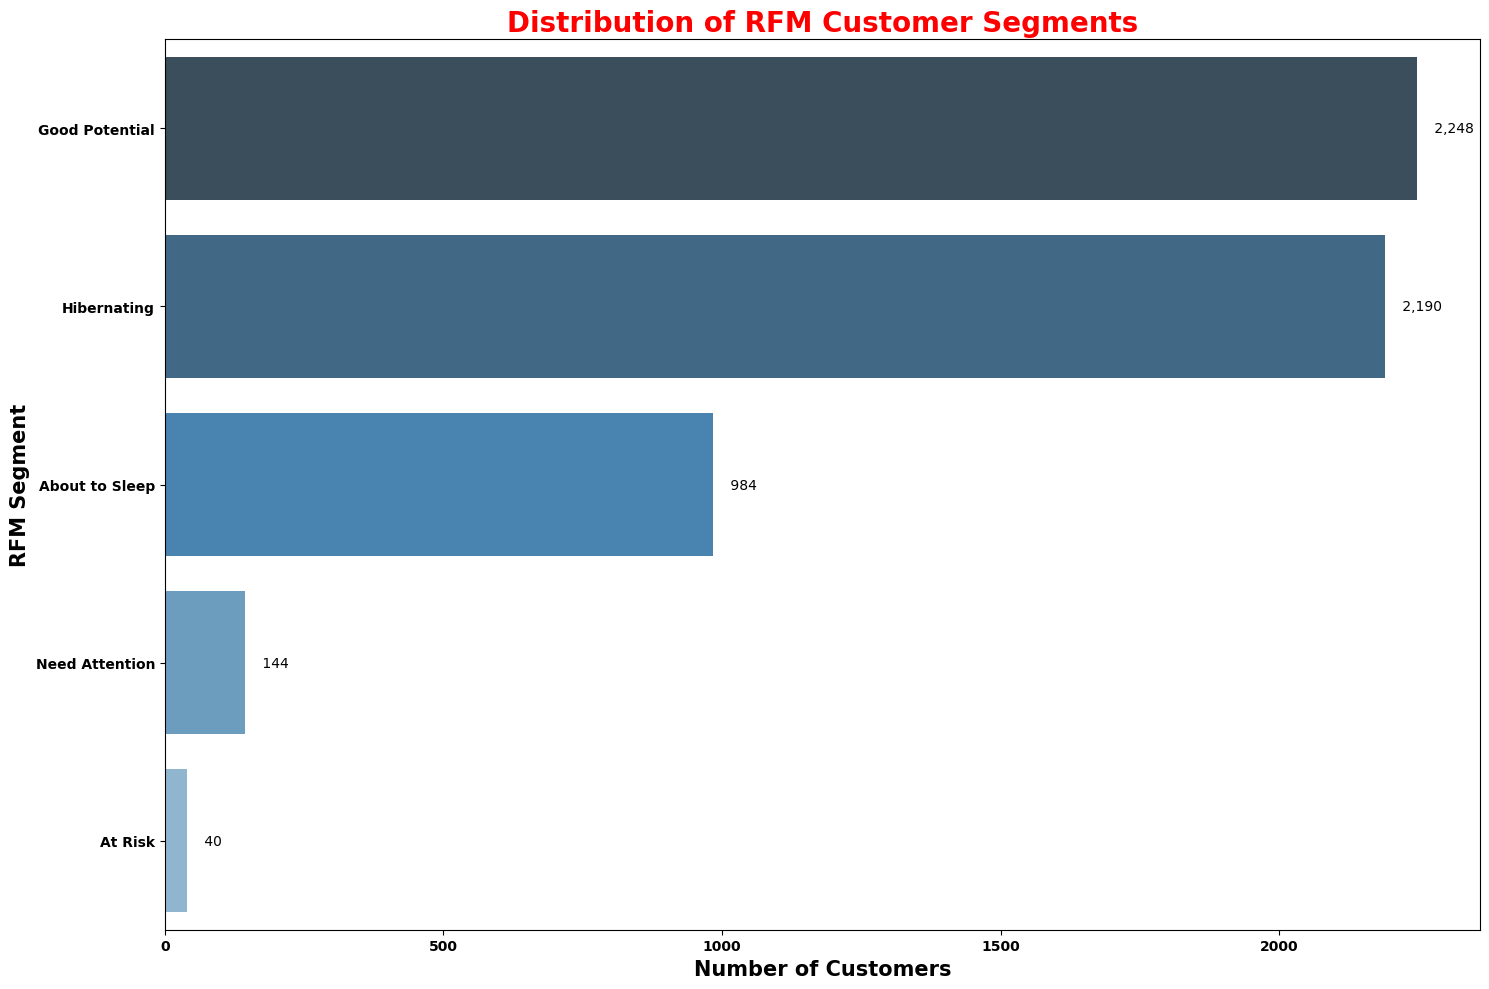

In [ ]:
#Plotting the Horizontal Bar Graphs
rfm_segment_counts_sorted = rfm_segment_counts.sort_values(ascending = True)
total_monetary_per_segment_sorted = total_monetary_per_segment.sort_values(ascending = True)

#Plot 1: Distribution of RFM Customer Segments
plt.figure(figsize = (15,10) , dpi = 100)
plt.style.use('default')
axx1 = sns.barplot(x = rfm_segment_counts_sorted.values , y = rfm_segment_counts_sorted.index, palette = 'Blues_d')
plt.title('Distribution of RFM Customer Segments' , weight = 'bold', c='red', fontsize = 20)
plt.xlabel('Number of Customers' , weight = 'bold' , c = 'k', fontsize = 15)
plt.ylabel('RFM Segment' , weight = 'bold' , c = 'k' , fontsize = 15)
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.ticklabel_format(style = 'plain' , axis = 'x')
axx1.invert_yaxis()
for p in axx1.patches:
    p_width = p.get_width()
    p_y = p.get_y() + p.get_height() / 2
    axx1.text(
        p_width + (rfm_segment_counts_sorted.max()*0.01),
        p_y,
        f'{int(p_width): ,}',
        ha = 'left', va = 'center', color = 'black'
    )
plt.tight_layout()
plt.show()

<ipython-input-373-973a5829f91e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axx2 = sns.barplot(x = total_monetary_per_segment.values , y = total_monetary_per_segment.index, palette = 'plasma')


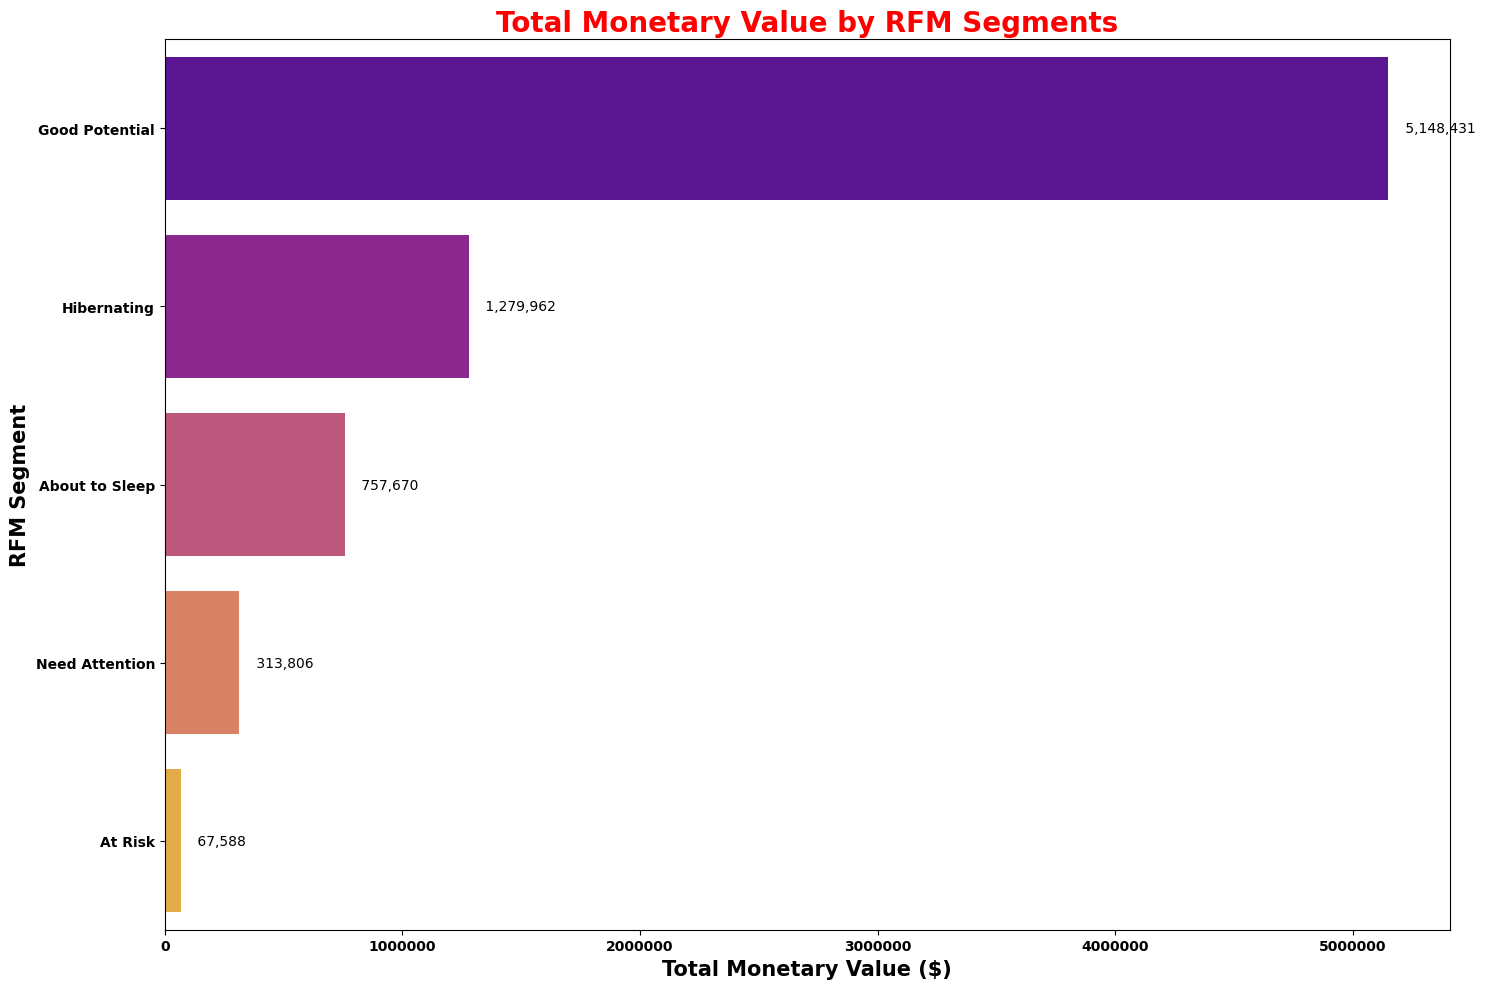

In [ ]:
#Plot 1: Distribution of RFM Customer Segments
plt.figure(figsize = (15,10) , dpi = 100)
plt.style.use('default')
axx2 = sns.barplot(x = total_monetary_per_segment.values , y = total_monetary_per_segment.index, palette = 'plasma')
plt.title('Total Monetary Value by RFM Segments' , weight = 'bold', c='red', fontsize = 20)
plt.xlabel('Total Monetary Value ($)' , weight = 'bold' , c = 'k', fontsize = 15)
plt.ylabel('RFM Segment' , weight = 'bold' , c = 'k' , fontsize = 15)
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.ticklabel_format(style = 'plain' , axis = 'x')

for p in axx2.patches:
    p_width = p.get_width()
    p_y = p.get_y() + p.get_height() / 2
    axx2.text(
        p_width + (total_monetary_per_segment_sorted.max()*0.01),
        p_y,
        f'{int(p_width): ,.0f}',
        ha = 'left', va = 'center', color = 'black'
    )
plt.tight_layout()
plt.show()

**Insights**
1. Good Potential: The Hidden Champions and Revenue Drivers: This segment, comprising the largest portion of the customer base(2,248 customers) and generating over 5.1 million (approx 68% of total revenue), represents most valuable and active customers. Their extremely low average Recency (19 days) and high Frequency (5.9 purchases) confirm they are very recent and frequent buyers. This segment is the primary growth engine and should  be prioritized for loyalty programs, premium offers, and personalised communication to maintain engagement and maximize lifetime value.
2. Hibernating: A Lost Opportunity?
This is the second largest segment with 2,190 customers. This is characterised by very high average recency (239 days) and very low frequency (1.28 purchases) and Monetary value (584). They contribute a significant 1.28 million, likely due to their large count. These customers have likely churned or are close to it. While they contributed in the past, their current value is low. Re-engagement campaigns for this group would need to be cost-effective and focus on enticing them back with strong incentuves, acknowledging their long absence.
3. About to Sleep : The Warning Signs of Churn: A substantial group of 984 customers are "About to sleep", marked by moderate Recency (74 days) and very low frequency (1.79 purchases), contributing around 757k. This segment is a crucial juncture. They haven't become fully inactive yet, but their low frequency declining engagement. Proactive re-engagement efforts (eg. personalised emails, special offers) are crucial to prevent them from moving into the "Hibernating" or "Lost" segments.
4. At Risk : High Past Value, Urgent Action Needed: Although the smallest segment by count (40 customers), "At Risk" customers have the highest average Frequency (7.45 purchases) and a good average Monetary value (1,689), but a very high average Recency (194 days). This means they were once highly engaged and valuable, but haven't purchased in a long time.These customers represent high past investment and potential high future value if reactivated. They require immediate and highly personalized win-back campaigns, perhaps with exclusive offers or direct outreach, as losing them means losing significant past loyalty. The low count makes personalized attention feasible.
5. Need Attention: The Opportunity for Upskilling: The "Need Attention" segment (144 customers) shows good average Frequency (6.85 purchases) and Monetary value (2,179), but a moderate Recency (71 days). These are valuable customers who are active but perhaps not at their peak recent engagement. They have the potential to be moved into the "Good Potential" category. Targeted campaigns focused on product discovery, cross-selling, or loyalty program benefits could increase their Recency and solidify their relationship with the brand.

## **Geographic Region Analysis**

In [ ]:
#Calculating the Total Revenue per Country
country_revenue = df_sales_cleaned.groupby('Country')['TotalTransactionValue'].sum()
print(country_revenue)

Country
AUSTRALIA                 47056.410
AUSTRIA                    7947.800
BAHRAIN                     634.140
BELGIUM                   36066.760
BRAZIL                     1143.600
CANADA                     2520.720
CYPRUS                    11260.300
CZECH REPUBLIC              786.740
DENMARK                   16320.340
EUROPEAN REGION           18920.740
FINLAND                   17377.770
FRANCE                   164613.830
GERMANY                  192541.180
GREECE                     4385.570
HONG KONG                  9128.390
ICELAND                    4060.400
IRELAND                  196564.610
ISRAEL                     7592.700
ITALY                     15351.650
JAPAN                     17065.690
LEBANON                    1693.880
LITHUANIA                  1661.060
MALTA                      2070.590
NETHERLANDS               90595.730
NORWAY                    30427.740
OTHERS                     4740.940
POLAND                     6909.750
PORTUGAL            

In [ ]:
#Displaying the top and bottom performing countries
print("---Top 10 Countries by Revenue---")
print(country_revenue.nlargest(10))
print("\n---Bottom 10 Countries by Revenue---")
print(country_revenue.nsmallest(10))

---Top 10 Countries by Revenue---
Country
UNITED KINGDOM    6514424.903
IRELAND            196564.610
GERMANY            192541.180
FRANCE             164613.830
NETHERLANDS         90595.730
SWITZERLAND         48509.700
AUSTRALIA           47056.410
SPAIN               43498.380
BELGIUM             36066.760
NORWAY              30427.740
Name: TotalTransactionValue, dtype: float64

---Bottom 10 Countries by Revenue---
Country
SAUDI ARABIA             145.92
BAHRAIN                  634.14
CZECH REPUBLIC           786.74
SOUTH AFRICA            1002.31
BRAZIL                  1143.60
LITHUANIA               1661.06
LEBANON                 1693.88
UNITED ARAB EMIRATES    1864.78
MALTA                   2070.59
CANADA                  2520.72
Name: TotalTransactionValue, dtype: float64


In [ ]:
#Plotting the Revenue per Country
country_revenue_df = country_revenue.reset_index()
country_revenue_df.columns = ['Country' , 'TotalRevenue']
print(country_revenue_df.head(5))

     Country  TotalRevenue
0  AUSTRALIA      47056.41
1    AUSTRIA       7947.80
2    BAHRAIN        634.14
3    BELGIUM      36066.76
4     BRAZIL       1143.60


In [ ]:
geolocator = Nominatim(user_agent="geo_app")
country_coordinates = {}
for country in country_revenue_df['Country']:
    try:
        location = geolocator.geocode(country)
        if location:
            country_coordinates[country] = (location.latitude, location.longitude)
    except Exception as e:
        print(f"Error geocoding {country}: {e}")

world_map = folium.Map(location=[0, 0], zoom_start=2)

for country, revenue in country_revenue_df.iterrows():
    country_name = revenue['Country']
    total_revenue = revenue['TotalRevenue']
    if country_name in country_coordinates:
        lat, lon = country_coordinates[country_name]
        folium.Marker(
            location=[lat, lon],
            icon=folium.Icon(color='red'),  # Specify red color for the icon
            tooltip=f"{country_name}: ${total_revenue:.2f}"
        ).add_to(world_map)

world_map

Error geocoding EUROPEAN REGION: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=EUROPEAN+REGION&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


Error geocoding ISRAEL: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=ISRAEL&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


Error geocoding MALTA: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=MALTA&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


Error geocoding PORTUGAL: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=PORTUGAL&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


In [ ]:
#Top 10 countries on map
top_10_countries = country_revenue.nlargest(10)
top_10_countries_df = top_10_countries.reset_index(name = 'TotalRevenue')
top_10_countries_df.columns = ['Country', 'TotalRevenue']

geolocator_top_10 = Nominatim(user_agent="top_10_geo_app")
country_coordinates_top_10 = {}
for country in top_10_countries_df['Country']:
    try:
        location = geolocator_top_10.geocode(country)
        if location:
            country_coordinates_top_10[country] = (location.latitude, location.longitude)
        else:
            print(f"Could not geocode (Top 10): {country}")
    except Exception as e:
        print(f"Error geocoding (Top 10) {country}: {e}")

world_map_top_10 = folium.Map(location=[0, 0], zoom_start=2)
for index, row in top_10_countries_df.iterrows():
    country_name = row['Country']
    total_revenue = row['TotalRevenue']
    if country_name in country_coordinates_top_10:
        lat, lon = country_coordinates_top_10[country_name]
        folium.Marker(
            location=[lat, lon],
            icon=folium.Icon(color='green'),
            tooltip=f"{country_name}: ${total_revenue:.2f}"
        ).add_to(world_map_top_10)
    else:
        print(f"Coordinates not found (Top 10) for {country_name}, cannot plot on map.")

print("\n---Top 10 Countries---")
world_map_top_10


Error geocoding (Top 10) AUSTRALIA: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=AUSTRALIA&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


Error geocoding (Top 10) NORWAY: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=NORWAY&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Coordinates not found (Top 10) for AUSTRALIA, cannot plot on map.
Coordinates not found (Top 10) for NORWAY, cannot plot on map.

---Top 10 Countries---


In [ ]:
#Bottom 10 Countries
bottom_10_countries = country_revenue.nsmallest(10)
bottom_10_countries_df = bottom_10_countries.reset_index(name = 'TotalRevenue')
bottom_10_countries_df.columns = ['Country', 'TotalRevenue']

geolocator_bottom_10 = Nominatim(user_agent="bottom_10_geo_app")
country_coordinates_bottom_10 = {}
for country in bottom_10_countries_df['Country']:
    try:
        location = geolocator_bottom_10.geocode(country)
        if location:
            country_coordinates_bottom_10[country] = (location.latitude, location.longitude)
        else:
            print(f"Could not geocode (Bottom 10): {country}")
    except Exception as e:
        print(f"Error geocoding (Bottom 10) {country}: {e}")

world_map_bottom_10 = folium.Map(location=[0, 0], zoom_start=2)
for index, row in bottom_10_countries_df.iterrows():
    country_name = row['Country']
    total_revenue = row['TotalRevenue']
    if country_name in country_coordinates_bottom_10:
        lat, lon = country_coordinates_bottom_10[country_name]
        folium.Marker(
            location=[lat, lon],
            icon=folium.Icon(color='blue'),
            tooltip=f"{country_name}: ${total_revenue:.2f}"
        ).add_to(world_map_bottom_10)
    else:
        print(f"Coordinates not found (Bottom 10) for {country_name}, cannot plot on map.")

print("\n---Bottom 10 Countries---")
world_map_bottom_10


Error geocoding (Bottom 10) SOUTH AFRICA: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=SOUTH+AFRICA&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


Error geocoding (Bottom 10) MALTA: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=MALTA&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Coordinates not found (Bottom 10) for SOUTH AFRICA, cannot plot on map.
Coordinates not found (Bottom 10) for MALTA, cannot plot on map.

---Bottom 10 Countries---


In [ ]:
#Calculating the percentage of revenue for each country
top_10_countries_df['Percentage'] = (top_10_countries_df['TotalRevenue'] / top_10_countries_df['TotalRevenue'].sum()) *100
top_10_countries_df['Percentage'].head(10)

,Percentage
0,88.459535
1,2.669156
2,2.614521
3,2.235295
4,1.230202
5,0.658714
6,0.638980
7,0.590666
8,0.489751
9,0.413179


In [ ]:
#Calculating the total revenue for the top 10 countries
total_revenue_top_10 = top_10_countries_df['TotalRevenue'].sum()

<ipython-input-382-6ac2fdd2855f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axx = sns.barplot(x='Country', y='TotalRevenue', data = top_10_countries_df, palette = 'viridis')


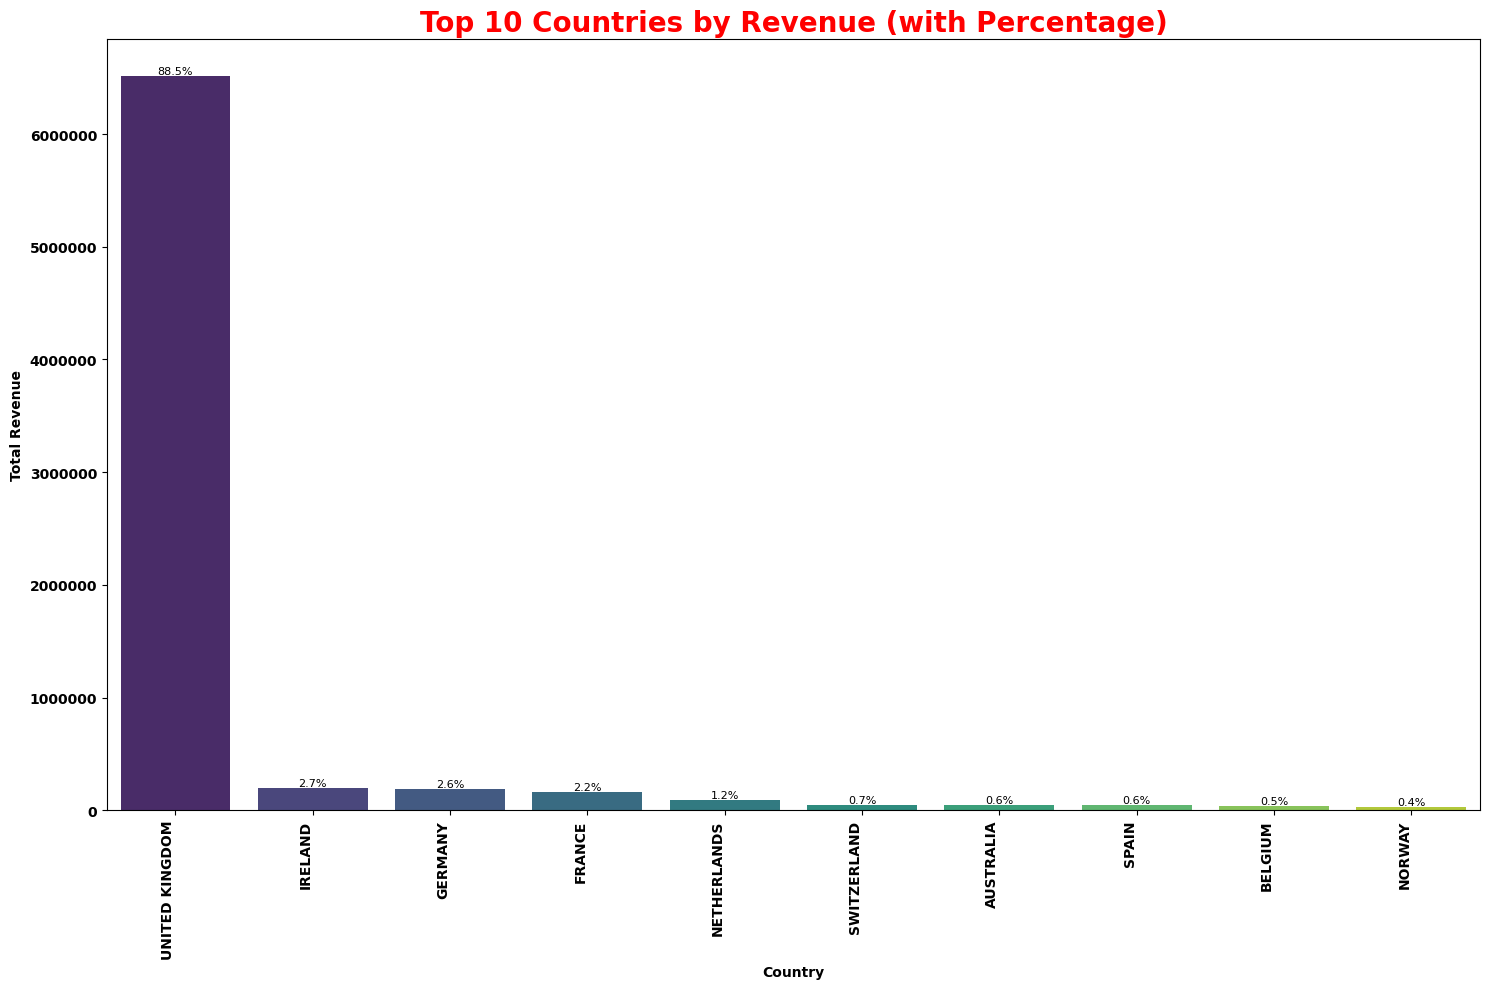

In [ ]:
#Creating the bar chart
plt.figure(figsize=(15,10) , dpi = 100)
plt.style.use('default')
axx = sns.barplot(x='Country', y='TotalRevenue', data = top_10_countries_df, palette = 'viridis')
plt.title('Top 10 Countries by Revenue (with Percentage)' , weight = 'bold', c = 'red' , fontsize = 20)
plt.xlabel('Country' , weight = 'bold', c = 'k')
plt.ylabel('Total Revenue' , weight = 'bold' , c = 'k')
plt.xticks(rotation = 90 , ha = 'right' , weight = 'bold')
plt.yticks(weight = 'bold')

axx.ticklabel_format(style = 'plain' , axis = 'y')
for index, row in top_10_countries_df.iterrows():
    plt.text(row.name , row['TotalRevenue'] , f'{row["Percentage"]:.1f}%',
             ha = 'center' , va= 'bottom', color = 'black' , size = 8, rotation = 0)

plt.tight_layout()
plt.show()

In [ ]:
#Calculate the total revenue for the bottom 10 countries
total_revenue_bottom_10 = bottom_10_countries_df['TotalRevenue'].sum()

In [ ]:
#Calculating the percentage of revenue for each country
bottom_10_countries_df['Percentage'] = (bottom_10_countries_df['TotalRevenue'] / bottom_10_countries_df['TotalRevenue'].sum()) *100
bottom_10_countries_df['Percentage'].head(10)

,Percentage
0,1.078991
1,4.689087
2,5.817474
3,7.411485
4,8.456241
5,12.282549
6,12.525233
7,13.788937
8,15.310779
9,18.639223


<ipython-input-385-4939ead24b4e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axx = sns.barplot(x='Country', y='TotalRevenue', data = bottom_10_countries_df, palette = 'viridis')


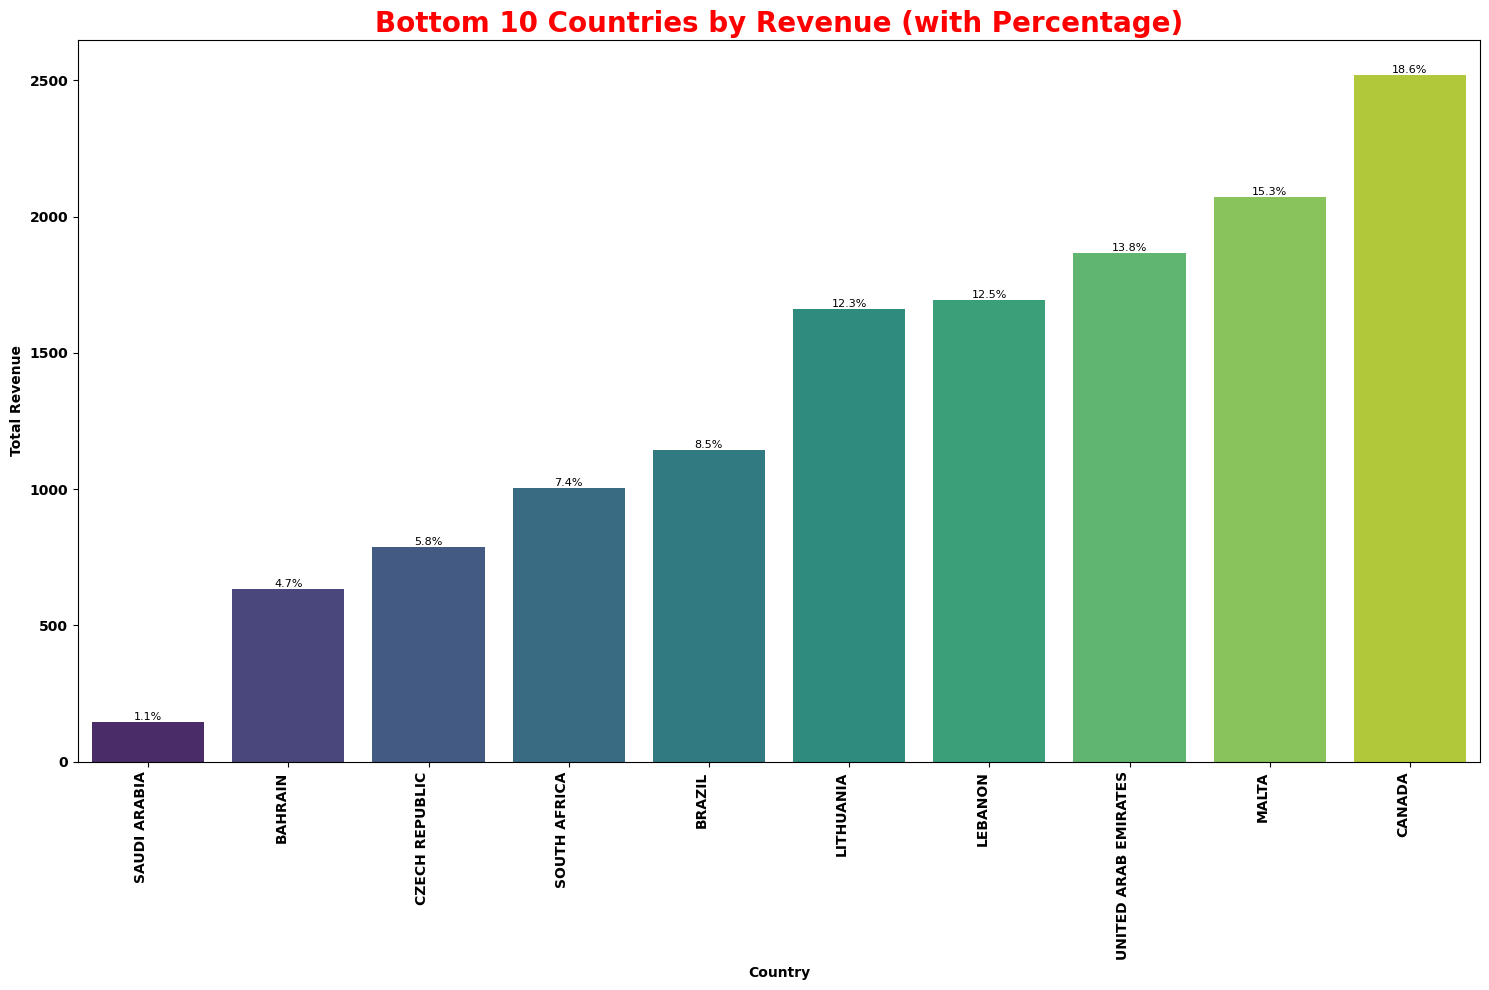

In [ ]:
#Creating the bar chart
plt.figure(figsize=(15,10) , dpi = 100)
plt.style.use('default')
axx = sns.barplot(x='Country', y='TotalRevenue', data = bottom_10_countries_df, palette = 'viridis')
plt.title('Bottom 10 Countries by Revenue (with Percentage)' , weight = 'bold', c = 'red' , fontsize = 20)
plt.xlabel('Country' , weight = 'bold', c = 'k')
plt.ylabel('Total Revenue' , weight = 'bold' , c = 'k')
plt.xticks(rotation = 90 , ha = 'right' , weight = 'bold')
plt.yticks(weight = 'bold')

axx.ticklabel_format(style = 'plain' , axis = 'y')
for index, row in bottom_10_countries_df.iterrows():
    plt.text(row.name , row['TotalRevenue'] , f'{row["Percentage"]:.1f}%',
             ha = 'center' , va= 'bottom', color = 'black' , size = 8, rotation = 0)

plt.tight_layout()
plt.show()

**Insights**
1. An overwhelming UK dominance is seen. The UK accounts for an extraordinary 88% of the total gross revenue. This indicates an extremely concentrated market, with the business leavily reliant on its domestic market. While this shows strong domestic performance, it also highlights a significant risk due to lack of diversification.
2. Ireland, Germany, and France are the next most significant revnue drivers, each contributing between 2-3% revenue. The Netherlands follows with over 1%. These countries represent established international markets with some customer base, but their collective contribution is still dwarfed by the UK.
3. Countries like Switzerland, Australia,Spain, Belgium, and Norway, while individually contributing less than 1% of total revenue, represent active international markets that might have potential for targeted growth or specific product fits. Their presence in the top 10, despite modest revenue, suggests some level of international reach.
4. A large number of countries, as seen in the bottom 10, contribute negligible revenue. COuntries like Saudi Arabia, Bahrain, and the Czech Republic generate only a few hundred dollars. Resources spent on customer acquisition, marketing, or logistics in these extremely low-revenue countries might not be cost-effective. It's crucial to evaluate the cost of serving these markets outweighs the minimal revenue generated.
5. Given the heavy reliance on the UK, diversification is a key growth strategy. The secondary markets (Ireland, Germany, France, Netherlands) are the most logical tagets for increased investment and focused marketing efforts to scale their revenue contribution. Markets at the very bottom should be re-evaluated for viability.

## **Time-Based Analysis**

### **Overall Revenue Trends**

In [ ]:
#Checking the data type of the InvoiceDate column
print(df_sales_cleaned['InvoiceDate'].dtype)

datetime64[ns]


In [ ]:
#Setting InvoiceDate as the index for easier time-based operations
df_time_series = df_sales_cleaned.set_index("InvoiceDate")

In [ ]:
#Resampling the data to weekly frequency and sum the total transaction value
weekly_sales = df_time_series['TotalTransactionValue'].resample('W').sum()

In [ ]:
#Calculating a 7-day moving average
rolling_mean = weekly_sales.rolling(window=7).mean()


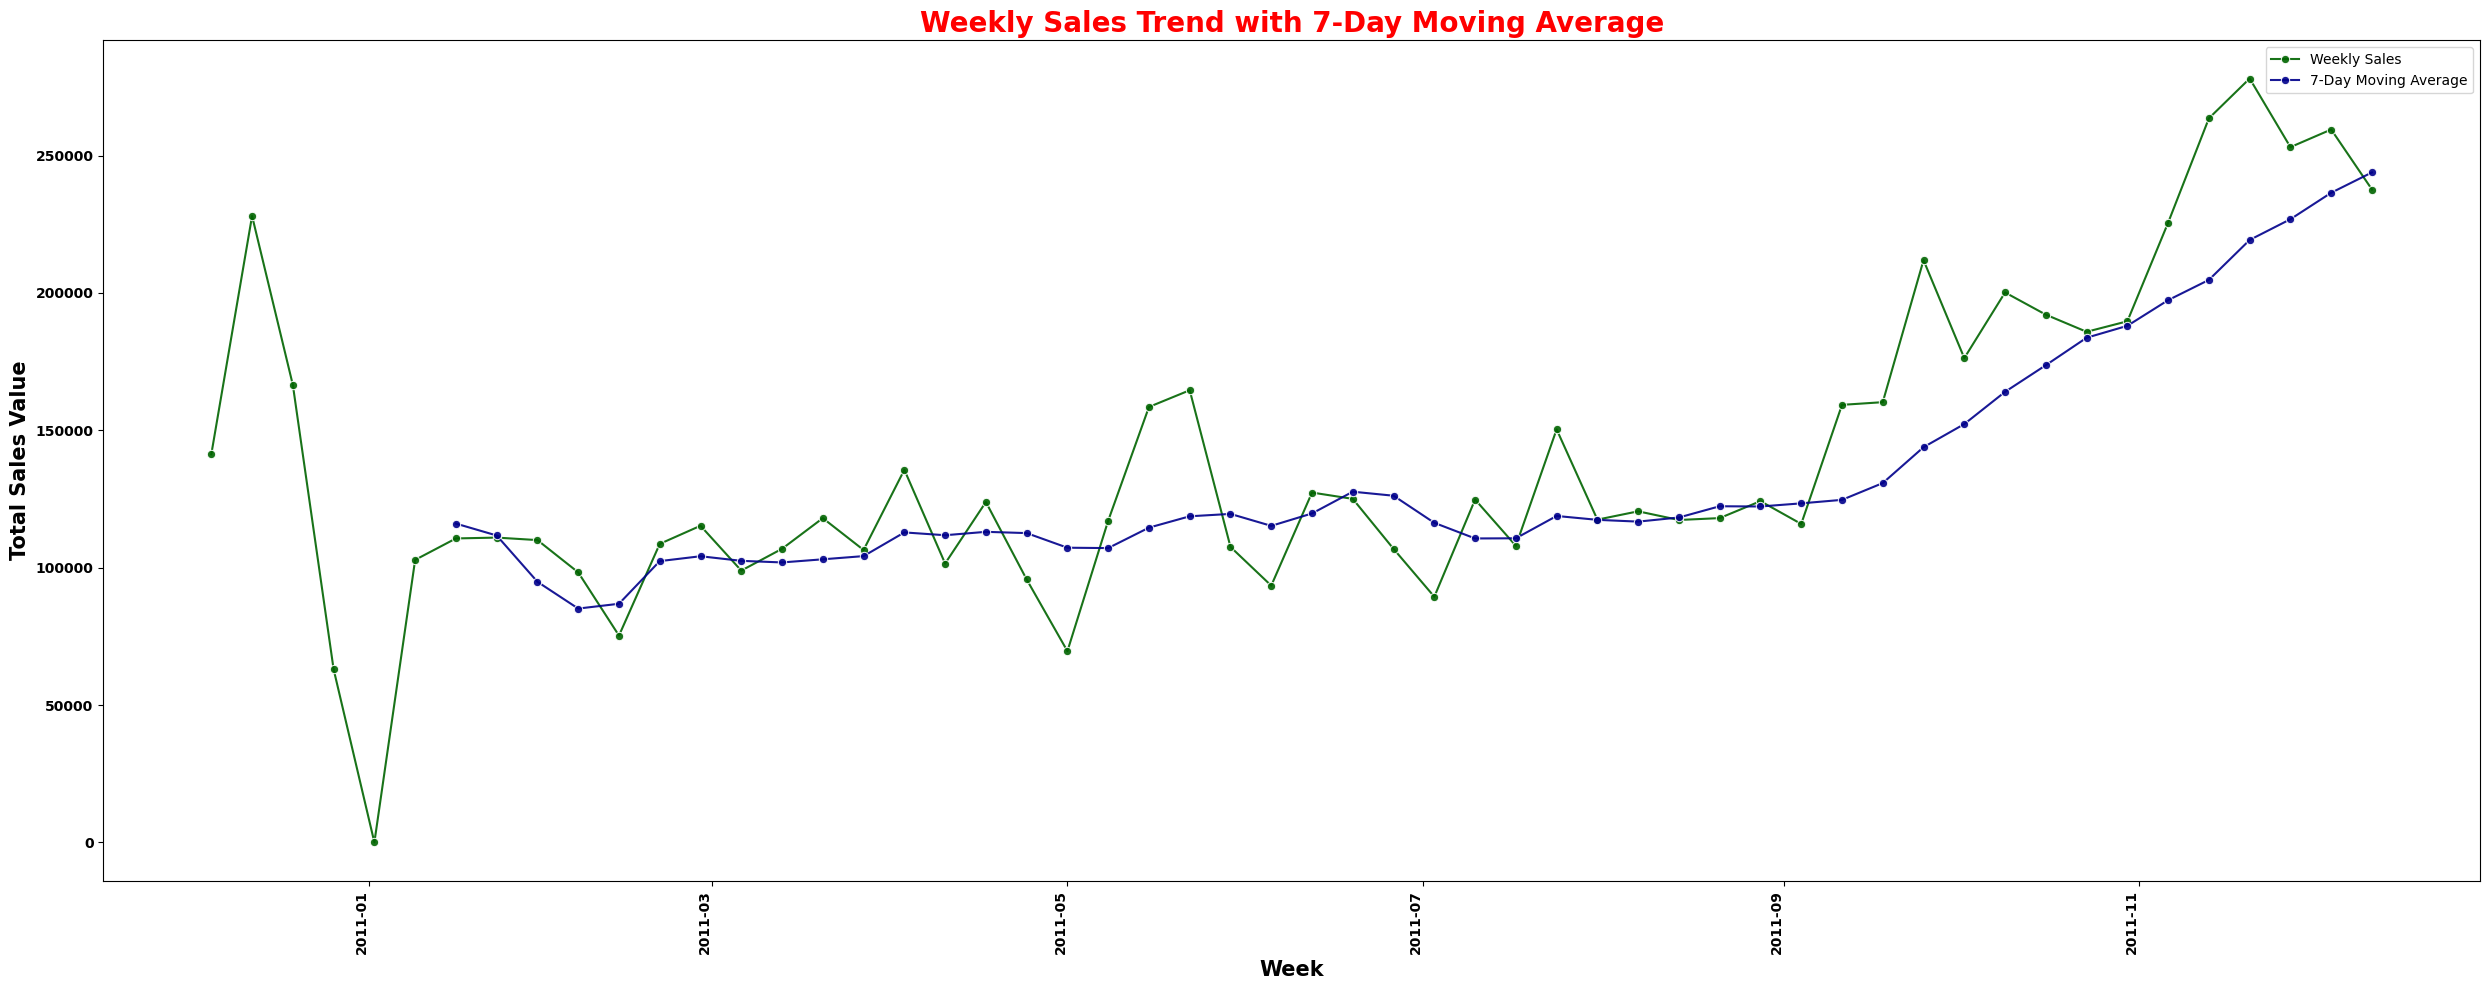

In [ ]:
#Creating a line plot
plt.figure(figsize=(25,10) , dpi = 100)
plt.style.use('default')
sns.lineplot(x=weekly_sales.index, y=weekly_sales.values, color = 'darkgreen' , label = "Weekly Sales" , alpha = 0.9, marker = 'o')
sns.lineplot(x=rolling_mean.index, y=rolling_mean.values, label = '7-Day Moving Average' , color = 'darkblue' , alpha = 0.9, marker = 'o')
plt.title('Weekly Sales Trend with 7-Day Moving Average' , weight = 'bold', c = 'red' , fontsize = 20)
plt.xlabel('Week' , weight = 'bold', c = 'k', fontsize = 15)
plt.ylabel('Total Sales Value' , weight = 'bold' , c = 'k', fontsize = 15)
plt.xticks(rotation = 90 , ha = 'right' , weight = 'bold')
plt.yticks(weight = 'bold')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
#Resampling the data to monthly frequency and sum the total transaction value
monthly_sales = df_time_series['TotalTransactionValue'].resample('ME').sum()

In [ ]:
#Calculating a 7-day moving average
rolling_mean_m = monthly_sales.rolling(window=7).mean()

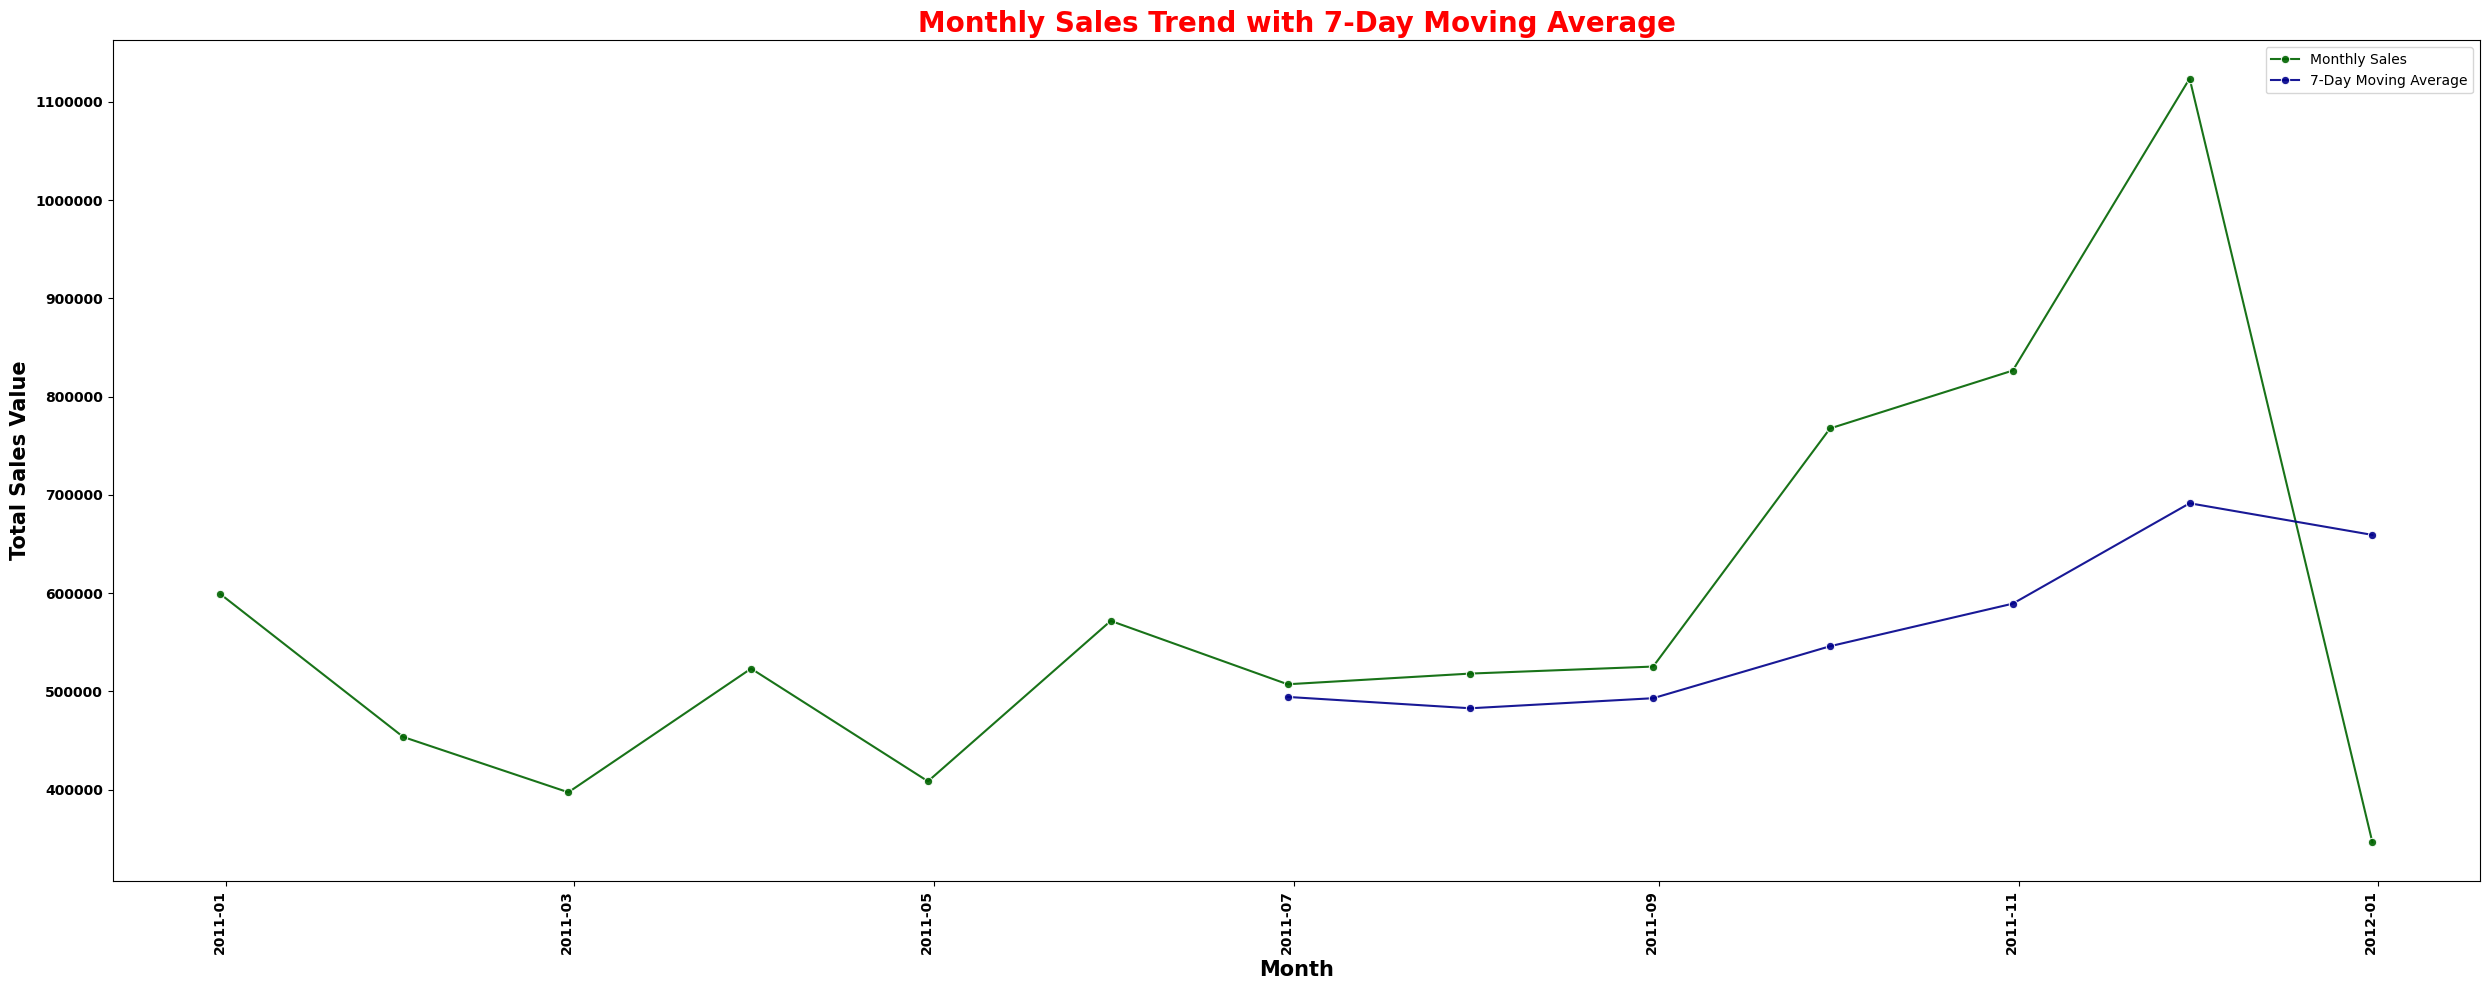

In [ ]:
#Creating a line plot
plt.figure(figsize=(25,10) , dpi = 100)
plt.style.use('default')
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, color = 'darkgreen' , label = "Monthly Sales" , alpha = 0.9, marker = 'o')
sns.lineplot(x=rolling_mean_m.index, y=rolling_mean_m.values, label = '7-Day Moving Average' , color = 'darkblue' , alpha = 0.9, marker = 'o')
plt.title('Monthly Sales Trend with 7-Day Moving Average' , weight = 'bold', c = 'red' , fontsize = 20)
plt.xlabel('Month' , weight = 'bold', c = 'k', fontsize = 15)
plt.ylabel('Total Sales Value' , weight = 'bold' , c = 'k', fontsize = 15)
plt.xticks(rotation = 90 , ha = 'right' , weight = 'bold')
plt.yticks(weight = 'bold')
plt.legend()
plt.ticklabel_format(style = 'plain' , axis = 'y')
plt.grid(False)
plt.tight_layout()
plt.show()

<ipython-input-394-3e045ed0a764>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ab = sns.barplot(x='MonthLabel', y='TotalRevenue', data = monthly_sales_df, palette = 'viridis')


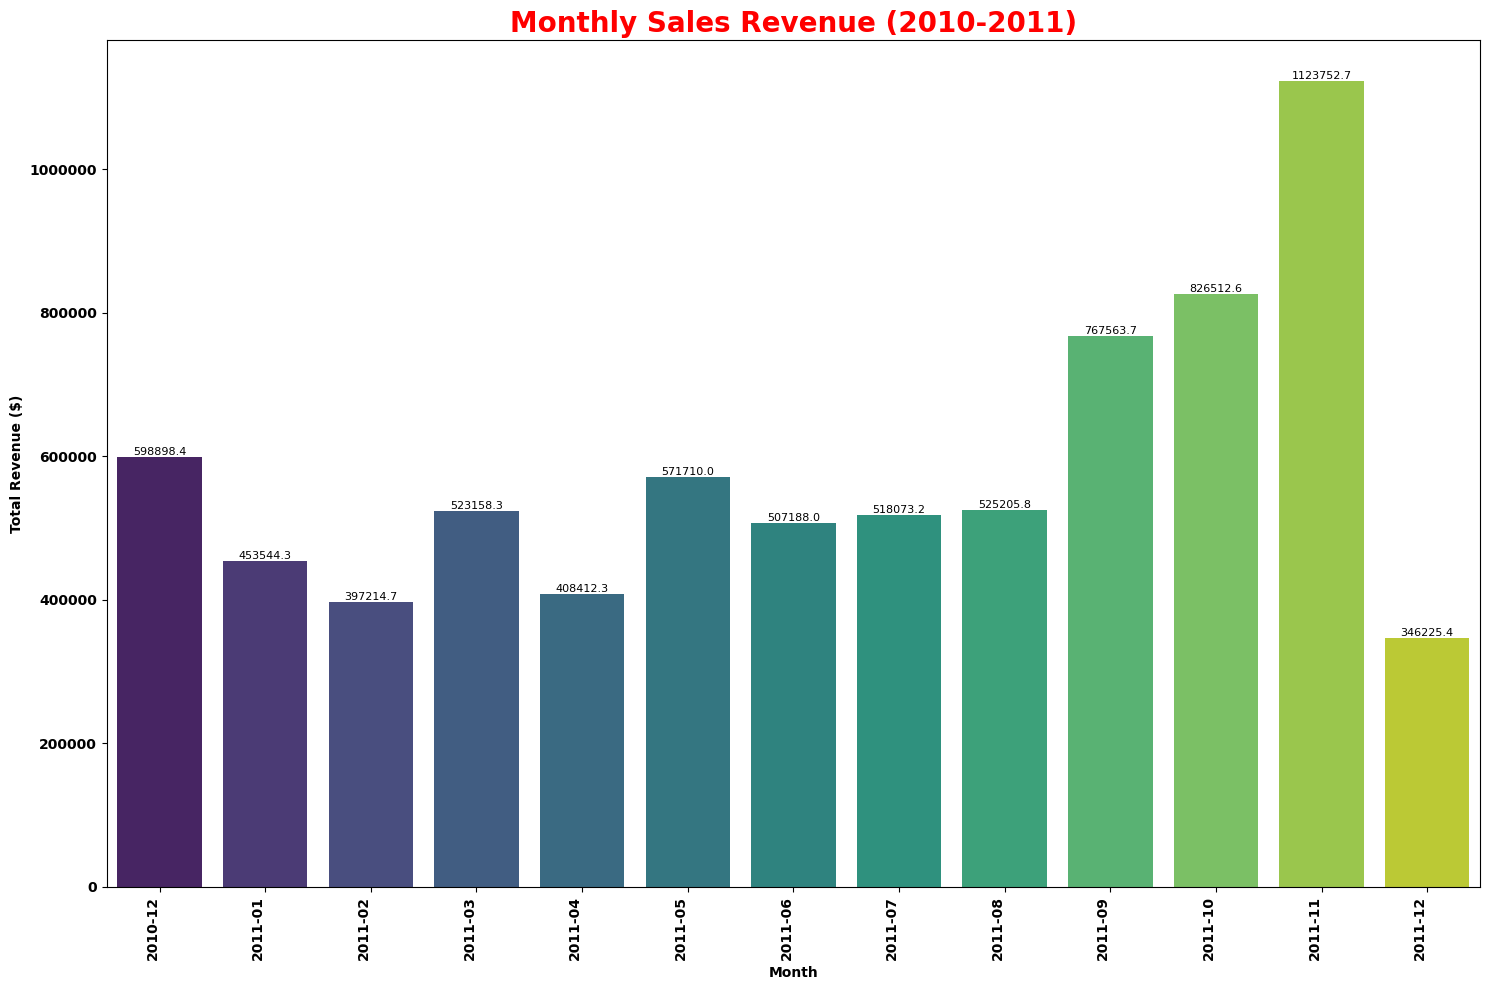

In [ ]:
monthly_sales_revenue = df_sales_cleaned.set_index('InvoiceDate')['TotalTransactionValue'].resample('ME').sum()
monthly_sales_df = monthly_sales_revenue.reset_index()
monthly_sales_df.columns = ['Month', 'TotalRevenue']
monthly_sales_df['MonthLabel'] = monthly_sales_df['Month'].dt.strftime('%Y-%m')
#Plotting Bottom 10 Customers
plt.figure(figsize=(15,10) , dpi = 100),
plt.style.use('default')
ab = sns.barplot(x='MonthLabel', y='TotalRevenue', data = monthly_sales_df, palette = 'viridis')
plt.title('Monthly Sales Revenue (2010-2011)' , weight = 'bold' ,c = 'red' ,  fontsize = 20)

plt.xlabel('Month' , weight = 'bold', c = 'k')
plt.ylabel('Total Revenue ($)' , weight = 'bold' , c = 'k')
plt.xticks(rotation = 90 , ha = 'right' , weight = 'bold')
plt.yticks(weight = 'bold')
for p in ab.patches:
        ab.annotate('{:.1f}' . format(p.get_height()),(p.get_x()+0.4 , p.get_height()+10),
                     ha = 'center' , va= 'bottom',
                    color = 'black' , size = 8, rotation = 0)
ab.ticklabel_format(style = 'plain' , axis = 'y')
plt.tight_layout()

plt.show()


In [ ]:
df_sales_cleaned['DayOfWeek'] = df_sales_cleaned['InvoiceDate'].dt.dayofweek

In [ ]:
day_names = ['Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday' , 'Sunday']
sales_by_day_n = df_sales_cleaned.groupby('DayOfWeek')['TotalTransactionValue'].sum().reindex(range(7))
transactions_by_day_n = df_sales_cleaned.groupby('DayOfWeek')["InvoiceNo"].nunique().reindex(range(7))
print("\nTotal Sales Revenue by Day of Week:\n" , sales_by_day_n)
print("\nNumber of Transactions by Day of Week:\n" , transactions_by_day_n)


Total Sales Revenue by Day of Week:
 DayOfWeek
0    1257222.630
1    1457584.001
2    1362332.080
3    1555358.690
4    1225534.911
5            NaN
6     709427.051
Name: TotalTransactionValue, dtype: float64

Number of Transactions by Day of Week:
 DayOfWeek
0    2968.0
1    3370.0
2    3523.0
3    4086.0
4    2996.0
5       NaN
6    2177.0
Name: InvoiceNo, dtype: float64


In [ ]:
sales_by_day_df = pd.DataFrame({'DayOfWeek' : sales_by_day_n.index , 'TotalRevenue' : sales_by_day_n.values})
transactions_by_day_df = pd.DataFrame({'DayOfWeek' : transactions_by_day_n.index , 'TotalTransactions' : transactions_by_day_n.values})

In [ ]:
sales_by_day_df['DayName'] = sales_by_day_df['DayOfWeek'].map(lambda x: day_names[x])
transactions_by_day_df['DayName'] = transactions_by_day_df['DayOfWeek'].map(lambda x: day_names[x])

In [ ]:
print("\nTotal Sales Revenue by Day of Week:\n" , sales_by_day_df[['DayName' , 'TotalRevenue']])
print("\nNumber of Transactions by Day of Week:\n" , transactions_by_day_df[['DayName' , 'TotalTransactions']])


Total Sales Revenue by Day of Week:
      DayName  TotalRevenue
0     Monday   1257222.630
1    Tuesday   1457584.001
2  Wednesday   1362332.080
3   Thursday   1555358.690
4     Friday   1225534.911
5   Saturday           NaN
6     Sunday    709427.051

Number of Transactions by Day of Week:
      DayName  TotalTransactions
0     Monday             2968.0
1    Tuesday             3370.0
2  Wednesday             3523.0
3   Thursday             4086.0
4     Friday             2996.0
5   Saturday                NaN
6     Sunday             2177.0


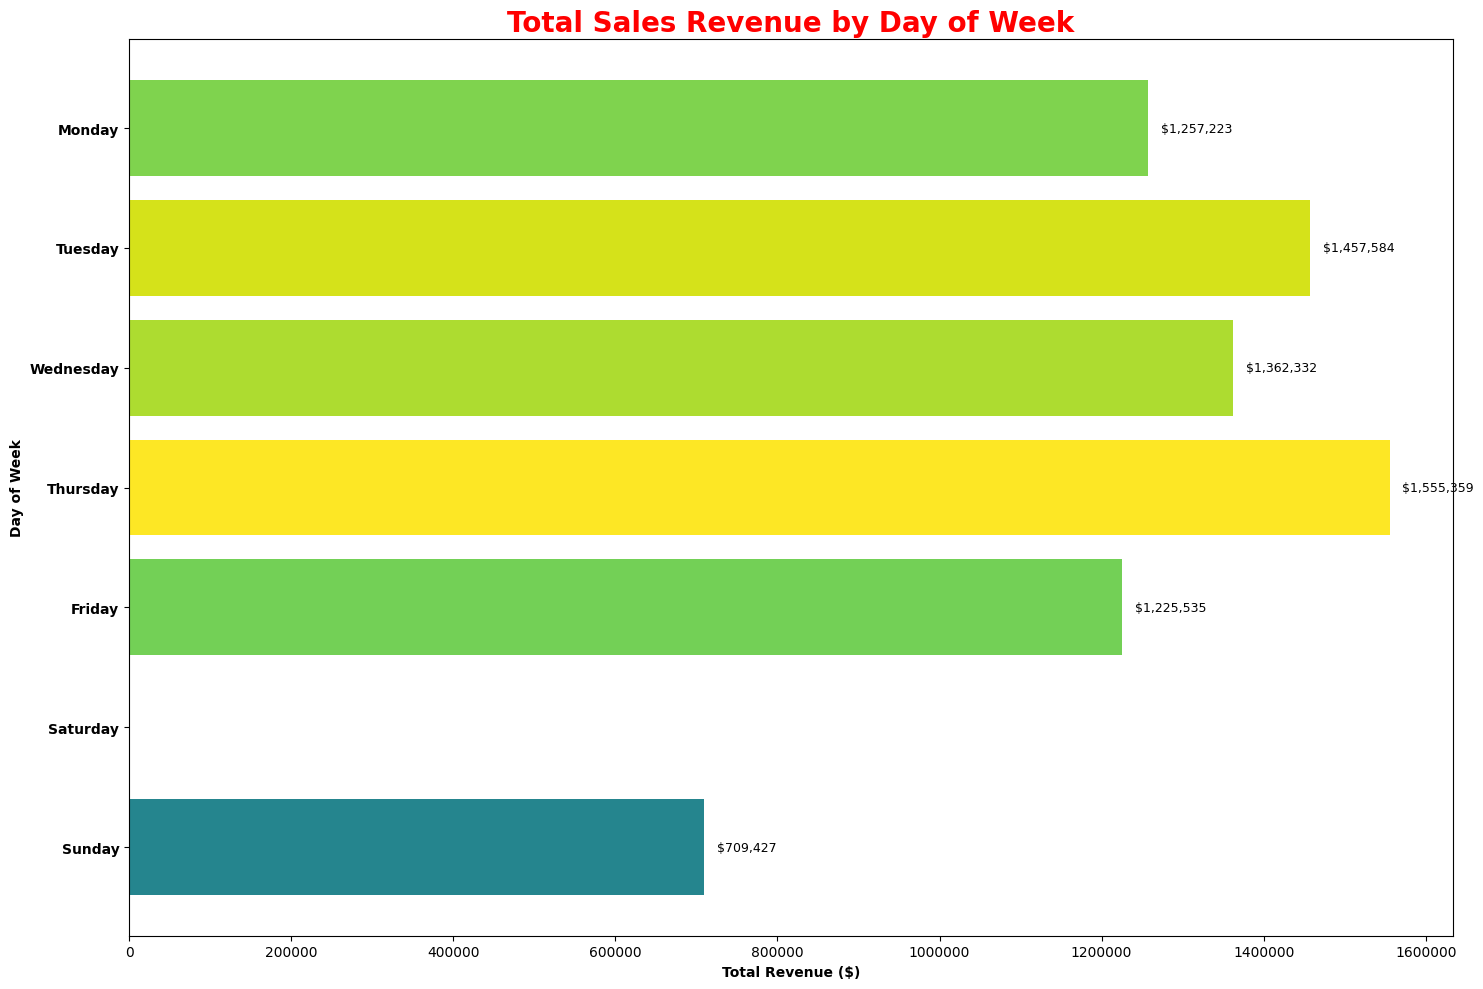

In [ ]:
plt.figure(figsize=(15,10) , dpi = 100)
plt.style.use('default')
ax1 = plt.gca()
bars1 = ax1.barh(sales_by_day_df['DayOfWeek'],sales_by_day_df['TotalRevenue'], color = plt.cm.viridis(sales_by_day_df['TotalRevenue']/sales_by_day_df['TotalRevenue'].max()))
ax1.set_title("Total Sales Revenue by Day of Week" , weight = 'bold', c = 'red' , fontsize = 20)
ax1.set_xlabel('Total Revenue ($)' , weight = 'bold', c = 'k')
ax1.set_ylabel('Day of Week' , weight = 'bold' , c = 'k')
ax1.set_yticks(sales_by_day_df['DayOfWeek'])
ax1.set_yticklabels(day_names , weight = 'bold' , c = 'k')
ax1.invert_yaxis()
for bar in bars1:
  bar_width = bar.get_width()
  bar_y = bar.get_y() + bar.get_height()/2
  ax1.text(bar_width + (sales_by_day_df['TotalRevenue'].max() *0.01),bar_y,f"${bar_width:,.0f}",ha ='left',va='center',color = 'black', fontsize = 9)
ax1.ticklabel_format(style = 'plain' , axis = 'x')
plt.tight_layout()
plt.show()

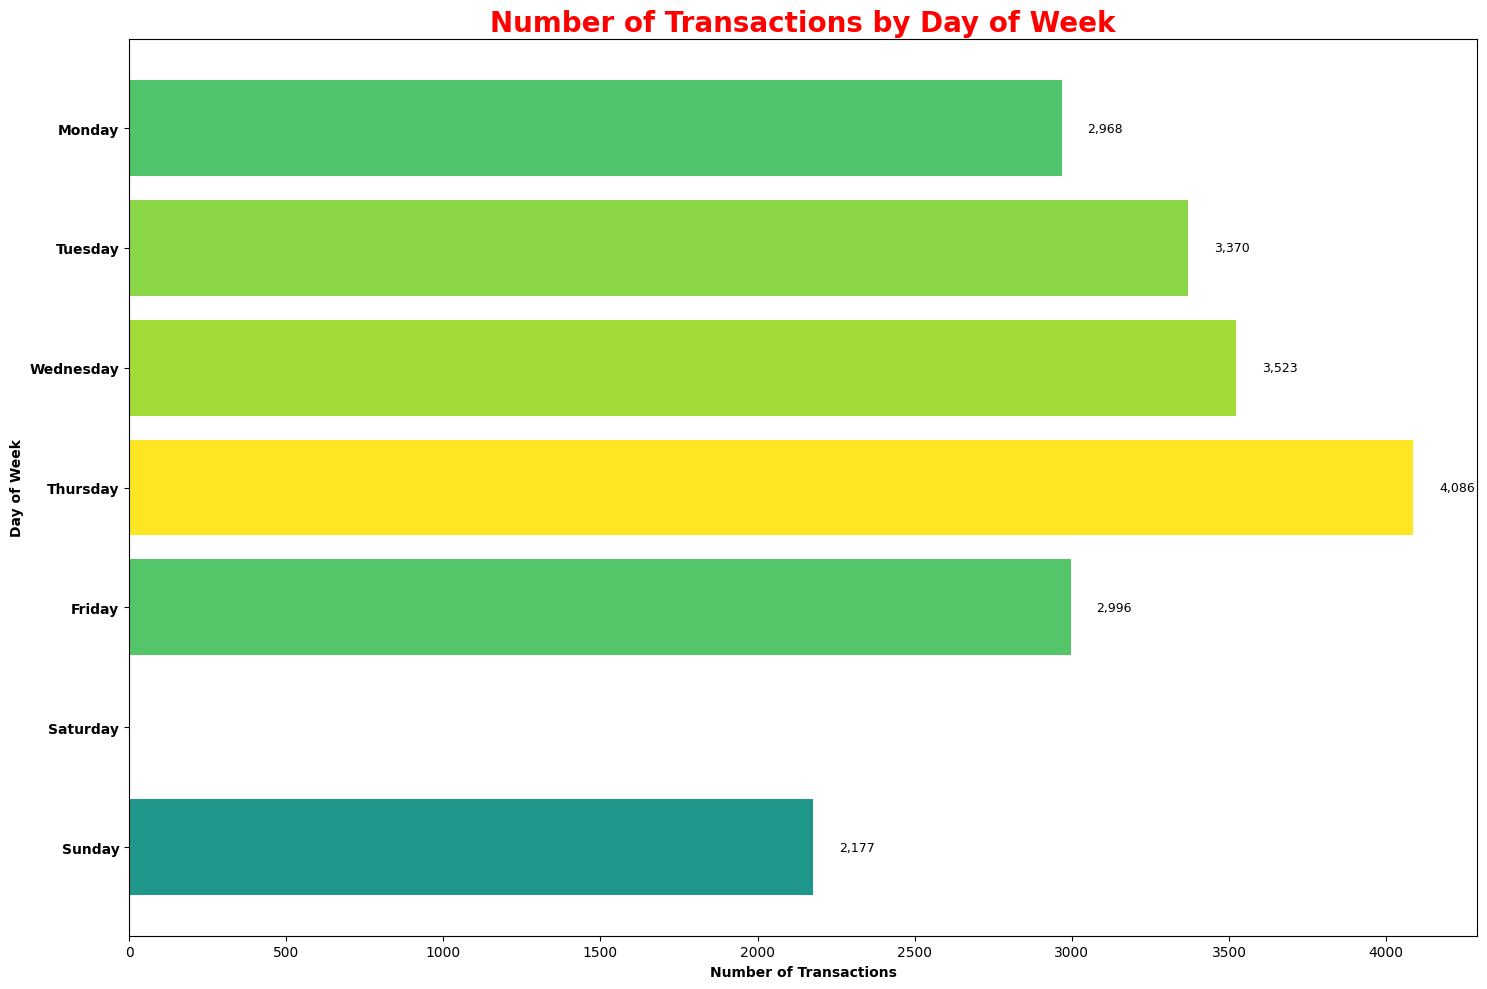

In [ ]:
plt.figure(figsize=(15,10) , dpi = 100)
plt.style.use('default')
ax2 = plt.gca()
bars2 = ax2.barh(transactions_by_day_df['DayOfWeek'],transactions_by_day_df['TotalTransactions'], color = plt.cm.viridis(transactions_by_day_df['TotalTransactions']/transactions_by_day_df['TotalTransactions'].max()))
ax2.set_title("Number of Transactions by Day of Week" , weight = 'bold', c = 'red' , fontsize = 20)
ax2.set_xlabel('Number of Transactions' , weight = 'bold', c = 'k')
ax2.set_ylabel('Day of Week' , weight = 'bold' , c = 'k')
ax2.set_yticks(transactions_by_day_df['DayOfWeek'])
ax2.set_yticklabels(day_names , weight = 'bold' , c = 'k')
ax2.invert_yaxis()
for bar in bars2:
  bar_width = bar.get_width()
  bar_y = bar.get_y() + bar.get_height()/2
  ax2.text(bar_width + (transactions_by_day_df['TotalTransactions'].max() *0.02),bar_y,f"{bar_width:,.0f}",ha ='left',va='center',color = 'black', fontsize = 9)
ax2.ticklabel_format(style = 'plain' , axis = 'x')
plt.tight_layout()
plt.show()

**Results**
1. The bar chart and line graph for the  monthly sales clearly illustrate a pronounced upward trend throughout 2011.
2. Sales started strong in December 2010 (~598K), expereienced a dip in early 2011(lowest in February, ~397K), and then showed consistent recovery and significant acceleration.
3. There was a substantial surge in Q4, culminating in maximum sales in November 2011 (1,123,752.7), which was nearly double December 2010's revenue.
4. A very sharp decline is evident from November 2011 to December 2011 (346,225.4), highlughting a typical post-peak season drop. This December 2011 figure is notably lower than December 2010, highlighting a significant year-over-year dip for that specific month despite overall annual growth.
5. The weekly sales graph shows weekly fluctuations but a consistent upward path towads the year's end, with notable spiked in early 2011 and late summer before the Q4 surge.
6. THURSDAY is the peak day for both revenue(1,555,358.69) and transactions(4,086). SUNDAY is the lowest operating day for both(709,427.05 revenue, 2,177 transactions.)
7. Crucially, there are no recorded sales or transactions for Saturdays.


**Insights**
1. The usiness demonstrates impressive overall growth from 2010 to 2011, culminating in a strong Q4 peak in November. However, the significant year-over-year decline in December revenue (from ~598K in 2010 to ~346K in 2011) is a critical observation. While common for a post-peak dip, this specific drop suggests a potential shift in purchasing patterns or increased competition in the final month of the year. Strategic planning must account for the pronounced seasonal peak in November, requiring heavy investment in inventory and marketing. However, the unexpected December YOY decline warrants further investigation to understand its drivers and implement targeted strategies (e.g., clearance sales, post-holiday promotions) to stabilize or improve end-of-year performance.
2. Operations are heavily concentrated on weekdays, with Thursday being the clear leader in both customer activity and revenue generation. The complete absence of Saturday data (NaN) across both sales and transactions is a significant observation. If the business is closed on Saturdays, this represents a substantial, potentially untapped market. Re-evaluating Saturday operations could unlock considerable additional revenue, especially if it's a high-demand retail day. For active days, resources should be optimized for Thursday's high performance, while strategies might be needed to boost Sunday activity or manage lower demand efficiently.
3. The alignment of highest revenue and highest transactions on Thursday indicates that this day not only attracts the most customers but also customers with higher purchasing intent. Thursday is the prime day for high-impact promotions, new product launches, or engaging marketing efforts to capitalize on existing customer behavior and maximize conversions.
4. The overall upward trend, smoothed by moving averages and visually clear in both weekly and monthly sales trends, confirms that the growth is a sustained pattern rather than a one-off event. This positive underlying momentum provides confidence for strategic investments, expansion plans, and setting ambitious targets for the upcoming year.

### **Average Revenue per Monthly Active Customer**

In [ ]:
#Monthly Active Customers
monthly_revenue_per_active_customers = df_time_series.groupby(pd.Grouper(freq ='M'))['TotalTransactionValue'].sum()
monthly_active_customers = df_time_series.resample('ME')['CustomerID'].nunique()
average_revenue_per_active_customer = monthly_revenue_per_active_customers / monthly_active_customers
print(average_revenue_per_active_customer)

<ipython-input-402-304ea0b5d126>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue_per_active_customers = df_time_series.groupby(pd.Grouper(freq ='M'))['TotalTransactionValue'].sum()


InvoiceDate
2010-12-31    590.047665
2011-01-31    552.429111
2011-02-28    476.848427
2011-03-31    483.063980
2011-04-30    442.004655
2011-05-31    496.707176
2011-06-30    458.578680
2011-07-31    489.209840
2011-08-31    536.471665
2011-09-30    584.587716
2011-10-31    572.773798
2011-11-30    647.322990
2011-12-31    539.291931
Freq: ME, dtype: float64


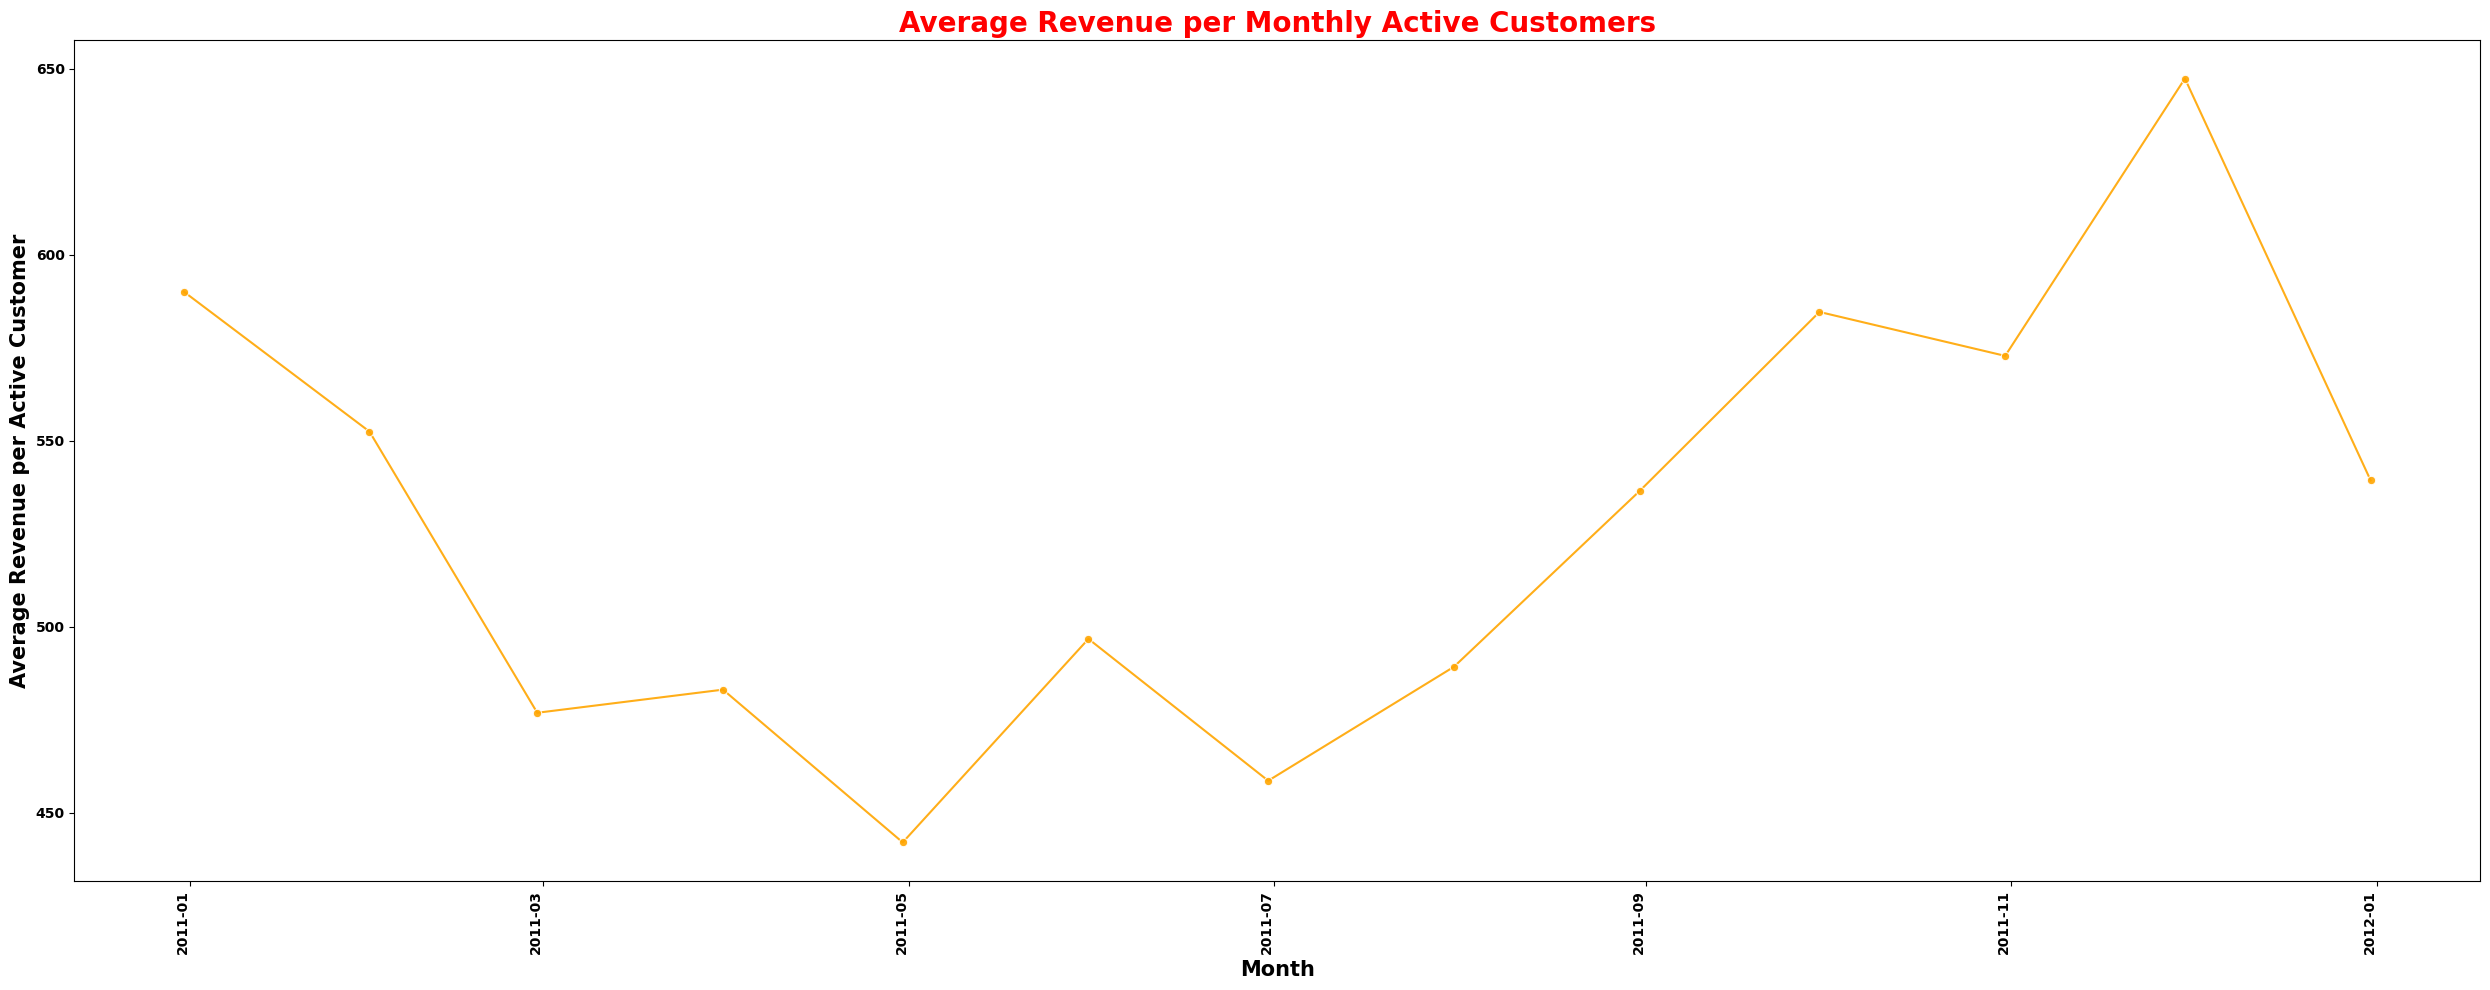

In [ ]:
#Creating a line plot
plt.figure(figsize=(25,10) , dpi = 100)
plt.style.use('default')
sns.lineplot(x=average_revenue_per_active_customer.index, y=average_revenue_per_active_customer.values, color = 'orange' , alpha = 0.9, marker = 'o')
plt.title('Average Revenue per Monthly Active Customers' , weight = 'bold', c = 'red' , fontsize = 20)
plt.xlabel('Month' , weight = 'bold', c = 'k', fontsize = 15)
plt.ylabel('Average Revenue per Active Customer' , weight = 'bold' , c = 'k', fontsize = 15)
plt.xticks(rotation = 90 , ha = 'right' , weight = 'bold')
plt.yticks(weight = 'bold')
plt.ticklabel_format(style = 'plain' , axis = 'y')
plt.grid(False)
plt.tight_layout()
plt.show()

**Results**
1. The average revenue per monthly active customer starts at around 590 in Dec 2010.
2. It experiences a dip in early 2011, reaching its lowest point in April 2011 at 442.00.
3. Following this low, there's a general upward trend, with some minor fluctuations, leading to a peak.
4. The highest average revenue per monthly active customer was in November 2011 at 647.32.
5. A decline is observed in December 2011, dropping to 539.29, though this is still higher than the early 2011 lows.


**Insights**
1. The average revenue per customer is not constant but fluctautes throughout the year, mirroring the overall sales trend to some extent, but with nuanced differences. The value per customer is lowest in the mid-spring(April) and highest during the peal sales season(November). Customers tend to spend more per individual transaction or make higher-value purchases during the high-demand periods like Q4. This implies that during these periods, the focus can be on maximizing the value of each customer interaction through strategic upselling pr bundling, as customer intent to spend is likely higher.
2. While total sales hit their lowest point in February 2011, the average revenue per active customer actually hit its lowest in April 2011. This suggests that in February, although fewer sales occurred, the customers who did purchase might have spent slightly more on average than those who purchased in April. Conversely, April might have seen a larger number of customers, but each spent less. While total sales hit their lowest point in February 2011, the average revenue per active customer actually hit its lowest in April 2011. This suggests that in February, although fewer sales occurred, the customers who did purchase might have spent slightly more on average than those who purchased in April. Conversely, April might have seen a larger number of customers, but each spent less.
3. The fact that November is the peak month for both total sales (from previous analysis) and average revenue per active customer indicates that during this period, the brand is not only attracting more customers but also that these customers are spending more on average. This reinforces November as the prime time for maximizing revenue. Marketing efforts should focus on encouraging higher average order values (AOV) and customer lifetime value (CLTV) during this period.
4. The decline in average revenue per customer in December 2011, following the November peak, aligns with the overall sales drop. While total sales dip after the holiday rush, the average value per customer also decreases. Strategies for December/January could focus on clearance, gift card redemption, or promoting items that encourage initial purchases to build a customer base for the next year, rather than relying on high individual transaction values.

### **Monthly Average Order Value (AOV)**

In [ ]:
monthly_transactions = df_time_series.resample('ME').size()
monthly_aov = monthly_sales / monthly_transactions
print(monthly_aov)

InvoiceDate
2010-12-31    14.947796
2011-01-31    13.626087
2011-02-28    15.185211
2011-03-31    15.172364
2011-04-30    14.485788
2011-05-31    16.379497
2011-06-30    14.658613
2011-07-31    13.851114
2011-08-31    15.816592
2011-09-30    16.106677
2011-10-31    14.457609
2011-11-30    13.980154
2011-12-31    14.236828
Freq: ME, dtype: float64


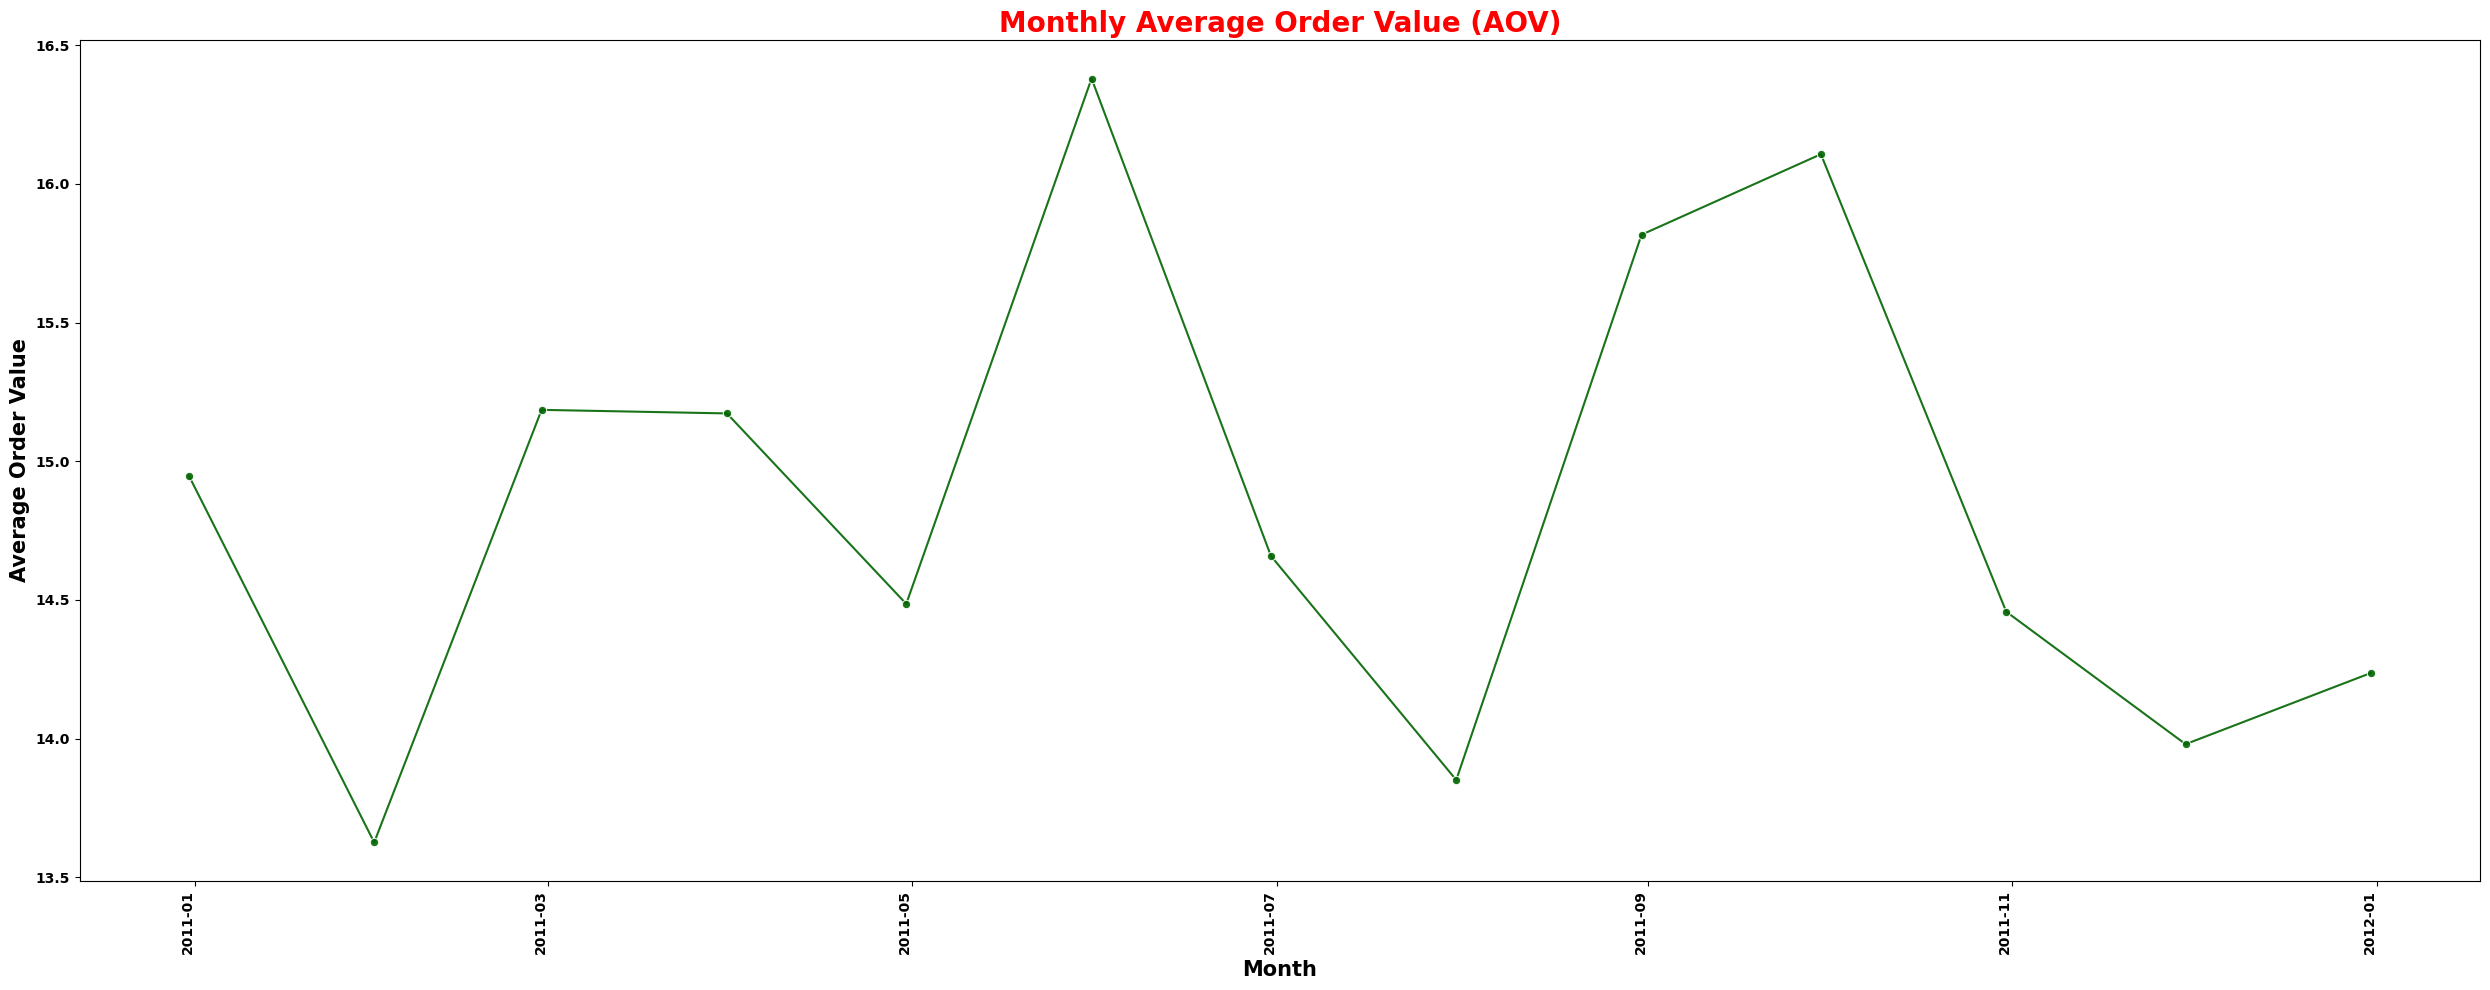

In [ ]:
#Plotting the AOV
plt.figure(figsize=(25,10) , dpi = 100)
plt.style.use('default')
sns.lineplot(x=monthly_aov.index, y=monthly_aov.values, color = 'darkgreen' , alpha = 0.9 , marker = 'o')
plt.title('Monthly Average Order Value (AOV)' , weight = 'bold', c = 'red' , fontsize = 20 )
plt.xlabel('Month' , weight = 'bold', c = 'k', fontsize = 15)
plt.ylabel('Average Order Value' , weight = 'bold' , c = 'k', fontsize = 15)
plt.xticks(rotation = 90 , ha = 'right' , weight = 'bold')
plt.yticks(weight = 'bold')
plt.ticklabel_format(style = 'plain' , axis = 'y')
plt.grid(False)
plt.tight_layout()
plt.show()

**Results**
1. The AOV starts at approximately 14.95 in Dec 2010.
2. It shows significant monthly fluctuations throughout 2011.
3. The lowest AOV occurred in January 2011 (13.63) and July 2011 (13.85).
4. The highest AOV was observed in May 2011 (16.38).
5. In November 2011, which was the peak month for total sales and average revenue per customer, the AOV was relatively low at 13.98.
6. By December 2011, AOV slightly increased to 14.24, recovering somewhat from November's low.

**Insights**
1. The highest total sales and highest average revenue per customer occur in November, but an Average Order Value is actually lowest in November 2011 (13.98) compared to its peak in May (16.38) and other months. he massive surge in total sales in November is primarily driven by increased transaction volume (more customers, or existing customers buying more frequently), rather than customers spending more per individual purchase. This indicates that promotional strategies or pricing in the peak season might be encouraging smaller, more frequent buys rather than higher-value single transactions.
2. The highest AOV occurs in May (16.38), a month when overall sales are moderate and average revenue per customer is still in its recovery phase from early 2011 lows. This suggests that in May, customers might be purchasing higher-priced items per transaction, or they are more susceptible to upsell/cross-sell techniques at the point of purchase. Understanding what drives this higher AOV in May could unlock strategies to boost AOV during other, higher-volume periods.
3. The AOV consistently hovers in the 13-16 range. There are noticeable dips (January, July, November) and peaks (May, August, September). Strategies focused on increasing AOV, such as bundling complementary products, setting minimum purchase thresholds for free shipping, offering tiered discounts (e.g., "spend X more to get Y% off"), or promoting higher-margin items, could be particularly effective during months with lower AOV to boost overall revenue.
4. The lower AOV during the high-volume November period suggests that customers might be making smaller, more targeted purchases (e.g., for holiday gifts) rather than large basket-filling buys. During peak holiday seasons, the focus should remain on maximizing transaction volume and customer acquisition, but there's also an opportunity to gently encourage incremental additions to the cart, as customers are already in a buying mindset.

### **Seasonal Revenue Patterns**

In [ ]:
print(df_time_series.head())

                    InvoiceNo                          Description  Quantity  \
InvoiceDate                                                                    
2010-12-01 08:26:00    536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
2010-12-01 08:26:00    536365                  WHITE METAL LANTERN         6   
2010-12-01 08:26:00    536365       CREAM CUPID HEARTS COAT HANGER         8   
2010-12-01 08:26:00    536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
2010-12-01 08:26:00    536365       RED WOOLLY HOTTIE WHITE HEART.         6   

                     UnitPrice  ...        Day     Month  Year  \
InvoiceDate                     ...                              
2010-12-01 08:26:00       2.55  ...  Wednesday  December  2010   
2010-12-01 08:26:00       3.39  ...  Wednesday  December  2010   
2010-12-01 08:26:00       2.75  ...  Wednesday  December  2010   
2010-12-01 08:26:00       3.39  ...  Wednesday  December  2010   
2010-12-01 08:26:00       3.39  ...  Wednes

In [ ]:
print(df_time_series.index.year.unique())

Index([2010, 2011], dtype='int32', name='InvoiceDate')


In [ ]:
print(df_time_series.index.month_name().unique())

Index(['December', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November'],
      dtype='object', name='InvoiceDate')


In [ ]:
#Group by Year and Month and sum the revenue
seasonal_revenue = df_time_series.groupby([df_time_series.index.year,df_time_series.index.month_name()])['TotalTransactionValue'].sum().unstack(level = 0)

In [ ]:
#Order the months chronologically for the plot
month_order = ['January' , 'February','March', 'April','May','June','July','August','September','October','November','December']
seasonal_revenue = seasonal_revenue.reindex(month_order)
print(seasonal_revenue)

InvoiceDate       2010         2011
InvoiceDate                        
January            NaN   453544.300
February           NaN   397214.740
March              NaN   523158.290
April              NaN   408412.301
May                NaN   571709.960
June               NaN   507188.020
July               NaN   518073.221
August             NaN   525205.760
September          NaN   767563.671
October            NaN   826512.590
November           NaN  1123752.710
December     598898.38   346225.420


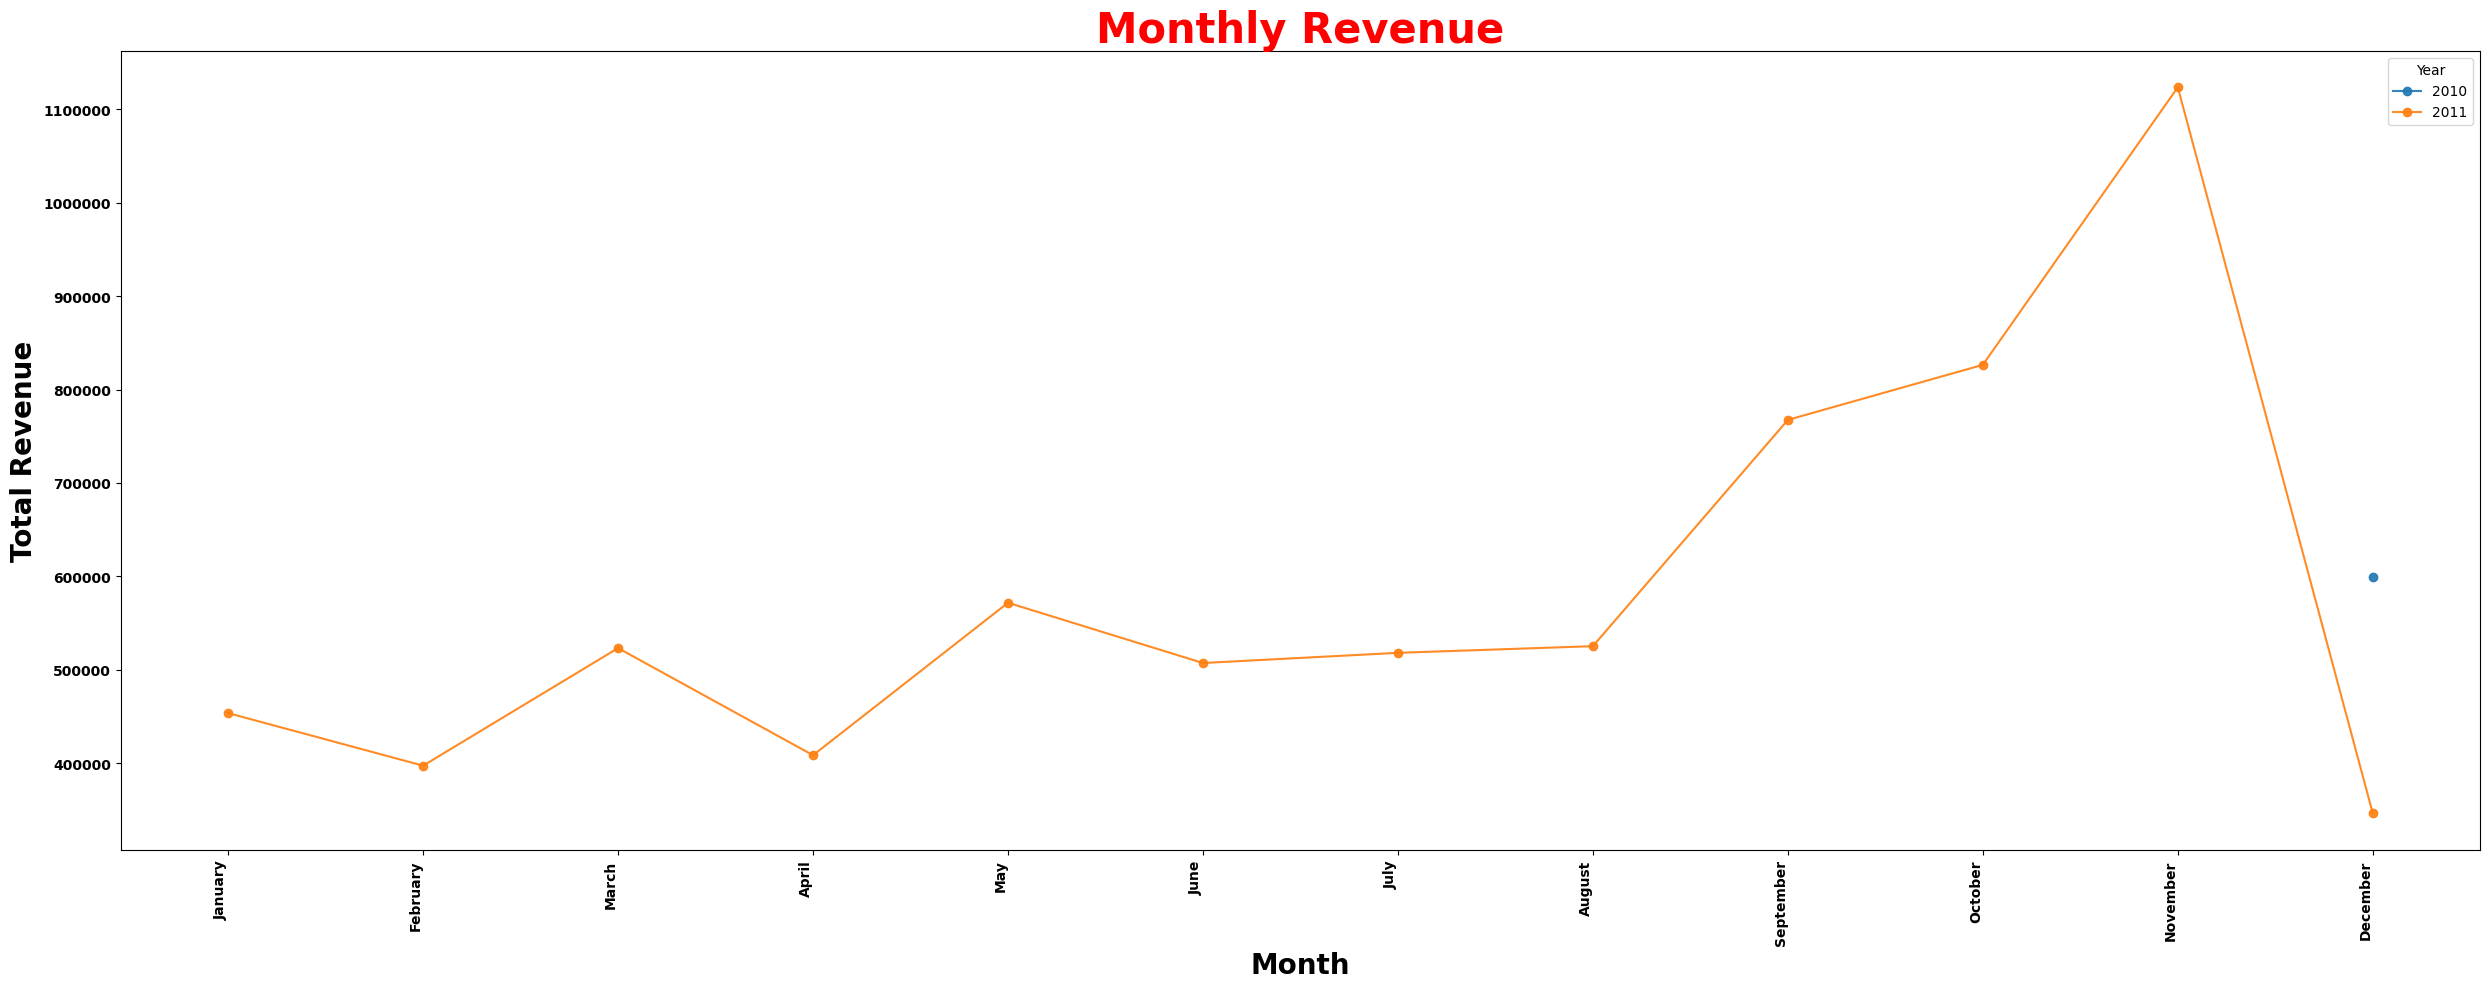

In [ ]:
#Create a plot
plt.figure(figsize=(25,10) , dpi = 100)
plt.style.use('default')
for year in seasonal_revenue.columns:
    plt.plot(seasonal_revenue.index , seasonal_revenue[year], marker = 'o' , label = str(year) , alpha = 0.9)
plt.title('Monthly Revenue' , weight = 'bold', c = 'red' , fontsize = 30)
plt.xlabel('Month' , weight = 'bold', c = 'k', fontsize = 20)
plt.ylabel('Total Revenue' , weight = 'bold' , c = 'k', fontsize = 20)
plt.xticks(rotation = 90 , ha = 'right' , weight = 'bold')
plt.yticks(weight = 'bold')
plt.ticklabel_format(style = 'plain' , axis = 'y')
plt.grid(False)
plt.legend(title = 'Year')
plt.tight_layout()
plt.show()


**Results and Insights are merged with Overall Revenue Trend**


### **Month-over-Month Revenue Growth Rate**

In [ ]:
monthly_sales_yearly = df_time_series.groupby(pd.Grouper(freq = 'ME'))['TotalTransactionValue'].sum()

In [ ]:
#Filtering monthly_sales_yearly for the year 2010 and 2011 before calculating percentage change
monthly_sales_2010 = monthly_sales_yearly[monthly_sales_yearly.index.year == 2010]
monthly_sales_2011 = monthly_sales_yearly[monthly_sales_yearly.index.year == 2011]

In [ ]:
#Calculating the percentage change
monthly_pct_change_2010 = monthly_sales_2010.pct_change() *100
print(monthly_pct_change_2010)

InvoiceDate
2010-12-31   NaN
Freq: ME, Name: TotalTransactionValue, dtype: float64


In [ ]:
monthly_pct_change_2011 = monthly_sales_2011.pct_change() *100
print(monthly_pct_change_2011)

InvoiceDate
2011-01-31          NaN
2011-02-28   -12.419858
2011-03-31    31.706666
2011-04-30   -21.933321
2011-05-31    39.983531
2011-06-30   -11.285782
2011-07-31     2.146187
2011-08-31     1.376743
2011-09-30    46.145326
2011-10-31     7.680004
2011-11-30    35.963169
2011-12-31   -69.190248
Freq: ME, Name: TotalTransactionValue, dtype: float64


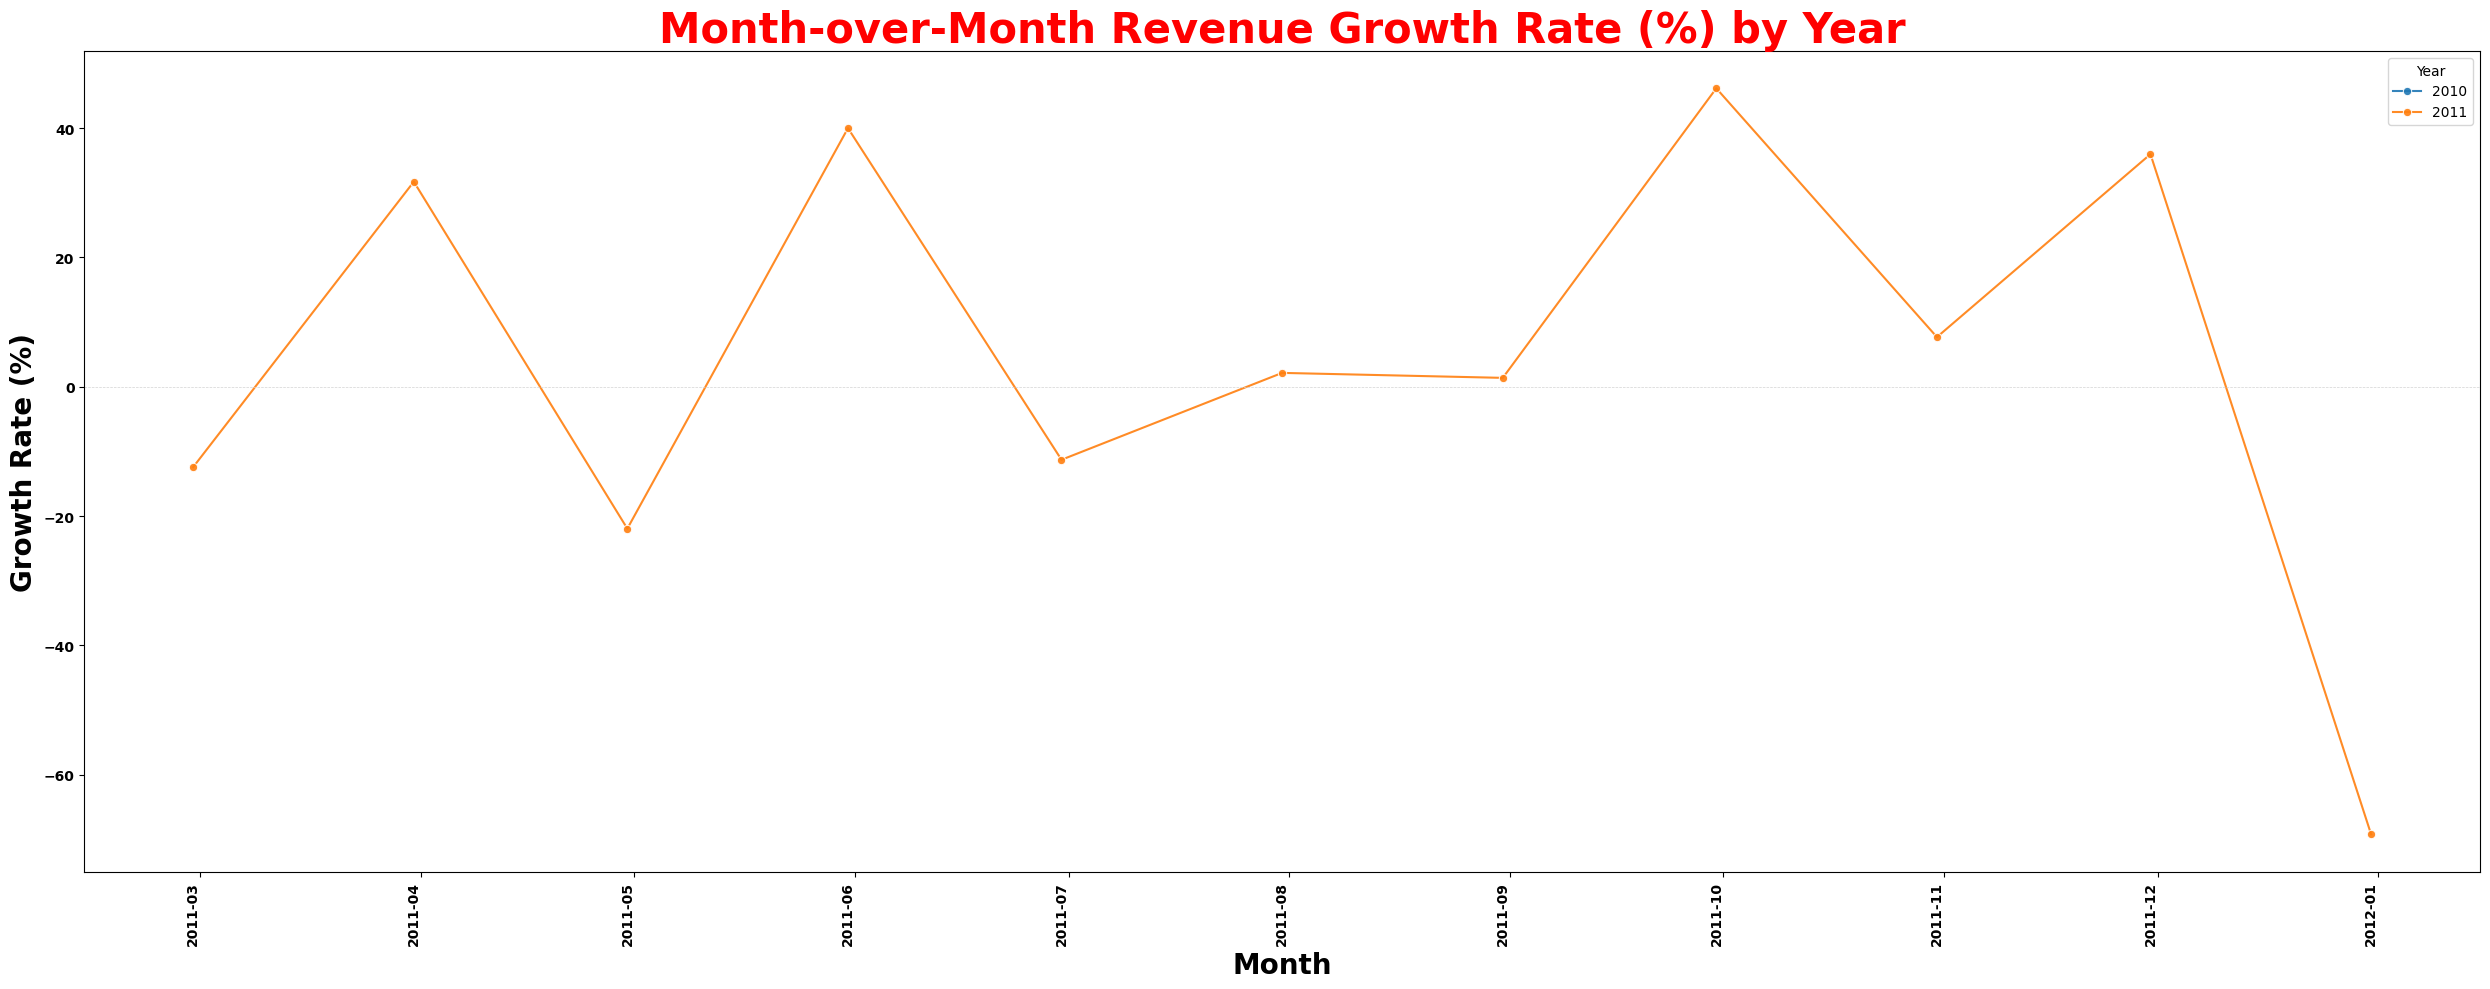

In [ ]:
#Plotting the line graph
plt.figure(figsize=(25,10) , dpi = 100)
plt.style.use('default')
sns.lineplot(x=monthly_pct_change_2010.index, y=monthly_pct_change_2010.values, marker = 'o', label = "2010" , alpha = 0.9)
sns.lineplot(x=monthly_pct_change_2011.index, y=monthly_pct_change_2011.values, marker = 'o', label = "2011" , alpha = 0.9)
plt.title('Month-over-Month Revenue Growth Rate (%) by Year' , weight = 'bold', c = 'red' , fontsize = 30)
plt.xlabel('Month' , weight = 'bold', c = 'k', fontsize = 20)
plt.ylabel('Growth Rate (%)' , weight = 'bold' , c = 'k', fontsize = 20)
plt.xticks(rotation = 90 , ha = 'right' , weight = 'bold')
plt.yticks(weight = 'bold')
plt.ticklabel_format(style = 'plain' , axis = 'y')
plt.axhline(0,color = 'lightgray' , linewidth = 0.5 , linestyle = '--')
plt.grid(False)
plt.legend(title = 'Year')
plt.tight_layout()
plt.show()

**Insights**
1. The revenue growth is characterized by significant month-to-month volatility, oscillating between strong positive growth and substantial contractions. This pattern is directly linked to the seasonal revenue trends, with strong growth periods leading into the peak season and sharp declines following it. While the overall annual revenue shows growth, the extreme monthly fluctuations make short-term forecasting challenging. Business operations, such as inventory management and staffing, need to be highly agile to adapt to these rapid changes in demand.
2. There are two distinct periods of very high positive growth: one in May (~+40%) and another, even stronger, in September (+46%) and November (+36%). Understanding the specific initiatives, market conditions, or product launches that contributed to these surges is crucial. The May spike suggests an opportunity outside of the primary Q4 peak for aggressive growth campaigns. The Q4 surges (September and November) confirm the strong build-up to the holiday season.
3. The dramatic -69.19% growth rate in December is the most striking negative trend. This reflects the sharp decline from the November peak, indicating that a substantial portion of revenue occurs within a very concentrated period. This sharp post-peak drop is a critical factor for financial planning. It suggests that while Q4 is highly lucrative, the business must prepare for a rapid slowdown immediately after. Strategies to mitigate this steep decline could include post-holiday sales, encouraging early-year purchases, or diversifying revenue streams.
4. The fluctuations in Q1 and Q2 (Feb and April declines, March and May surges) indicate that the first half of the year is prone to significant ups and downs before the more sustained growth of Q3 and Q4. Targeted marketing and operational strategies are needed to stabilize and grow revenue during the early part of the year, potentially focusing on customer retention or specific niche promotions during these volatile periods.


### **Quarterly Revenue Analysis**

In [ ]:
quarterly_sales = df_time_series['TotalTransactionValue'].resample("QE").sum()

In [ ]:
#Calculating a 3-month rolling average on the monthly data before resampling to quarterly
monthly_sales = df_time_series['TotalTransactionValue'].resample('ME').sum()
rolling_mean_3month = monthly_sales.rolling(window = 3).mean()

In [ ]:
#Now resampling the 3-month rolling average to quarterly average
rolling_mean_quarterly = rolling_mean_3month.resample('QE').mean()

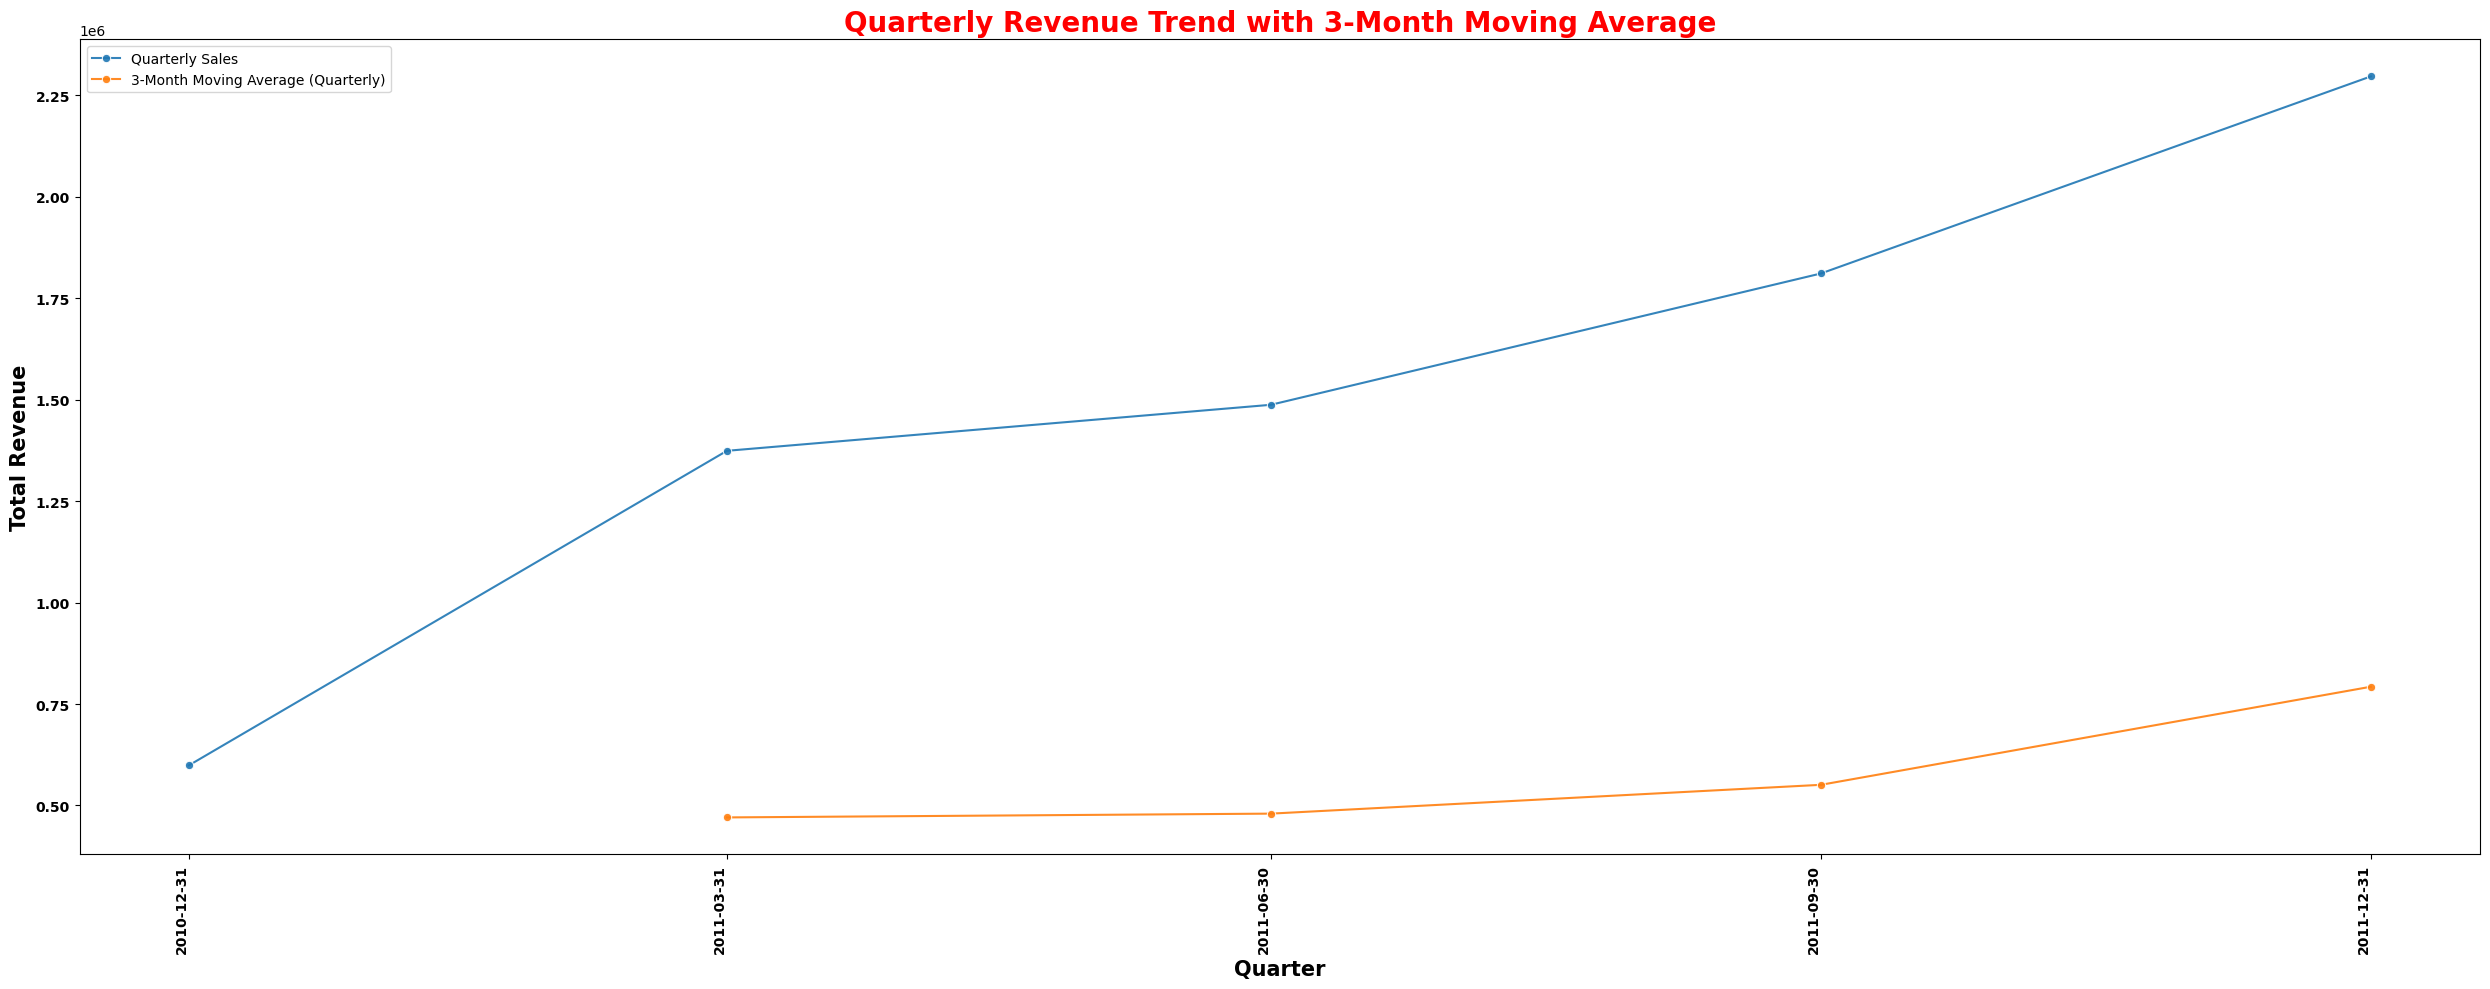

In [ ]:
#Plotting this on the line graph
plt.figure(figsize=(25,10) , dpi = 100)
plt.style.use('default')
sns.lineplot(x=quarterly_sales.index, y=quarterly_sales.values , label = "Quarterly Sales" , alpha = 0.9 , marker = 'o')
sns.lineplot(x=rolling_mean_quarterly.index, y=rolling_mean_quarterly.values, label = '3-Month Moving Average (Quarterly)' , alpha = 0.9 , marker = 'o')
plt.title('Quarterly Revenue Trend with 3-Month Moving Average' , weight = 'bold', c = 'red' , fontsize = 20)
plt.xlabel('Quarter' , weight = 'bold', c = 'k', fontsize = 15)
plt.ylabel('Total Revenue' , weight = 'bold' , c = 'k', fontsize = 15)
plt.xticks(quarterly_sales.index , rotation = 90 , ha = 'right' , weight = 'bold')
plt.yticks(weight = 'bold')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

**Results**
1. Quarterly Revenue Trend:

 - The blue line, representing Quarterly
   Sales, shows a strong and consistent upward trend.
 - Q4 2010 (December only): ~598,898
 - Q1 2011 (Jan-Mar): 1,373,917.33
 - Q2 2011 (Apr-Jun): 1,487,310.28
 - Q3 2011 (Jul-Sep): 1,810,842.65
 - Q4 2011 (Oct-Dec): 2,296,490.72 (This
  is the highest revenue quarter)
2. 3-Month Moving Average (Quarterly):

 - The orange line represents a 3-month
   moving average of the monthly revenue, plotted at the end of each quarter. This provides a smoothed view of the average monthly performance within each quarter.
 - This average also shows an increasing
  trend, from approximately 457K in Q1 2011 to about 765K in Q4 2011, indicating a rising average monthly revenue as the year progresses.

**Insights**
1. The quarterly sales show a clear, robust, and continuous growth trajectory from Q4 2010 through Q4 2011. Each successive quarter in 2011 generated more revenue than the previous one. This confirms the overall health and expansion of the business on a macro level. This consistent growth provides strong validation for current business strategies and supports long-term planning, investment in capacity, and setting ambitious annual targets.
2. Q4 2011 stands out as the highest revenue-generating quarter by a significant margin (2.3 million). This reinforces the impact of the holiday season and end-of-year sales we observed in the monthly trends. Strategic planning for Q4 should be intensified, focusing on maximizing this peak period through aggressive marketing, optimized inventory levels, and adequate staffing. The performance of Q4 is critical to overall annual success.
3. The 3-month moving average line, while representing average monthly performance, confirms that not only are quarterly totals growing, but the average monthly revenue within those quarters is also increasing. This indicates that the business's baseline performance is steadily improving. This rising average monthly revenue provides confidence that growth isn't solely dependent on the largest quarters but reflects an improving underlying operational efficiency or market demand across the year.
4. This quarterly view consolidates the monthly trends, clearly showing the ramp-up from the early year lows (Q1-Q2) to the strong performance in the latter half of the year (Q3-Q4). Quarterly analysis is vital for high-level budget allocation and setting realistic quarterly targets, allowing for strategic adjustments based on seasonal expected performance rather than uniform monthly goals.

### **Optimal Advertising Time**

In [ ]:
df_sales_cleaned['Time'] = df_sales_cleaned['InvoiceDate'].dt.hour

In [ ]:
sales_by_hour = df_sales_cleaned.groupby('Time')['TotalTransactionValue'].sum()
transactions_by_hour = df_sales_cleaned.groupby('Time')['InvoiceNo'].nunique()


In [ ]:
#Sort by sales/transactions to identify peak times
peak_hours = sales_by_hour.sort_values(ascending = False).head(5)
peak_transactions_hours = transactions_by_hour.sort_values(ascending = False).head(5)

In [ ]:
print("\nTop 5 Hours by Total Sales Revenue:\n" , peak_hours)
print("\nTop 5 Hours by Number of Unique Transactions:\n" , peak_transactions_hours)


Top 5 Hours by Total Sales Revenue:
 Time
12    1075170.560
13     982867.510
15     974149.010
10     944658.501
14     927528.191
Name: TotalTransactionValue, dtype: float64

Top 5 Hours by Number of Unique Transactions:
 Time
12    3088
13    2640
14    2373
11    2276
15    2248
Name: InvoiceNo, dtype: int64


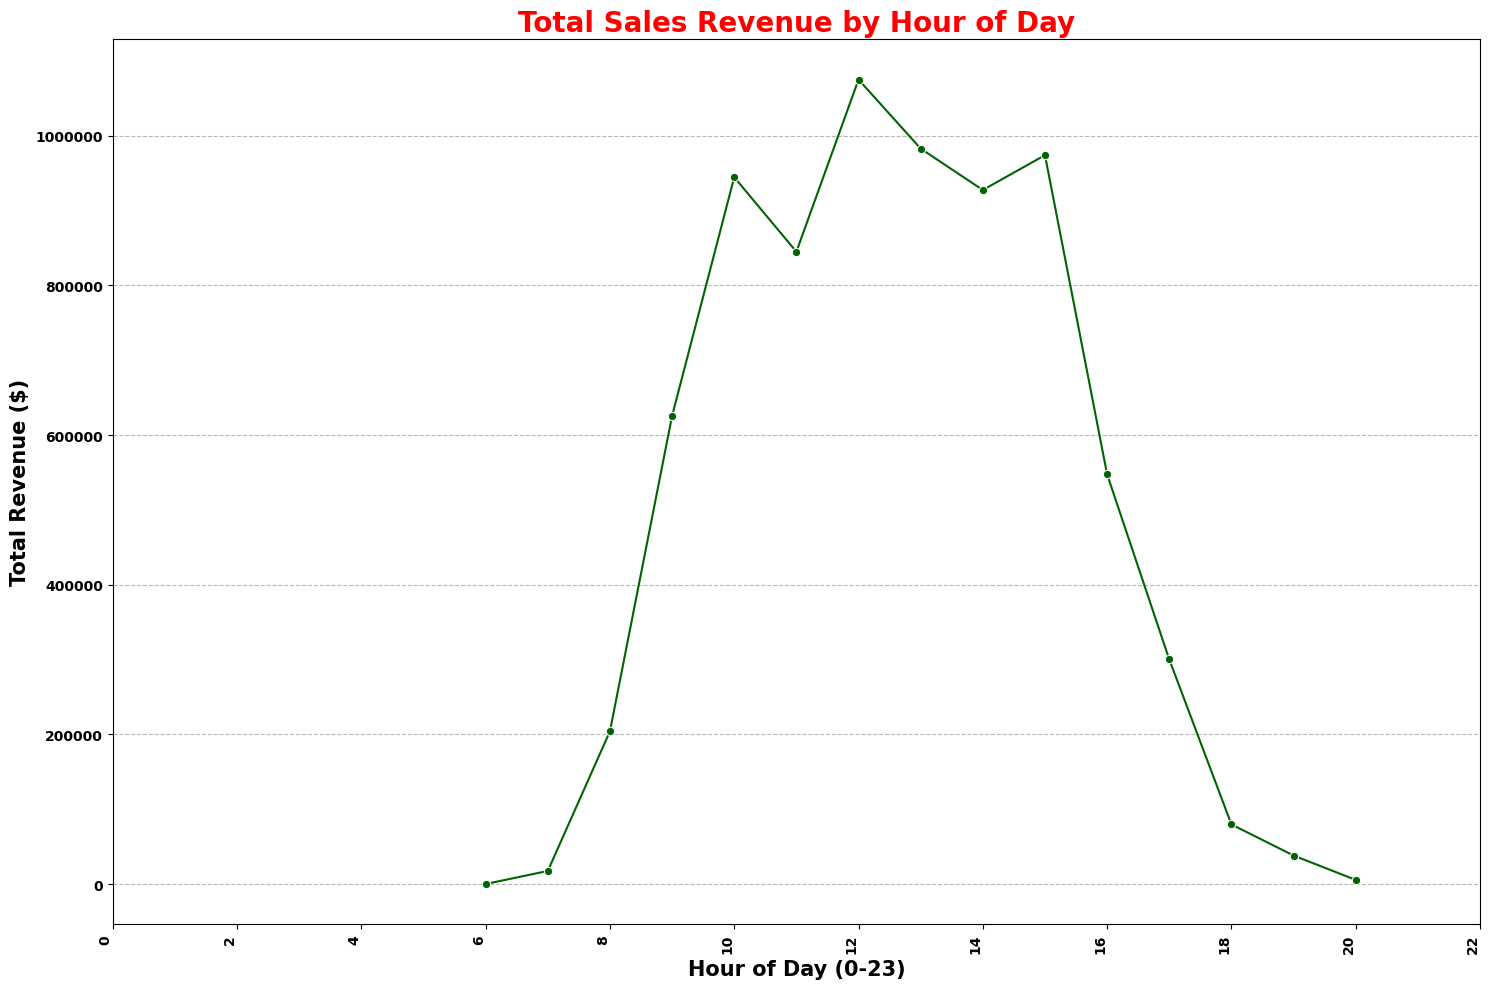

In [ ]:
plt.figure(figsize=(15,10) , dpi = 100),
plt.style.use('default')
# Plot Total Sales by Hour
sns.lineplot(x=sales_by_hour.index, y=sales_by_hour.values, color = 'darkgreen', marker = 'o')
plt.title('Total Sales Revenue by Hour of Day',weight = 'bold' ,c = 'red' ,  fontsize = 20 )
plt.xlabel('Hour of Day (0-23)',weight = 'bold', c = 'k' , fontsize = 15)
plt.ylabel('Total Revenue ($)',weight = 'bold', c = 'k',fontsize = 15)
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.xticks(
    range(0,24,2),
    rotation = 90 , ha = 'right' , weight = 'bold'
)
plt.yticks(weight = 'bold')
plt.ticklabel_format(style = 'plain' , axis = 'y')
plt.tight_layout()
plt.show()

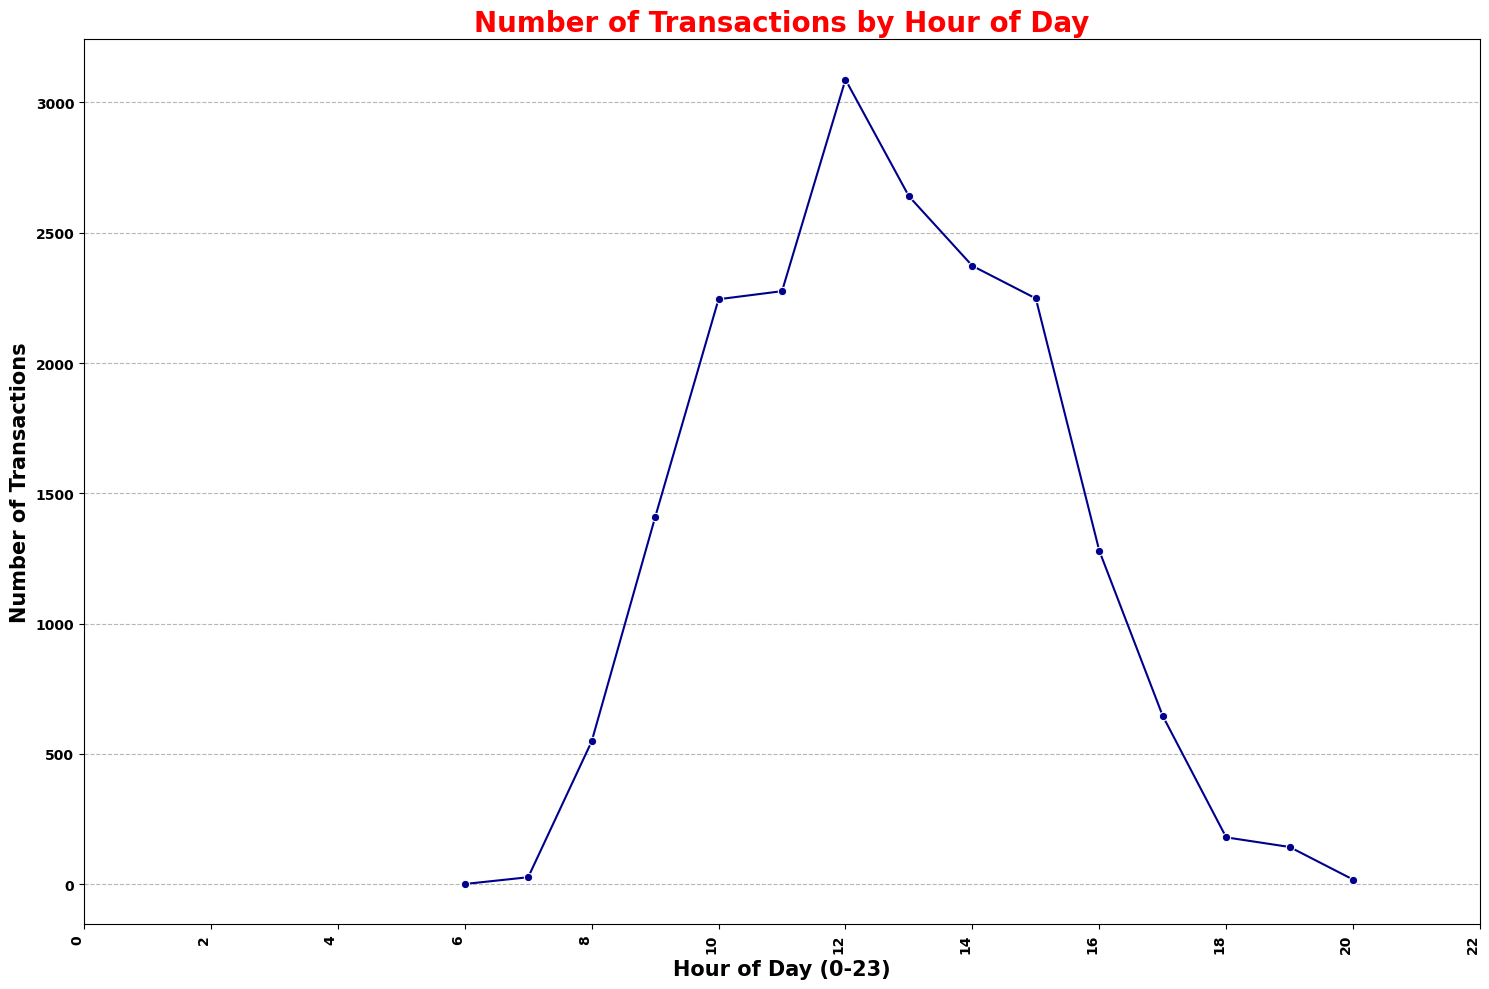

In [ ]:
plt.figure(figsize=(15,10) , dpi = 100),
plt.style.use('default')
# Plot Total Sales by Hour
sns.lineplot(x=transactions_by_hour.index, y=transactions_by_hour.values, color = 'darkblue', marker = 'o')
plt.title('Number of Transactions by Hour of Day',weight = 'bold' ,c = 'red' ,  fontsize = 20 )
plt.xlabel('Hour of Day (0-23)',weight = 'bold', c = 'k' , fontsize = 15)
plt.ylabel('Number of Transactions',weight = 'bold', c = 'k',fontsize = 15)
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.xticks(
    range(0,24,2),
    rotation = 90 , ha = 'right' , weight = 'bold'
)
plt.yticks(weight = 'bold')
plt.ticklabel_format(style = 'plain' , axis = 'y')
plt.tight_layout()
plt.show()

**Results**
1. Total Sales Revenue by Hour of Day:
 - Sales activity begins to pick up around 6 AM and increases rapidly.
 - The peak hour for revenue is 12 PM, generating 1,075,170.56.
 - Other top revenue hours include 1 PM (982,867.51), 3 PM (974,149.01), 10 AM (944,658.50) and 2 PM (927,528.19).
 - Revenue remains strong from 10 AM to 4 PM, after which it experiences a steep decline.
 - Sales become minimal after 8 PM, and there is virtually no activity between midnight and 6 AM.
2. Number of Transactions by Hour of Day:
- Transaction volume follows a very similar pattern to revenue.
- The peak hour for transactions is also 12 PM, with 3,088 unique transactions.
- Other top transaction hours include 1 PM, 2 PM, 11 AM, and 3 PM.
- Transaction volume also remains high from approximately 10 AM to 4 PM, then declines sharply.

**Insights**
1. The period from 10 AM to 4 PM (Hours 10-16), particularly around 12 PM to 3 PM (Hours 12-15), represents the absolute peak in both total sales revenue and the number of transactions. 12 PM is the undisputed highest point for both metrics. This midday window is the "golden hour" for business. Strategic efforts, including staff scheduling, inventory availability, and real-time promotions, should be heavily concentrated during these hours to maximize conversion and revenue capture.
2. The strong alignment between peak revenue hours and peak transaction hours indicates that during the busiest times, customers are not only more numerous but also engaging in high-value transactions. This suggests a relatively consistent average order value during these peak hours. Focus on enhancing the customer experience and potentially encouraging upsells or cross-sells during these peak times, as customers are already in a strong buying mode.
3. The business effectively operates between approximately 6 AM and 8 PM, with minimal to no activity outside these hours. Resources (staff, marketing spend) should be allocated within this operational window. Efforts outside these hours would likely yield very low returns.
4. The rapid increase in activity from 8 AM to 10 AM, and the sustained high performance until 4 PM, suggest an optimal window for pre-peak and peak-hour advertising. Advertising campaigns (digital ads, social media posts, email blasts, or even local promotions) should be strategically timed to reach potential customers starting from late mornings (eg. 9-10 AM) to capture their attention just before or during the prime purchasing hours, and potentially extend into the early afternoon to sustain engagement.
5. The significant drop in activity after 4 PM presents a potential challenge. If desired, targeted promotions or unique offerings could be explored for the late afternoon/early evening (e.g. - 4 PM - 6 PM) o try and extend the sales window or encourage purchases from a different customer segment, provided the cost of incentives does not outweigh potential revenue gains.

### **Product Performance**

In [ ]:
sold_together = df_sales_cleaned.groupby('InvoiceNo')['Description'].agg(lambda x: " , ".join(x)).reset_index()
print(sold_together.head(5))

   InvoiceNo                                        Description
0     536365  WHITE HANGING HEART T-LIGHT HOLDER , WHITE MET...
1     536366  HAND WARMER UNION JACK , HAND WARMER RED POLKA...
2     536367  ASSORTED COLOUR BIRD ORNAMENT , POPPY'S PLAYHO...
3     536368  JAM MAKING SET WITH JARS , RED COAT RACK PARIS...
4     536369                           BATH BUILDING BLOCK WORD


In [ ]:
count = Counter()
for row in sold_together['Description']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list , 2)))

for key, value in count.most_common(10):
    print(key , value)


(' KEY FOB ', ' KEY FOB ') 739
(' KEY FOB ', ' BACK DOOR  ') 543
(' KEY FOB ', ' SHED ') 508
(' KEY FOB ', ' FRONT  DOOR  ') 454
(' GREEN REGENCY TEACUP AND SAUCER ', ' ROSES REGENCY TEACUP AND SAUCER  ') 438
('COFFEE', 'SUGAR ') 428
(' SET 3 RETROSPOT TEA', 'COFFEE') 424
(' JUMBO BAG PINK POLKADOT ', ' JUMBO BAG RED RETROSPOT ') 416
(' SET 3 RETROSPOT TEA', 'SUGAR ') 409
(' LUNCH BAG RED RETROSPOT ', ' LUNCH BAG  BLACK SKULL. ') 386


In [ ]:
sold_most = df_sales_cleaned.groupby('Description')[['Quantity']].sum().reset_index()
sold_most = sold_most.sort_values('Quantity' , ascending = False).head(10)
print(sold_most)

                             Description  Quantity
3802  WHITE HANGING HEART T-LIGHT HOLDER     23231
223        ASSORTED COLOUR BIRD ORNAMENT     21330
2313     PACK OF 72 RETROSPOT CAKE CASES     18947
3891   WORLD WAR 2 GLIDERS ASSTD DESIGNS     17511
1797             JUMBO BAG RED RETROSPOT     17368
2387                       PARTY BUNTING     14005
2710                  RABBIT NIGHT LIGHT     13597
1983             LUNCH BAG RED RETROSPOT     13422
3637     VICTORIAN GLASS HANGING T-LIGHT     12068
200         ANTIQUE SILVER T-LIGHT GLASS     11982


<ipython-input-430-981c574c7664>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='Description', x='Quantity', data = sold_most.head(5), palette = Palette)
<ipython-input-430-981c574c7664>:5: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax = sns.barplot(y='Description', x='Quantity', data = sold_most.head(5), palette = Palette)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(0, 1, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(0, 2, 'PACK OF 72 RETROSPOT CAKE CASES'),
  Text(0, 3, 'WORLD WAR 2 GLIDERS ASSTD DESIGNS'),
  Text(0, 4, 'JUMBO BAG RED RETROSPOT')])

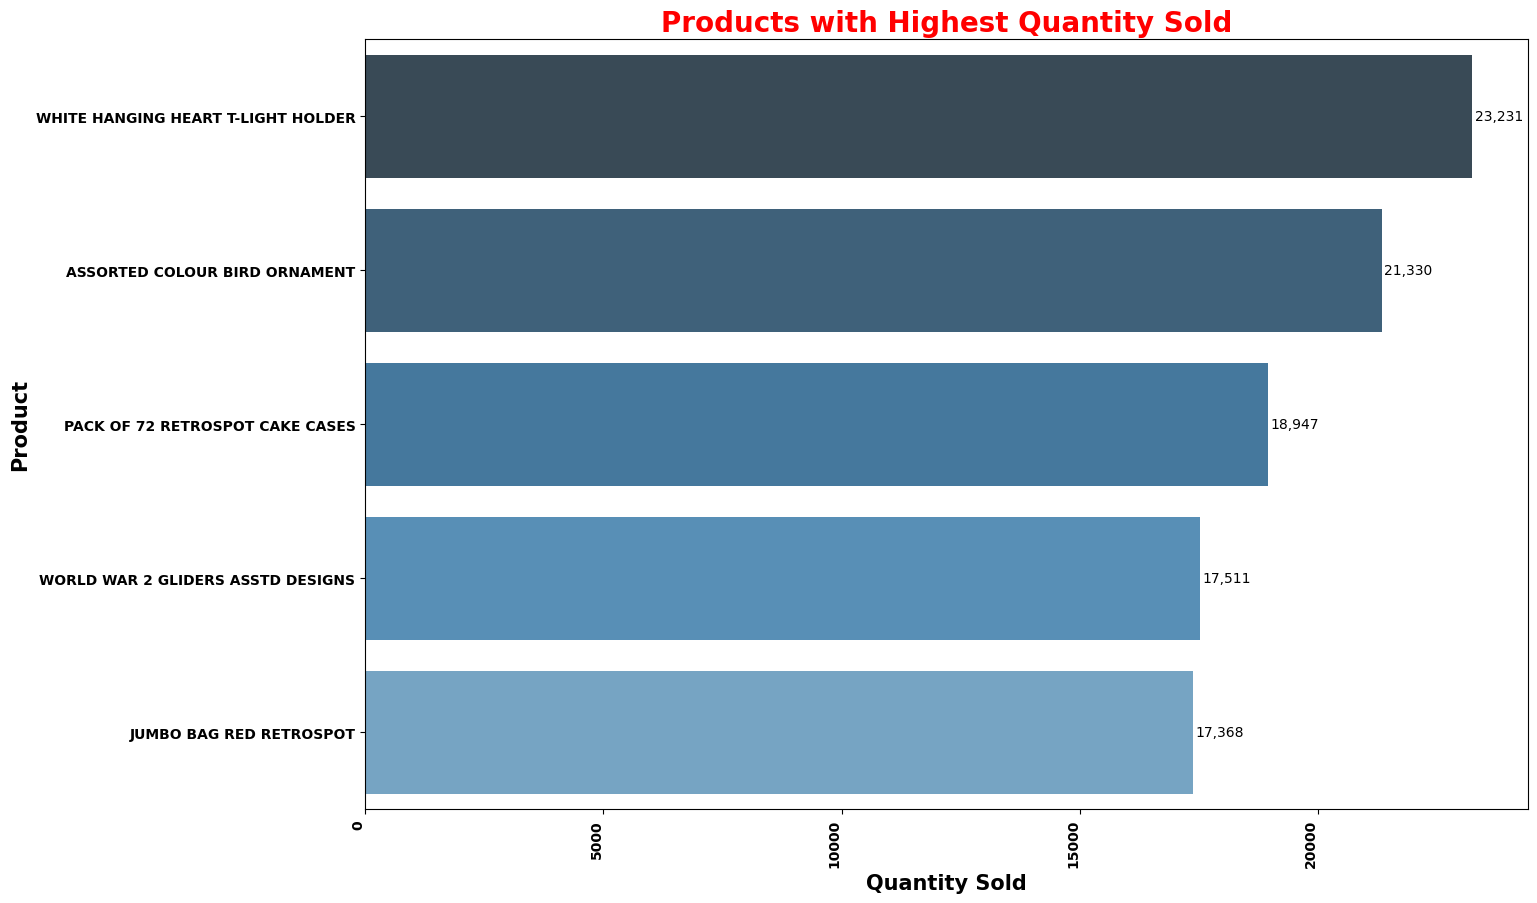

In [ ]:
Palette = sns.color_palette('Blues_d')
Palette.reverse()
plt.figure(figsize=(15,10) , dpi = 100),
plt.style.use('default')
ax = sns.barplot(y='Description', x='Quantity', data = sold_most.head(5), palette = Palette)
for bar in ax.patches:
    bar_width = bar.get_width()
    bar_y = bar.get_y() + bar.get_height() / 2
    ax.text(bar_width + 50, bar_y, f'{int(bar_width):,}',  ha='left', va='center', color='black', fontsize=10)
plt.title('Products with Highest Quantity Sold' , weight = 'bold', c = 'red' , fontsize = 20)
plt.ylabel('Product' , weight = 'bold', c = 'k', fontsize = 15)
plt.xlabel('Quantity Sold' , weight = 'bold' , c = 'k', fontsize = 15)
plt.xticks(rotation = 90, ha = 'right' , weight = 'bold')
plt.yticks(weight = 'bold')

**Insights**
1. The "WHITE HANGING HEART T-LIGHT HOLDER" and "ASSORTED COLOUR BIRD ORNAMENT" are exceptionally popular, significantly outpacing other products by quantity. This suggests a strong demand for affordable home decor, gift, or novelty items. The top sellers also include party supplies and various types of bags. These top-performing products should be consistently well-stocked, prominently featured in marketing, and considered for cross-promotion. The success of these items indicates a core customer base interested in decorative, whimsical, or practical small goods.
2. The "KEY FOB" items not only sell well amongst themselves but also frequently appear alongside "BACK DOOR", "SHED", and "FRONT DOOR" related products. This indicates a very strong natural bundling behaviour. This is a clear opportunity for strategic product bundling and in-store merchandising. For example, displaying various key fobs near door-related hardware or offering bundle discounts for "key fob + door sign" type purchases could significantly boost sales for both categories.
3. The pairing of "TEACUP AND SAUCER" sets, "COFFEE" with "SUGAR," and "RETROSPOT TEA" sets with "COFFEE" or "SUGAR" highlight natural complementary purchases. Similarly, different variants of "JUMBO BAGS" and "LUNCH BAGS" are often bought together. Implement "Customers also bought..." recommendations online, create physical product displays that group these items together, and train sales staff to suggest these pairings. Offering combo deals (e.g., "Buy a Tea Set, get Sugar at 10% off") can increase Average Order Value (AOV).
4. Products with "RETROSPOT" in their name (Cake Cases, Red Jumbo Bag, Red Lunch Bag) and "WORLD WAR 2 GLIDERS" are among the top sellers. This suggests a demographic with an affinity for nostalgic, vintage, or unique themed items. Leverage this aesthetic in marketing campaigns and consider expanding product lines to include more items with a similar "retro" or "quirky" appeal.

# **Marketing Effectiveness**

## **Customer Acquisition**

In [ ]:
#Ensuring the dtype of InvoiceDate is datetime
df_sales_cleaned['InvoiceDate'] = pd.to_datetime(df_sales_cleaned['InvoiceDate'])

In [ ]:
#Finding the first purchase date for each customer
first_purchase_date = df_sales_cleaned.groupby("CustomerID")['InvoiceDate'].min()

In [ ]:
#Creating a new DataFrame with CustomerID and their first purchase date
customer_acquisition = pd.DataFrame({'CustomerID': first_purchase_date.index , 'FirstPurchaseDate' : first_purchase_date.values})
print(customer_acquisition.head(10))


  CustomerID   FirstPurchaseDate
0      12347 2010-12-07 14:57:00
1      12348 2010-12-16 19:09:00
2      12349 2011-11-21 09:51:00
3      12350 2011-02-02 16:01:00
4      12352 2011-02-16 12:33:00
5      12353 2011-05-19 17:47:00
6      12354 2011-04-21 13:11:00
7      12355 2010-12-20 11:02:00
8      12356 2011-01-18 09:50:00
9      12357 2011-11-06 16:07:00


In [ ]:
print('Number of Customers:' , len(customer_acquisition))

Number of Customers: 5606


In [ ]:
customer_acquisition.nunique()

,0
CustomerID,5606
FirstPurchaseDate,5377


In [ ]:
customer_acquisition.to_csv("c_a.csv" , index = False, encoding = 'utf-8')

In [ ]:
#Extracting the year and month of the first purchase
customer_acquisition['AcquisitionMonth'] = customer_acquisition['FirstPurchaseDate'].dt.to_period('M')
#Count the number of new customers acquired each month
monthly_acquisition = customer_acquisition.groupby('AcquisitionMonth')['CustomerID'].nunique()

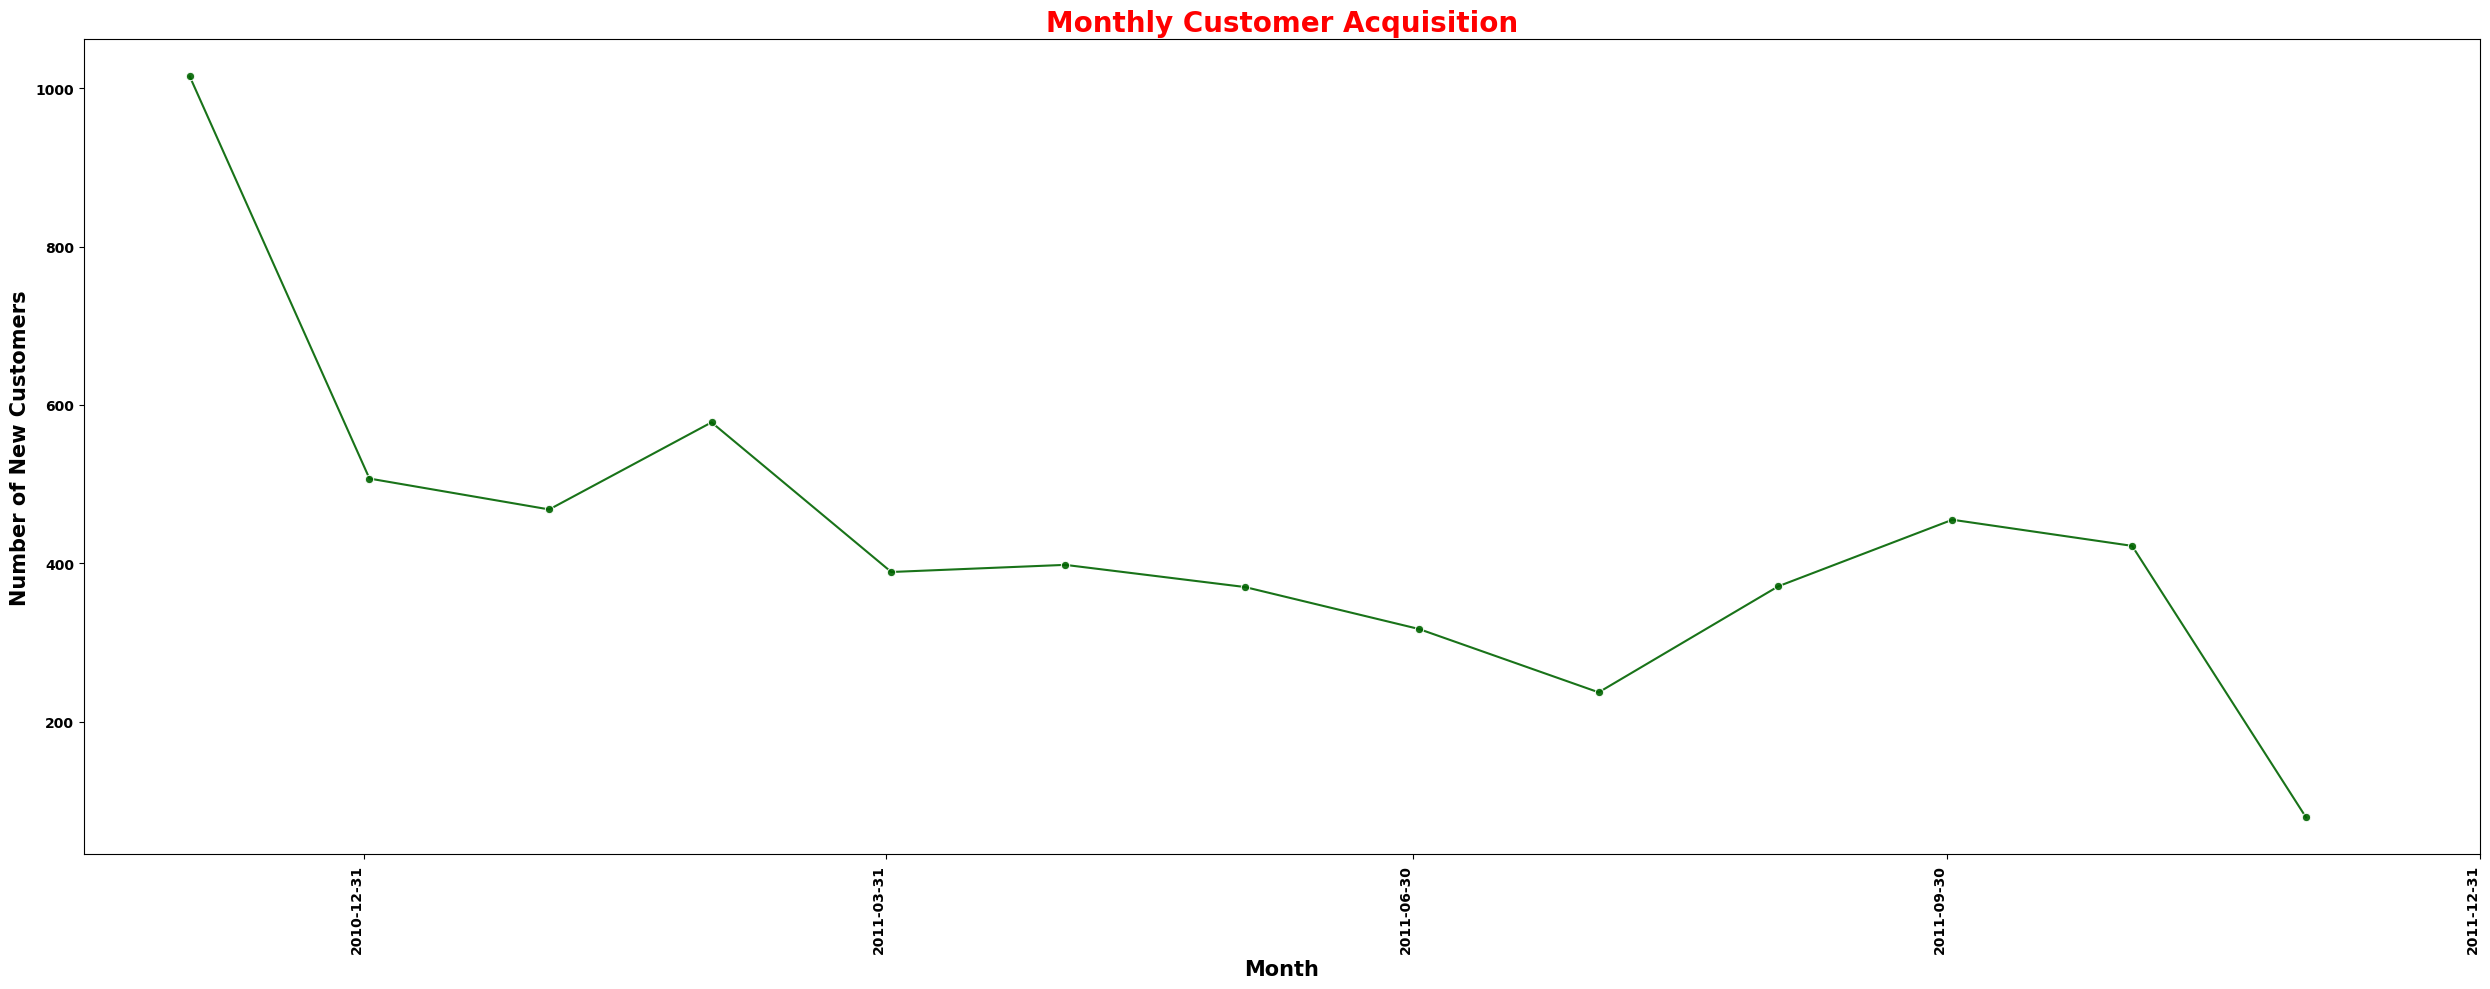

In [ ]:
#Plotting the monthly acquisition
plt.figure(figsize=(25,10) , dpi = 100)
plt.style.use('default')
sns.lineplot(x=monthly_acquisition.index.to_timestamp(), y=monthly_acquisition.values, alpha = 0.9 , marker = 'o' , color = 'darkgreen')
plt.title('Monthly Customer Acquisition' , weight = 'bold', c = 'red' , fontsize = 20)
plt.xlabel('Month' , weight = 'bold', c = 'k', fontsize = 15)
plt.ylabel('Number of New Customers' , weight = 'bold' , c = 'k', fontsize = 15)
plt.xticks(quarterly_sales.index , rotation = 90 , ha = 'right' , weight = 'bold')
plt.yticks(weight = 'bold')
plt.grid(False)
plt.tight_layout()
plt.savefig('Monthly Customer Acquisition' , dpi = 200)

In [ ]:
#Quarterly Acquisition
customer_acquisition['AcquisitionQuarter'] = customer_acquisition['FirstPurchaseDate'].dt.to_period('Q')
#Count the number of new customers acquired each month
quarterly_acquisition = customer_acquisition.groupby('AcquisitionQuarter')['CustomerID'].nunique()

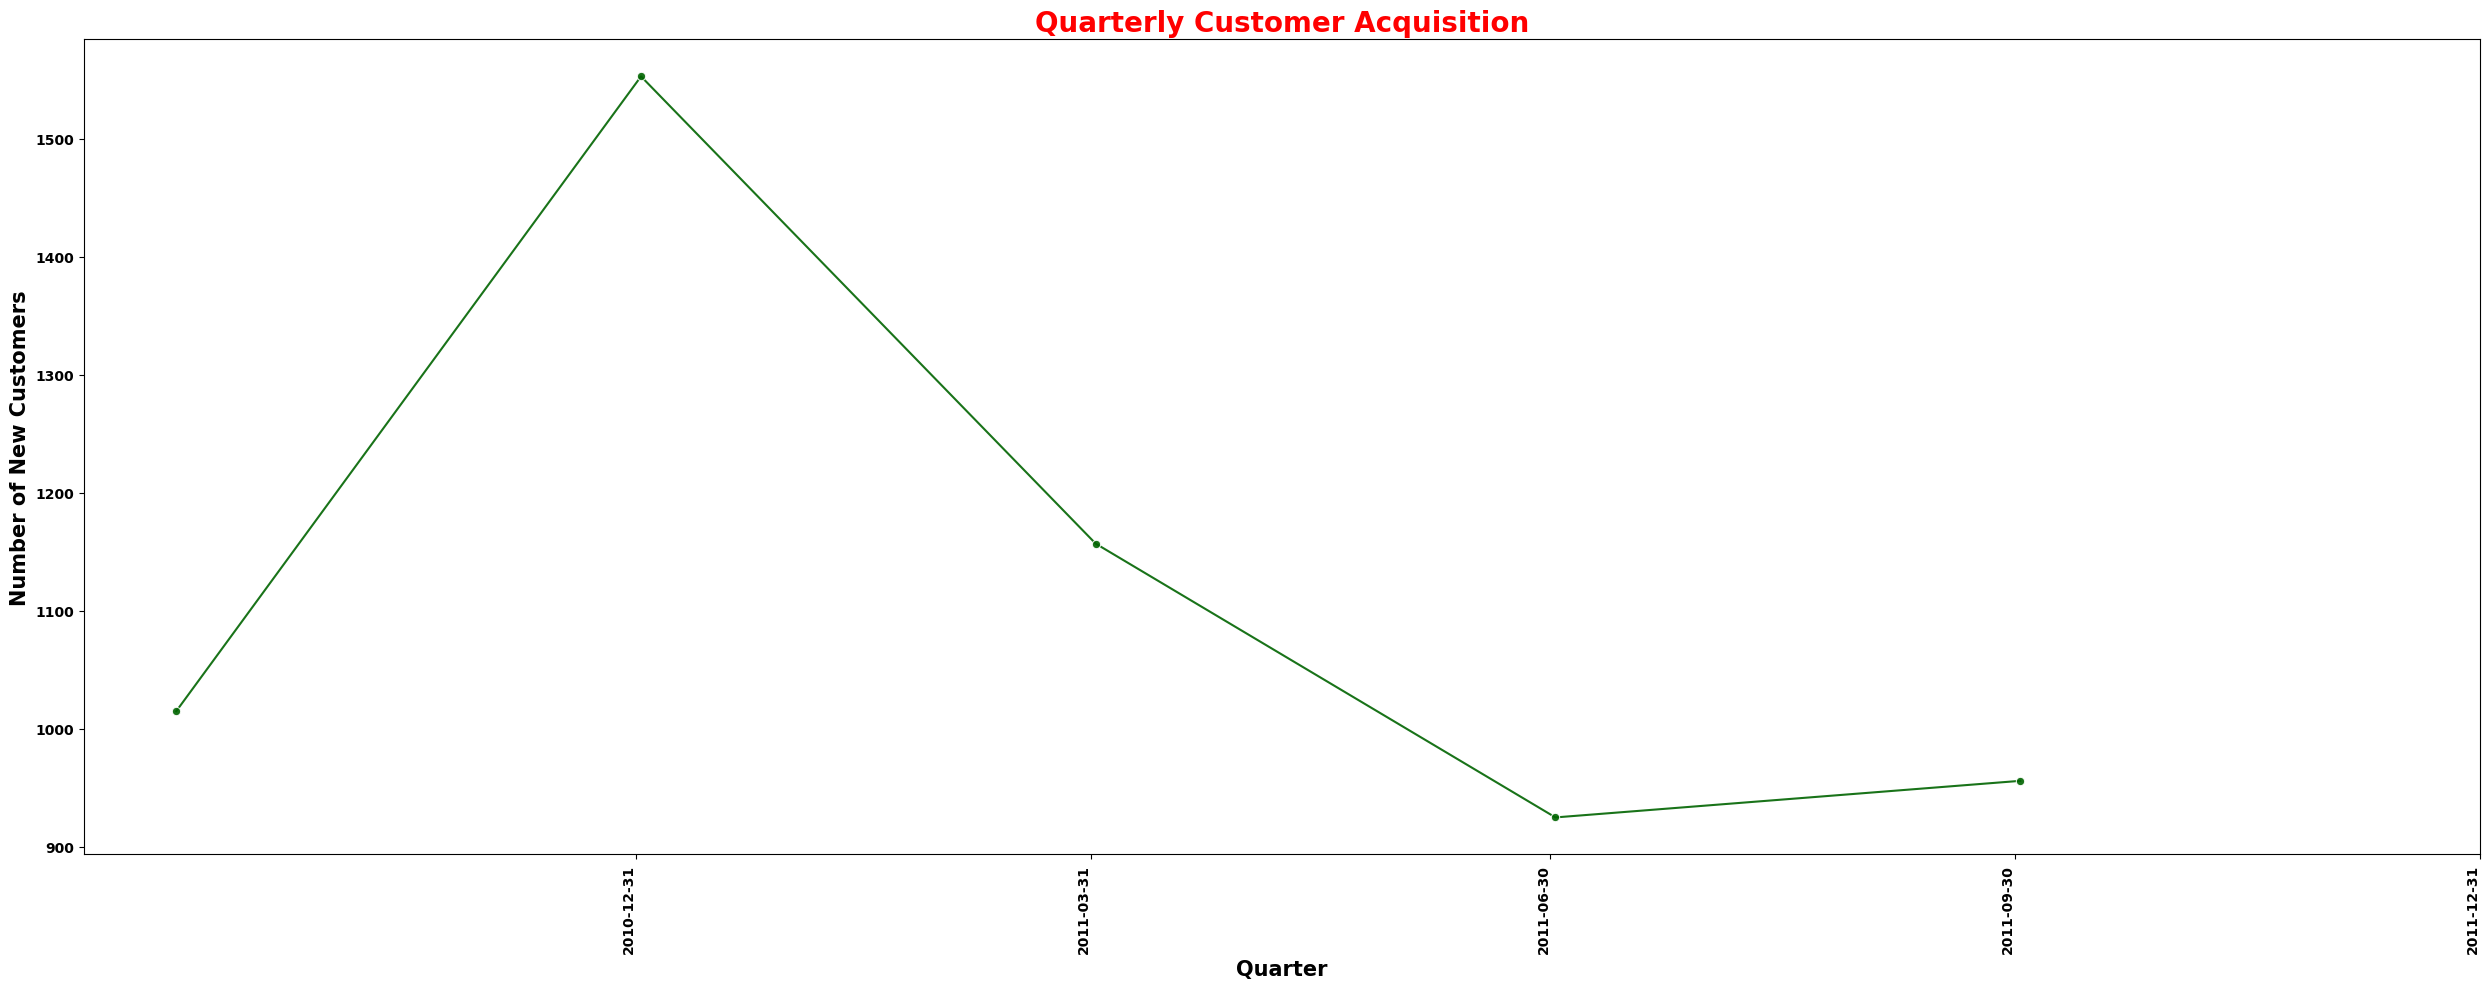

In [ ]:
#Plotting the quarterly acquisition
plt.figure(figsize=(25,10) , dpi = 100)
plt.style.use('default')
sns.lineplot(x=quarterly_acquisition.index.to_timestamp(), y=quarterly_acquisition.values, alpha = 0.9 , marker = 'o' , color = 'darkgreen')
plt.title('Quarterly Customer Acquisition' , weight = 'bold', c = 'red' , fontsize = 20)
plt.xlabel('Quarter' , weight = 'bold', c = 'k', fontsize = 15)
plt.ylabel('Number of New Customers' , weight = 'bold' , c = 'k', fontsize = 15)
plt.xticks(quarterly_sales.index , rotation = 90 , ha = 'right' , weight = 'bold')
plt.yticks(weight = 'bold')
plt.grid(False)
plt.tight_layout()
plt.savefig("Quarterly Customer Acquisition" , dpi = 200)

In [ ]:
customer_country = df_sales_cleaned.groupby('CustomerID')['Country'].first().reset_index()

In [ ]:
#Merging with the customer_acquisition dataframe
customer_acquisition = pd.merge(customer_acquisition , customer_country , on = 'CustomerID', how = 'left')
print(customer_acquisition.head(10))

  CustomerID   FirstPurchaseDate AcquisitionMonth AcquisitionQuarter  \
0      12347 2010-12-07 14:57:00          2010-12             2010Q4   
1      12348 2010-12-16 19:09:00          2010-12             2010Q4   
2      12349 2011-11-21 09:51:00          2011-11             2011Q4   
3      12350 2011-02-02 16:01:00          2011-02             2011Q1   
4      12352 2011-02-16 12:33:00          2011-02             2011Q1   
5      12353 2011-05-19 17:47:00          2011-05             2011Q2   
6      12354 2011-04-21 13:11:00          2011-04             2011Q2   
7      12355 2010-12-20 11:02:00          2010-12             2010Q4   
8      12356 2011-01-18 09:50:00          2011-01             2011Q1   
9      12357 2011-11-06 16:07:00          2011-11             2011Q4   

       Country  
0      ICELAND  
1      FINLAND  
2        ITALY  
3       NORWAY  
4       NORWAY  
5      BAHRAIN  
6        SPAIN  
7      BAHRAIN  
8     PORTUGAL  
9  SWITZERLAND  


In [ ]:
#Counting the number of new customers acquired from each country
acquisition_by_country = customer_acquisition.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
print("\nCustomer Acquisition by Country:\n" , acquisition_by_country)


Customer Acquisition by Country:
 Country
UNITED KINGDOM          5180
GERMANY                   94
FRANCE                    87
SPAIN                     28
BELGIUM                   24
SWITZERLAND               20
PORTUGAL                  19
ITALY                     14
FINLAND                   12
NORWAY                    10
EUROPEAN REGION            9
AUSTRIA                    9
AUSTRALIA                  9
OTHERS                     9
DENMARK                    8
NETHERLANDS                8
SWEDEN                     8
JAPAN                      7
CYPRUS                     7
HONG KONG                  7
POLAND                     6
GREECE                     4
USA                        4
CANADA                     3
ISRAEL                     3
IRELAND                    3
BAHRAIN                    2
UNITED ARAB EMIRATES       2
MALTA                      2
BRAZIL                     1
LEBANON                    1
CZECH REPUBLIC             1
ICELAND                    1


In [ ]:
#Plotting the top 10 countries
top_n = 10
top_acquisition_countries = acquisition_by_country.head(top_n)

<ipython-input-445-9174dcd2cc3b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=top_acquisition_countries.index, y=top_acquisition_countries.values, palette = 'viridis')


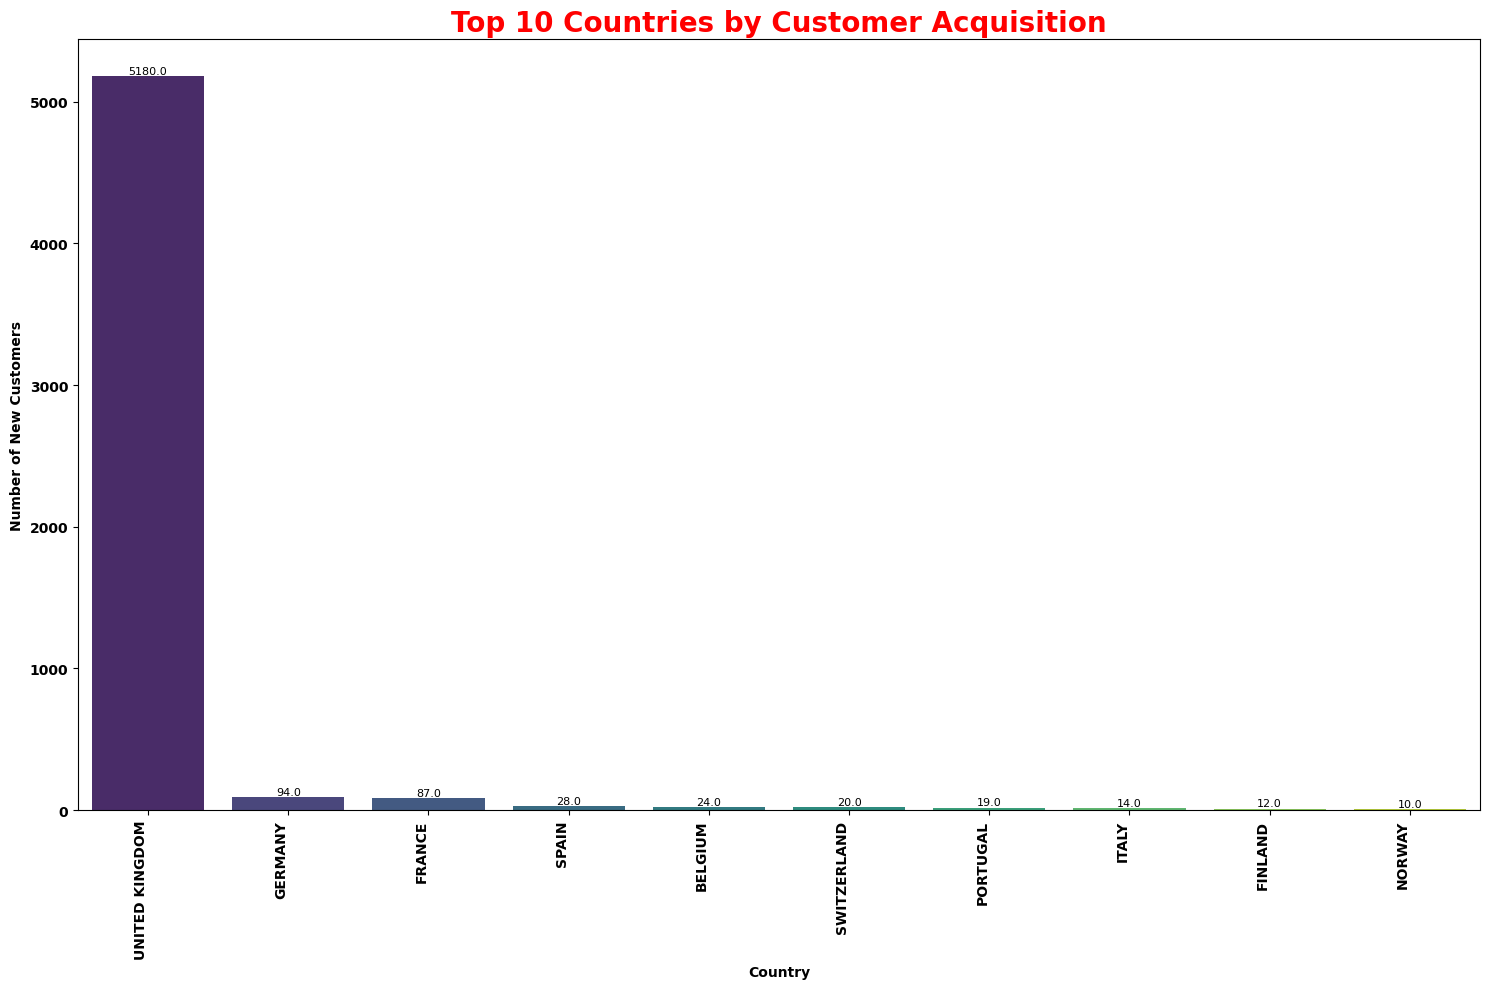

In [ ]:
plt.figure(figsize=(15,10) , dpi = 100),
plt.style.use('default')
bars = sns.barplot(x=top_acquisition_countries.index, y=top_acquisition_countries.values, palette = 'viridis')
plt.title(f'Top {top_n} Countries by Customer Acquisition' ,weight = 'bold' ,c = 'red' ,  fontsize = 20)
plt.xlabel('Country' , weight = 'bold', c = 'k')
plt.ylabel('Number of New Customers' , weight = 'bold' , c = 'k')
plt.xticks(rotation = 90 , ha = 'right' , weight = 'bold')
plt.yticks(weight = 'bold')
for bar in bars.patches:
        bars.annotate('{:.1f}' . format(bar.get_height()),(bar.get_x()+0.4 , bar.get_height()+0.5),
                     ha = 'center' , va= 'bottom',
                    color = 'black' , size = 8, rotation = 0)
plt.tight_layout()
plt.show()

In [ ]:
#Plotting the Bottom 10 countries
bottom_n = 10
bottom_acquisition_countries = acquisition_by_country.tail(bottom_n)

<ipython-input-447-f177eb0283b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars_ = sns.barplot(x=bottom_acquisition_countries.index, y=bottom_acquisition_countries.values, palette = 'viridis')


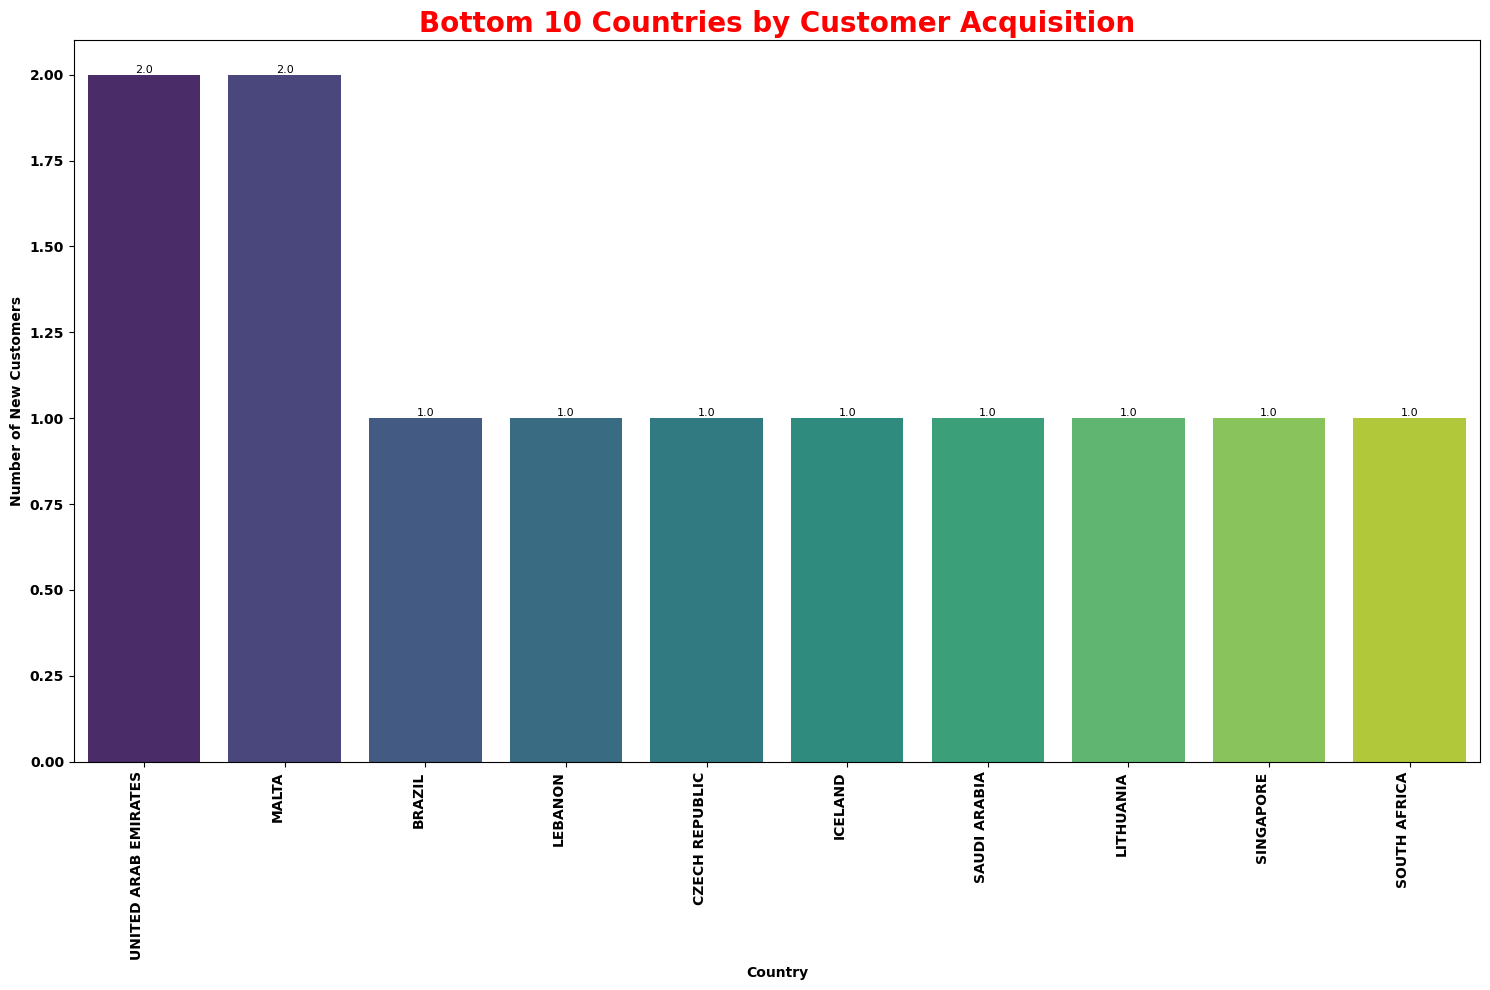

In [ ]:
plt.figure(figsize=(15,10) , dpi = 100),
plt.style.use('default')
bars_ = sns.barplot(x=bottom_acquisition_countries.index, y=bottom_acquisition_countries.values, palette = 'viridis')
plt.title(f'Bottom {bottom_n} Countries by Customer Acquisition' ,weight = 'bold' ,c = 'red' ,  fontsize = 20)
plt.xlabel('Country' , weight = 'bold', c = 'k')
plt.ylabel('Number of New Customers' , weight = 'bold' , c = 'k')
plt.xticks(rotation = 90 , ha = 'right' , weight = 'bold')
plt.yticks(weight = 'bold')
for bar in bars_.patches:
        bars_.annotate('{:.1f}' . format(bar.get_height()),(bar.get_x()+0.4 , bar.get_height()),
                     ha = 'center' , va= 'bottom',
                    color = 'black' , size = 8, rotation = 0)
plt.tight_layout()
plt.show()

In [ ]:
#Merging the acquisition month with the original sales data to link acquisition with revenue
df_merged = pd.merge(df_sales_cleaned , customer_acquisition[['CustomerID', 'AcquisitionMonth']], on = 'CustomerID', how = 'left')
print(df_merged.head(10))

  InvoiceNo                          Description  Quantity  \
0    536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365                  WHITE METAL LANTERN         6   
2    536365       CREAM CUPID HEARTS COAT HANGER         8   
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365         SET 7 BABUSHKA NESTING BOXES         2   
6    536365    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366               HAND WARMER UNION JACK         6   
8    536366            HAND WARMER RED POLKA DOT         6   
9    536367        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  ...  Year TotalTransactionValue DayOfWeek  \
0 2010-12-01 08:26:00  ...  2010                 15.30         2   
1 2010-12-01 08:26:00  ...  2010                 20.34         2   
2 2010-12-01 08:26:00  ...  2010                 22.00         2   
3 2010-12-01 08:26:00  ...  2010             

In [ ]:
#Calculating revenue by acquisition cohort and order month
df_cohort_revenue = df_merged.groupby(['AcquisitionMonth', df_merged['InvoiceDate'].dt.to_period('M')])['TotalTransactionValue'].sum().unstack()
print(df_cohort_revenue)

InvoiceDate         2010-12   2011-01    2011-02    2011-03  ...     2011-09  \
AcquisitionMonth                                             ...               
2010-12           598898.38  183957.8  162558.24  186354.46  ...  260908.180   
2011-01                 NaN  269586.5   36847.75   44908.82  ...   61712.430   
2011-02                 NaN       NaN  197808.75   24854.30  ...   53628.010   
2011-03                 NaN       NaN        NaN  267040.71  ...   57364.790   
2011-04                 NaN       NaN        NaN        NaN  ...   28714.660   
2011-05                 NaN       NaN        NaN        NaN  ...   27516.880   
2011-06                 NaN       NaN        NaN        NaN  ...   27512.010   
2011-07                 NaN       NaN        NaN        NaN  ...   18255.500   
2011-08                 NaN       NaN        NaN        NaN  ...   16622.150   
2011-09                 NaN       NaN        NaN        NaN  ...  215329.061   
2011-10                 NaN       NaN   

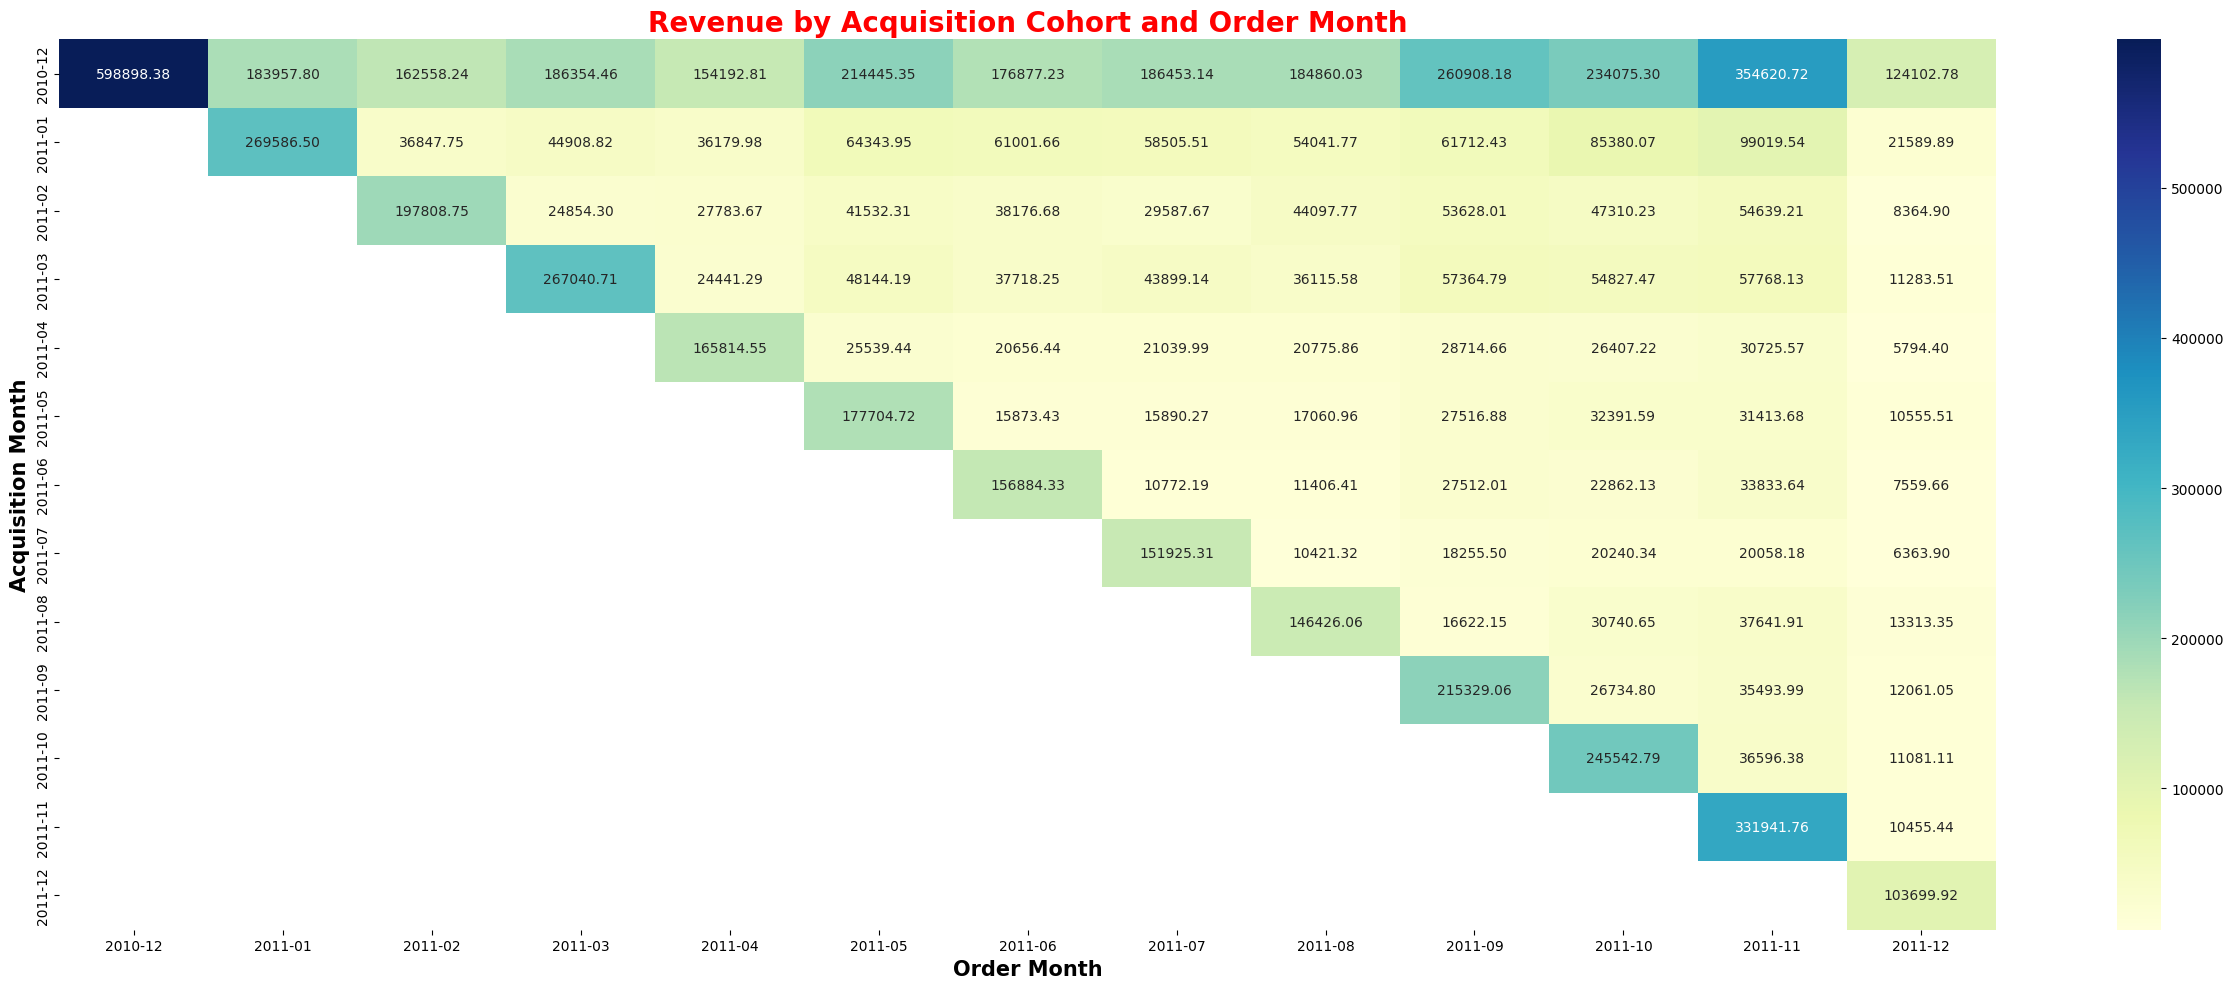

In [ ]:
#Plotting this on heatmap
plt.figure(figsize=(25,10) , dpi = 100)
plt.style.use('default')
sns.heatmap(df_cohort_revenue, annot = True , cmap= "YlGnBu", fmt = '.2f')
plt.title('Revenue by Acquisition Cohort and Order Month' ,weight = 'bold' ,c = 'red' ,  fontsize = 20)
plt.xlabel('Order Month' , weight = 'bold', c = 'k', fontsize = 15)
plt.ylabel('Acquisition Month' , weight = 'bold' , c = 'k', fontsize = 15)
plt.tight_layout()
plt.savefig("Revenue by Acquisition Cohort and Order Month" , dpi = 200)

**Results**
1. Total Customers Acquired:
- A total of 5,606 unique customers were
  acquired during the observed period.
2. Monthly Customer Acquisition:
 - Customer acquisition started strong  
   in December 2010 with over 1000 new customers.
 - There was a notable dip in January
   2011, followed by a slight recovery in February 2011.
 - A peak in monthly acquisition  
   occurred around March 2011, nearing 600 new customers.
 - The trend generally showed a decline
   after March 2011, with a low point around June 2011 (approximately 250 new customers).
 - There was a moderate recovery in
   September and October 2011, reaching over 400 new customers.
 - A significant drop in acquisition is
   observed again in December 2011, falling to below 100 new customers.
3. Quarterly Customer Acquisition:
 - Q4 2010 (December only): Started
   strong with over 1500 new customers.
 - Q1 2011 (Dec 2010 - Feb 2011):
   Experienced a significant peak in acquisition, reaching over 1500 new customers by the end of December 2010 (this seems to be a cumulative or a peak in Q4 2010). The graph point for the end of February 2011 (Q1 2011) is around 1100 new customers.
 - Q2 2011 (March - May 2011): Saw a
   notable decline in quarterly acquisition, dropping to around 900 new customers by the end of June 2011.
 - Q3 2011 (July - Sept 2011): Showed a  slight recovery, ending around 950 new customers by the end of September 2011.
 - Q4 2011 (Oct - Dec 2011): Not
   explicitly shown with a point on the graph, but implied to continue the trend or experience a further drop given the monthly December numbers. Note: The labels on the X-axis for the Quarterly graph seem to refer to the end month of the quarter, not necessarily Q1, Q2, Q3, Q4 markers in a standard way, but the trend is clear.
4. Customer Acquisition by Country:
 - The UNITED KINGDOM dominates customer
   acquisition with 5,180 new customers, which is vastly more than any other country.
 - Germany (94) and France (87) are the
   next highest, but their numbers are significantly lower than the UK.
 - Other European countries follow with
   much smaller numbers (e.g., Spain 28, Belgium 24, Switzerland 20, Portugal 19, Italy 14, Finland 12, Norway 10).
 - Many countries, particularly in the
   "Bottom 10," acquired only 1 or 2 new customers (e.g., Brazil, Lebanon, Iceland, Saudi Arabia, Singapore, South Africa, United Arab Emirates, Malta).
5. Revenue by Acquisition Cohort and Order Month:
 - This heatmap shows the revenue
   generated by customers based on their acquisition month and subsequent order months.
 - The highest revenue from initial
   purchases is often in the month of acquisition, particularly for cohorts acquired in months with high sales (e.g., 2010-12, 2011-11).
 - There is a clear pattern of revenue
   decay over time for most cohorts, meaning customers tend to spend less in subsequent months after their acquisition, although some cohorts show sustained or slightly increasing revenue for a few months.
 - The 2010-12 cohort generated          significant revenue (58,868.38) in its acquisition month and continued to generate substantial revenue in subsequent months (38,397.05 in Jan 2011, 180,354.46 in Feb 2011, etc.), demonstrating good initial retention and spend.
 - Newer cohorts (e.g., 2011-10,   2011-11) show high initial revenue in their acquisition month, but their longer-term revenue generation is only partially visible due to the limited data range.






**Insights**
1. The customer acquisition is overwhelmingly concentrated in the United Kingdom, accounting for over 92% of new customers. While the customers from various other countries, their numbers are comparatively tiny. This indicates a highly localized customer base. Future growth strategies could either focus on solidifying the UK market dominance and increasing customer lifetime value there, or developing targeted international expansion plans. For international expansion, prioritize countries with slightly higher acquisition numbers (Germany, France, Spain) or investigate the cost-effectiveness of acquiring customers from low-volume countries.
2. Monthly acquisition shows a high peak in December 2010, followed by significant fluctuations and a general declining trend through mid-2011 before a minor recovery and a sharp drop in December 2011. The quarterly view also highlights a strong acquisition in Q4 2010 but a general slowdown in new customer intake through Q2 and Q3 2011. This contrasts with overall revenue, which grew significantly towards Q4 2011, even if new customer acquisition was somewhat stagnant or declining. The business revenue growth in 2011 seems to be driven more by existing customer purchases or increased purchase frequency/value from a stable or slightly shrinking base of newly acquired customers during certain periods, rather than continuous high new customer acquisition throughout the year. Strategies might need to focus on optimizing existing customer value in months with lower acquisition, and investigating why new customer acquisition wasn't consistently growing alongside revenue.
3. he heatmap clearly illustrates that customers tend to generate the most revenue in their acquisition month or the immediate subsequent months, with a general decay in revenue contribution over time. However, the 2010-12 cohort demonstrated strong sustained revenue generation in the months following acquisition. This highlights the importance of immediate post-acquisition engagement and retention strategies to maximize initial customer value. Learning from the success of the 2010-12 cohort's sustained spending could provide insights into replicating longer-term customer loyalty and value. Focusing efforts on nurturing new customers in their first 1-3 months could be key to improving overall customer lifetime value.
4. While overall sales peak in November, new customer acquisition drops sharply in December 2011. This is significant because the December 2010 acquisition was very high. This suggests a missed opportunity or a shift in consumer behavior during the holiday season. Perhaps marketing efforts are more focused on existing customers, or new customer acquisition becomes more expensive. Investigate if targeted campaigns for new customer acquisition in December could be beneficial, especially considering the strong acquisition in Dec 2010.

## **Customer Retention Analysis**

In [ ]:
#Repeat Purchase Rate
unique_purchases = df_sales_cleaned.groupby(['CustomerID','InvoiceDate'])['InvoiceNo'].nunique()

In [ ]:
#Count the number of unique purchase dates per customer
customer_purchase_dates = unique_purchases.groupby('CustomerID').size()

In [ ]:
#Identify repeat customers
repeat_customers = customer_purchase_dates[customer_purchase_dates > 1]

In [ ]:
#Calculate the repeat purchase rate
repeat_purchase_rate = (len(repeat_customers) / df_sales_cleaned['CustomerID'].nunique()) *100

In [ ]:
print(f"Repeat Purchase Rate: {repeat_purchase_rate:.2f}%")

Repeat Purchase Rate: 49.82%


In [ ]:
#Calculating the Customer Churn Rate
unique_purchases = df_sales_cleaned.groupby(['CustomerID' , 'InvoiceDate'])['InvoiceNo'].nunique().reset_index()

In [ ]:
#Customers active in the first few months
start_period = df_sales_cleaned['InvoiceDate'].min().to_period('M')
early_customers = unique_purchases[unique_purchases['InvoiceDate'].dt.to_period('M').isin([start_period , start_period +1 , start_period+2])]['CustomerID'].unique()

In [ ]:
#Customers active in the last few months
end_period = df_sales_cleaned['InvoiceDate'].max().to_period('M')
late_customers = unique_purchases[unique_purchases['InvoiceDate'].dt.to_period('M').isin([end_period - 2 , end_period - 1 , end_period])]['CustomerID'].unique()

In [ ]:
#Customers active early but not late
churned_customers = set(early_customers) - set(late_customers)

In [ ]:
#Rough churn rate
churn_rate = (len(churned_customers) / len(early_customers)) if len(early_customers) > 0 else 0


In [ ]:
print(f"Churn Rate: {churn_rate:.2f}%")

Churn Rate: 0.51%


In [ ]:
#Customer Retention Rate Over Time (Cohort-Based)
#Merging the acquisition month with the unique purchases
df_merged_retention = pd.merge(unique_purchases , customer_acquisition[['CustomerID', 'AcquisitionMonth']], on = 'CustomerID' , how = 'left')
#Creating a 'OrderMonth' for each transaction
df_merged_retention['OrderMonth'] = df_merged_retention['InvoiceDate'].dt.to_period('M')
#Calculating the number of active customers from each acquisition cohort in each subsequent month
cohort_retention = df_merged_retention.groupby(['AcquisitionMonth' , 'OrderMonth'])['CustomerID'].nunique().unstack()
#Getting the size of each acquisition cohort
cohort_size_retention = cohort_retention.iloc[:, 0]
#Calculating the retention rate
retention_rate = cohort_retention.divide(cohort_size_retention , axis = 0) *100


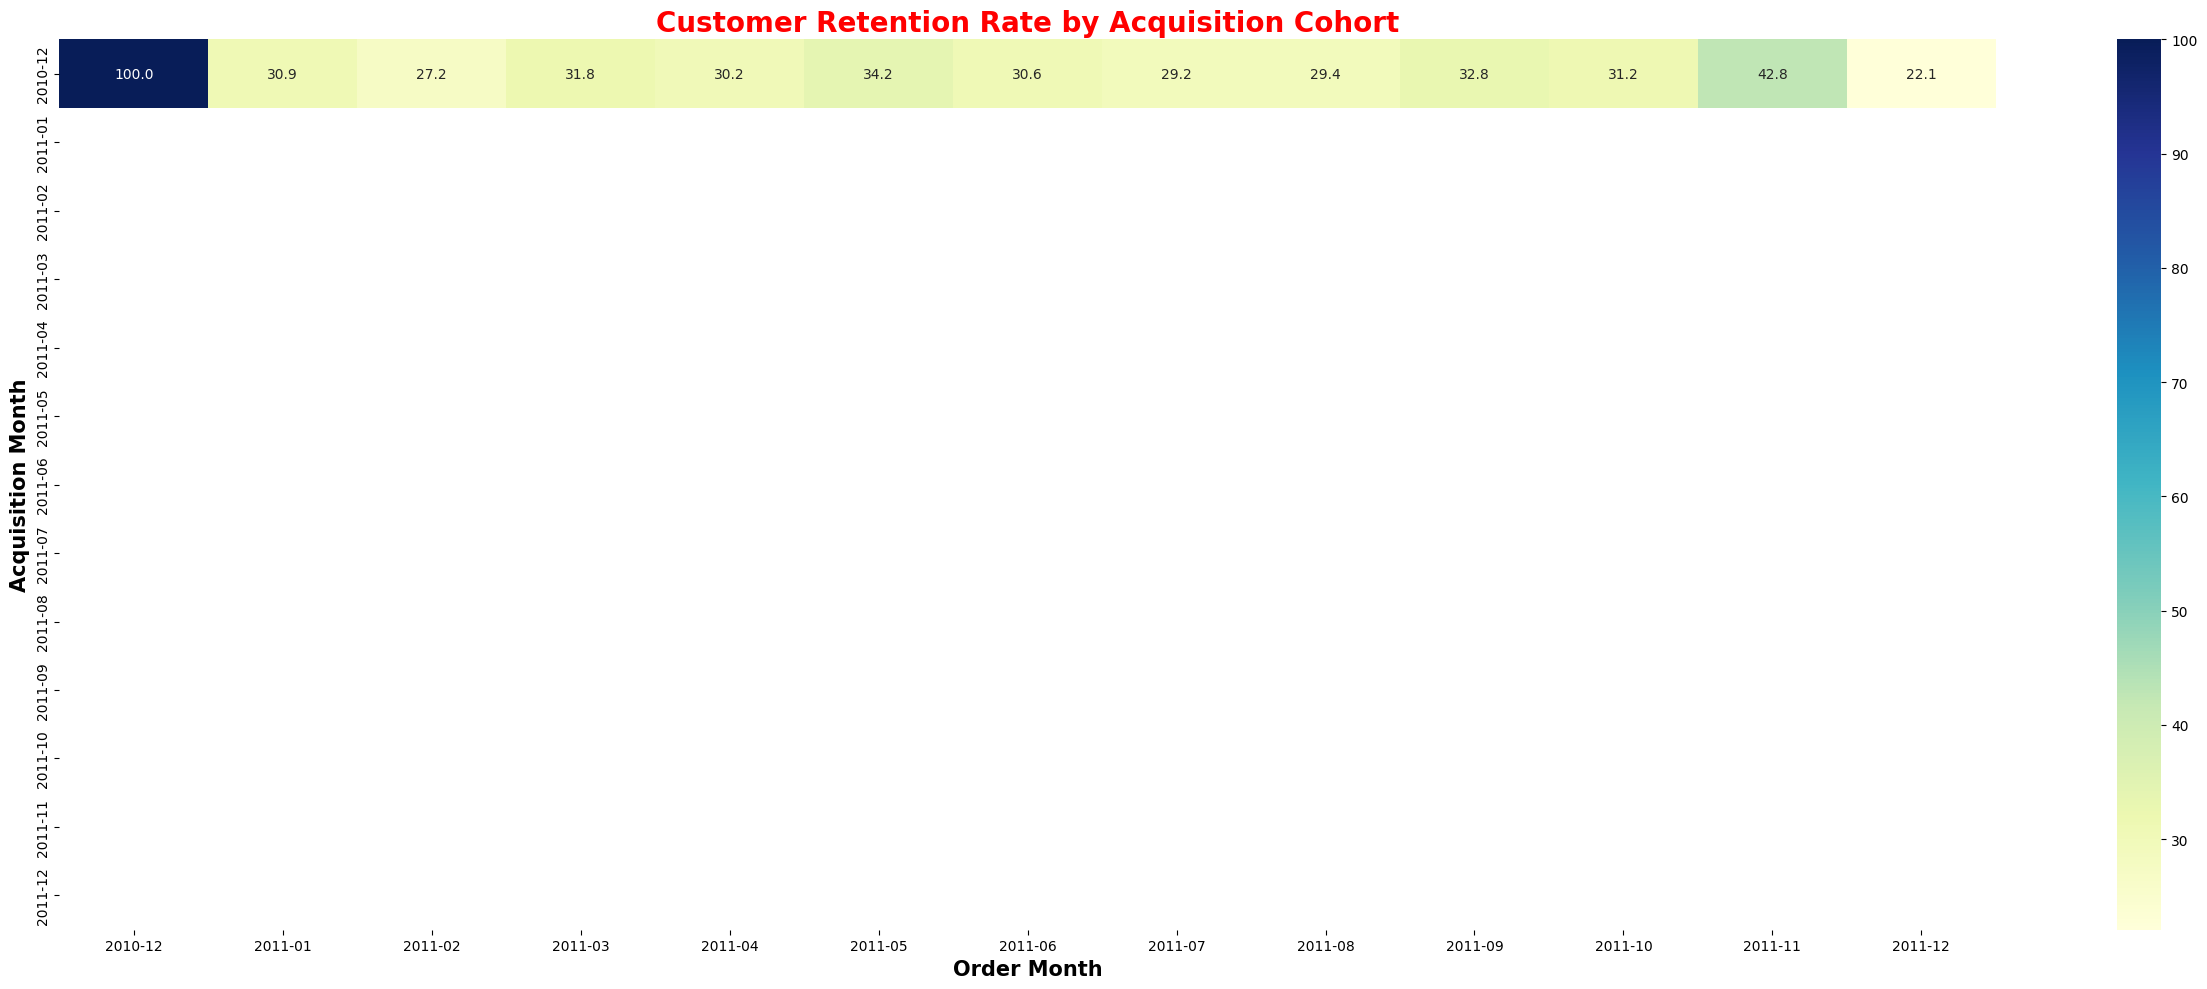

In [ ]:
#Plotting this on heatmap
plt.figure(figsize=(25,10) , dpi = 100)
plt.style.use('default')
sns.heatmap(retention_rate, annot = True , cmap= "YlGnBu", fmt = '.1f')
plt.title('Customer Retention Rate by Acquisition Cohort' ,weight = 'bold' ,c = 'red' ,  fontsize = 20)
plt.xlabel('Order Month' , weight = 'bold', c = 'k', fontsize = 15)
plt.ylabel('Acquisition Month' , weight = 'bold' , c = 'k', fontsize = 15)
plt.tight_layout()
plt.savefig("Customer Retention Rate by Acquisition Cohort" , dpi = 200)

In [ ]:
#Countries the retained customers belonged to
retained_customer_ids = repeat_customers.index.tolist()
print(f"Number of retained customers: {len(retained_customer_ids)}")
retained_customers_country = df_sales_cleaned[df_sales_cleaned['CustomerID'].isin(retained_customer_ids)].groupby('CustomerID')['Country'].first().reset_index()
#Count the number of retained customers per country
retained_customers_by_country = retained_customers_country['Country'].value_counts().sort_values(ascending = False)
print("\nNumber of Retained Customers by Country:\n" , retained_customers_by_country)

Number of retained customers: 2793

Number of Retained Customers by Country:
 Country
UNITED KINGDOM     2528
GERMANY              67
FRANCE               58
SPAIN                18
BELGIUM              18
SWITZERLAND          12
PORTUGAL             11
AUSTRALIA             8
FINLAND               7
EUROPEAN REGION       7
NORWAY                6
DENMARK               6
NETHERLANDS           5
ITALY                 5
AUSTRIA               4
POLAND                4
SWEDEN                4
OTHERS                4
CYPRUS                3
JAPAN                 3
IRELAND               3
ISRAEL                3
BAHRAIN               1
ICELAND               1
SINGAPORE             1
USA                   1
GREECE                1
CZECH REPUBLIC        1
LITHUANIA             1
CANADA                1
MALTA                 1
Name: count, dtype: int64


In [ ]:
#Plotting this on bar graph
top_n_ = 10
top_retained_countries = retained_customers_by_country.head(top_n_)

<ipython-input-466-cbe3210c7590>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barss = sns.barplot(x=top_retained_countries.index, y=top_retained_countries.values, palette = 'viridis')


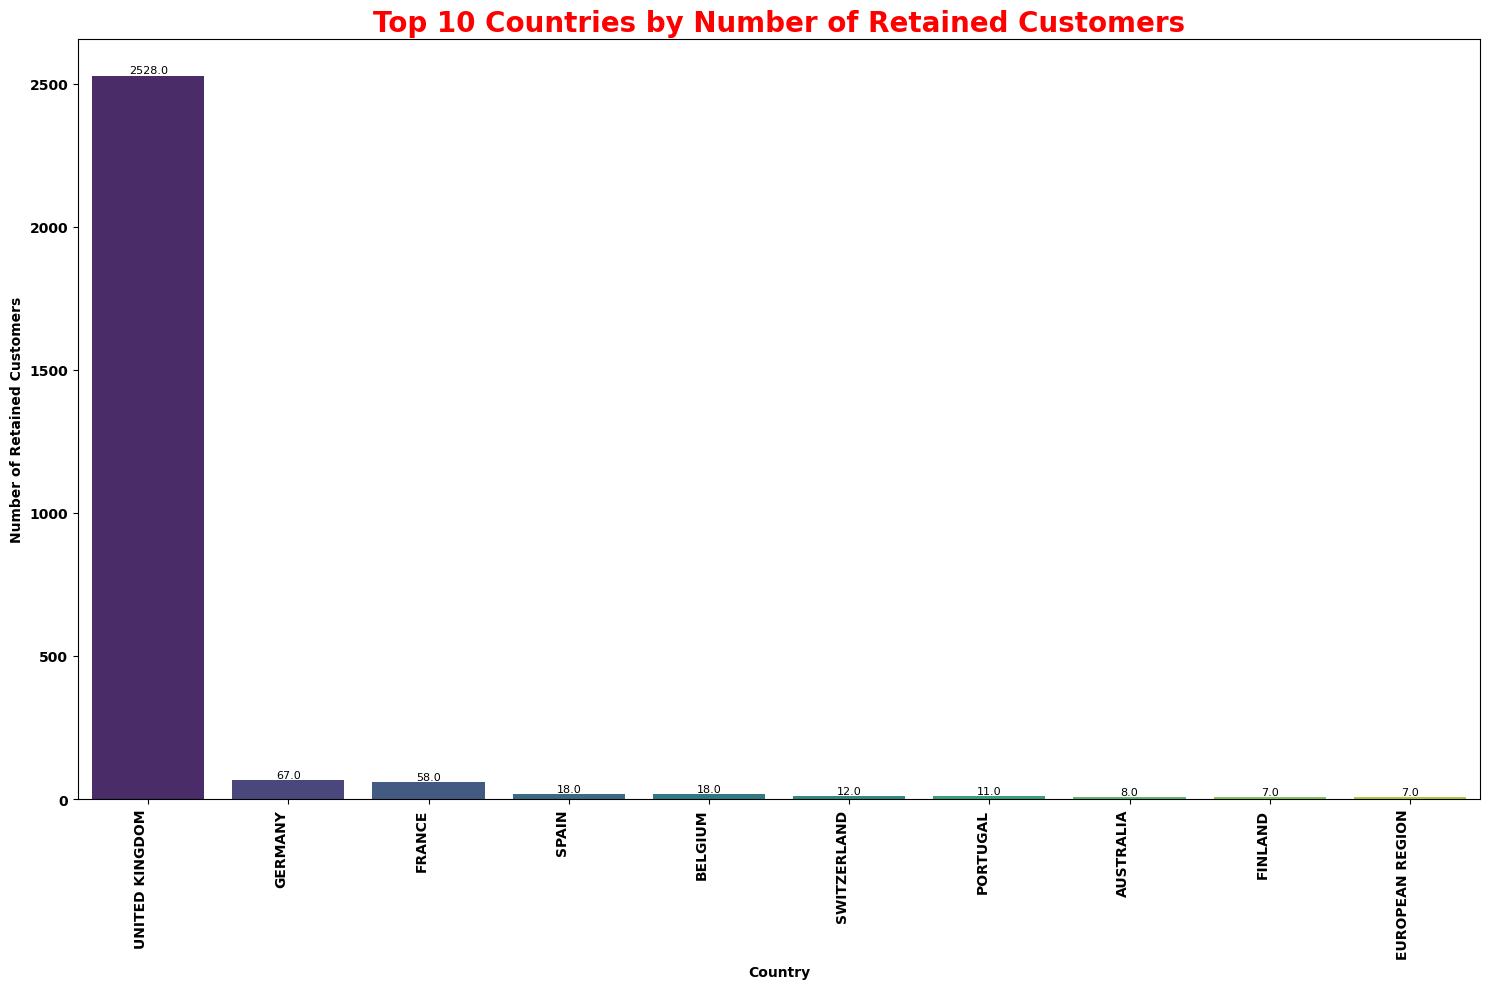

In [ ]:
plt.figure(figsize=(15,10) , dpi = 100),
plt.style.use('default')
barss = sns.barplot(x=top_retained_countries.index, y=top_retained_countries.values, palette = 'viridis')
plt.title(f'Top {top_n} Countries by Number of Retained Customers' ,weight = 'bold' ,c = 'red' ,  fontsize = 20)
plt.xlabel('Country' , weight = 'bold', c = 'k')
plt.ylabel('Number of Retained Customers' , weight = 'bold' , c = 'k')
plt.xticks(rotation = 90 , ha = 'right' , weight = 'bold')
plt.yticks(weight = 'bold')
for bar in barss.patches:
        barss.annotate('{:.1f}' . format(bar.get_height()),(bar.get_x()+0.4 , bar.get_height()+0.5),
                     ha = 'center' , va= 'bottom',
                    color = 'black' , size = 8, rotation = 0)
plt.tight_layout()
plt.savefig("Top 10 Countries by Number of Retained Customers" , dpi = 200)

In [ ]:
bottom_n_ = 10
bottom_retained_countries = retained_customers_by_country.tail(bottom_n_)

<ipython-input-468-a874b96117f3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barss = sns.barplot(x=bottom_retained_countries.index, y=bottom_retained_countries.values, palette = 'viridis')


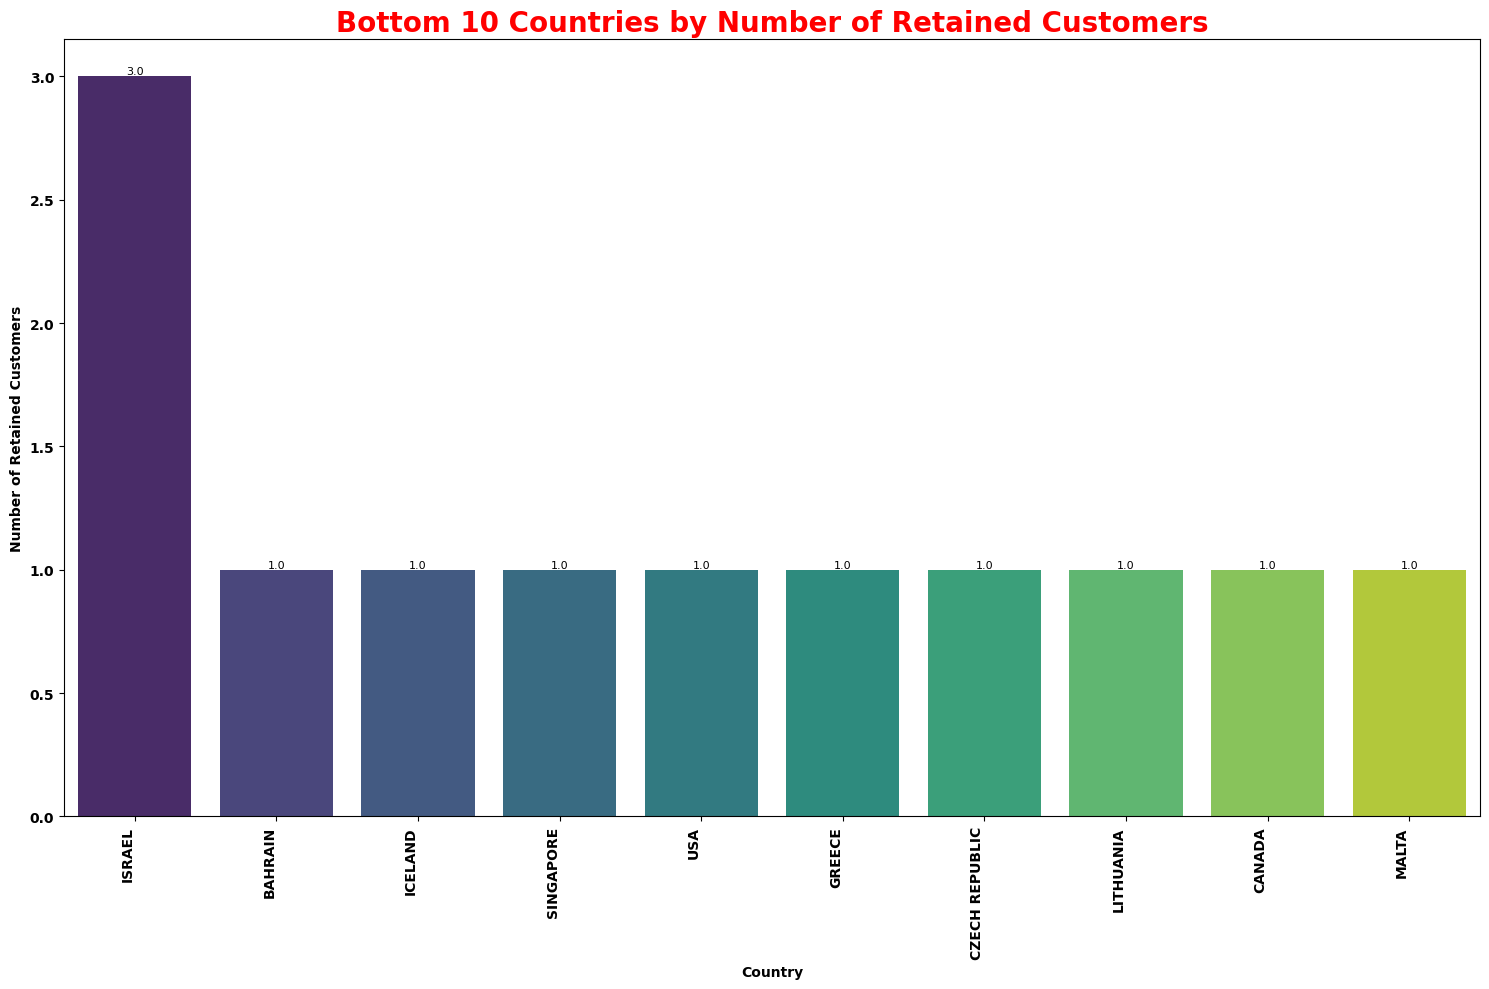

In [ ]:
plt.figure(figsize=(15,10) , dpi = 100),
plt.style.use('default')
barss = sns.barplot(x=bottom_retained_countries.index, y=bottom_retained_countries.values, palette = 'viridis')
plt.title(f'Bottom {top_n} Countries by Number of Retained Customers' ,weight = 'bold' ,c = 'red' ,  fontsize = 20)
plt.xlabel('Country' , weight = 'bold', c = 'k')
plt.ylabel('Number of Retained Customers' , weight = 'bold' , c = 'k')
plt.xticks(rotation = 90 , ha = 'right' , weight = 'bold')
plt.yticks(weight = 'bold')
for bar in barss.patches:
        barss.annotate('{:.1f}' . format(bar.get_height()),(bar.get_x()+0.4 , bar.get_height()),
                     ha = 'center' , va= 'bottom',
                    color = 'black' , size = 8, rotation = 0)
plt.tight_layout()
plt.savefig("Bottom 10 Countries by Number of Retained Customers", dpi = 200)

**Results**
1. Overall Retention Metrics:
 - Repeat Purchase Rate: 49.82% of
   customers made a repeat purchase.
 - Churn Rate: 0.51%. (This low rate
   suggests it might refer to a specific type of churn, possibly monthly churn for active customers, rather than overall customer attrition from the entire base).
 - Total Retained Customers: 2,793
   customers were retained.
2. Customer Retention Rate by  
   Acquisition Cohort:
 - The heatmap illustrates the  
   percentage of customers from each acquisition cohort (row) who made a purchase in subsequent months (column).
 - The 2010-12 acquisition cohort shows  100% retention in its acquisition   month, followed by consistently higher retention rates in subsequent months compared to later cohorts. For example, 30.9% in Jan 2011, 27.2% in Feb 2011, and a notable peak of 42.8% in Nov 2011, before a drop to 22.1% in Dec 2011.
 - Newer cohorts generally show a
   significant drop-off after the acquisition month, with retention rates in subsequent months typically ranging from 20% to 40%.
 - There is no data for retention beyond
   the month following the last observed acquisition (e.g., 2011-12 cohort only shows retention for Dec 2011).
3. Number of Retained Customers by Country:
 - UNITED KINGDOM (UK) leads    significantly with 2,528 retained customers, mirroring its dominance in customer acquisition.
 - Germany (67) and France (58) follow,
   but with substantially fewer retained customers than the UK.
 - Other countries like Spain (18),
   Belgium (18), Switzerland (12), and Portugal (11) have much smaller numbers of retained customers.
 - Many countries, particularly in the
   "Bottom 10," show very low retention, with most having only 1 or 2 retained customers (e.g., Bahrain, Iceland, Singapore, USA, Greece, Czech Republic, Lithuania, Canada, Malta, Brazil, Lebanon, Saudi Arabia, South Africa). Israel has 3 retained customers.

**Insights**
1. A repeat purchase rate of nearly 50% indicates that halfof the customers return to mke another purchase which is a strong indicator of customer satisfaction and product appeal. A very low churn rate of 0.51% is excellent, suggesting that once customers start purchasing, very few are leaving the platform entirely. The busiss has a solid foundation of returning customers. Efforts should focus on maintaining this high repeat purchase rate and low churn, possibly through loyalty programs, personalized offers, and excellent customer service.
2. Mirroring customer acquisition, the United Kingdom accounts for the vast majority of retained customers (2,528 out of 2,793). The UK market is not only the primary source of new customers but also where the business effectively retaining them. This reinforces the strategy of nurturing and expanding within the UK, while international markets might require more targeted retention efforts given their smaller bases.
3. The cohort retention heatmap shows a common pattern: a significant drop in retention after the first month of acquisition, followed by a more gradual decline or stablization around 30-40%. The 2010-12 cohort's retention remained robust for many months, even showing a spike in November 2011, but experienced a notable drop in December 2011. The first month post-acquisition is critical for customer retention. Investing in strong onboarding, immediate follow-ups, and value reinforcement during this period could significantly improve long-term customer engagement. The December 2011 retention drop for the 2010-12 cohort (and potentially others) aligns with the overall revenue dip and suggests a post-holiday drop-off or seasonal shift in purchasing behaviour, requiring specific strategies to re-engage customers in the new year.
4. Different acquisition cohorts exhibit varying retention patterns. Understanding these can help tailor retention efforts. By analyzing which cohorts have higher sustained retention, you can identify the characteristics of those customers or thr marketing/product strategies that led to their acquisition, and then replicate those for future cohorts. This analysis can also highlight cohorts with lower retention, prompting interventions to re-engage them.

# **Demographic Insights**

In [ ]:
#Calculating the Average Order Value by Country
order_values = df_sales_cleaned.groupby(['InvoiceNo' , 'Country'])['TotalTransactionValue'].sum().reset_index()
aov_by_country = order_values.groupby('Country')['TotalTransactionValue'].mean().sort_values(ascending = False)

In [ ]:
print("\nAverage Order Value by Country:\n" , aov_by_country)


Average Order Value by Country:
 Country
SINGAPORE               2098.722500
LEBANON                 1693.880000
HONG KONG               1304.055714
JAPAN                   1218.977857
BRAZIL                  1143.600000
NETHERLANDS             1132.446625
SWITZERLAND             1010.618750
SOUTH AFRICA            1002.310000
AUSTRALIA                960.334898
NORWAY                   950.866875
ISRAEL                   949.087500
UNITED ARAB EMIRATES     932.390000
DENMARK                  906.685556
GREECE                   877.114000
CYPRUS                   804.307143
USA                      716.078000
IRELAND                  707.066942
EUROPEAN REGION          700.768148
CANADA                   630.180000
ICELAND                  580.057143
PORTUGAL                 537.394082
SPAIN                    499.981379
AUSTRIA                  467.517647
FINLAND                  445.583846
ITALY                    438.618571
GERMANY                  437.593591
FRANCE                

<ipython-input-471-9c39bdabbcb2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_s = sns.barplot(x=aov_by_country.head(10).index, y=aov_by_country.head(10).values, palette = 'coolwarm')


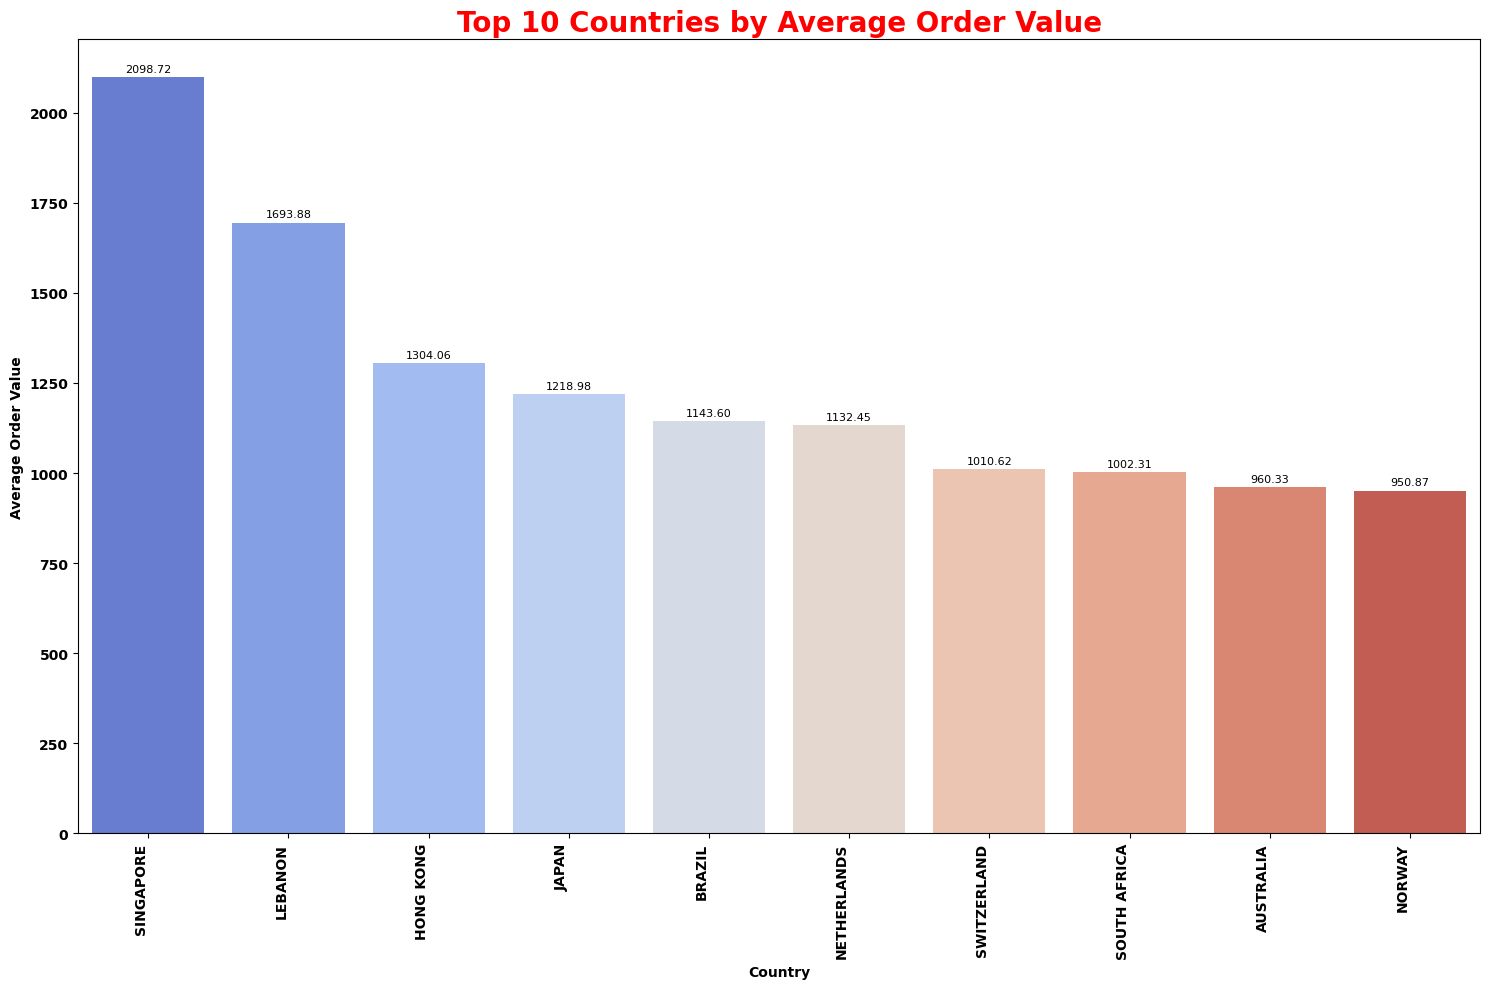

In [ ]:
#Plotting AOV by Country
plt.figure(figsize=(15,10) , dpi = 100),
plt.style.use('default')
bar_s = sns.barplot(x=aov_by_country.head(10).index, y=aov_by_country.head(10).values, palette = 'coolwarm')
plt.title('Top 10 Countries by Average Order Value' , weight = 'bold', c = 'red' , fontsize = 20)
plt.xlabel('Country' , weight = 'bold', c = 'k')
plt.ylabel('Average Order Value' , weight = 'bold' , c = 'k')
plt.xticks(rotation = 90 , ha = 'right' , weight = 'bold')
plt.yticks(weight = 'bold')
for p in bar_s.patches:
        bar_s.annotate('{:.2f}' . format(p.get_height()),(p.get_x()+0.4 , p.get_height()+10),
                     ha = 'center' , va= 'bottom',
                    color = 'black' , size = 8, rotation = 0)
plt.tight_layout()
plt.savefig('AOV by Top 10 Countries', dpi = 200)

In [ ]:
#Calculating the Average Quantity per Order by Country
order_quantities = df_sales_cleaned.groupby(['InvoiceNo' , 'Country'])['Quantity'].sum().reset_index()
avg_qty_country = order_quantities.groupby('Country')['Quantity'].mean().sort_values(ascending = False)

In [ ]:
print("\nAverage Quantity per Order by Country:\n" , avg_qty_country)


Average Quantity per Order by Country:
 Country
SINGAPORE               1113.250000
HONG KONG                621.714286
SWITZERLAND              539.729167
JAPAN                    526.571429
NORWAY                   513.625000
ISRAEL                   513.250000
CANADA                   492.500000
USA                      491.600000
UNITED ARAB EMIRATES     490.500000
NETHERLANDS              484.137500
LEBANON                  386.000000
DENMARK                  368.722222
BRAZIL                   356.000000
CYPRUS                   355.857143
SOUTH AFRICA             351.000000
IRELAND                  336.215827
AUSTRALIA                335.387755
CZECH REPUBLIC           335.000000
EUROPEAN REGION          317.407407
ICELAND                  316.857143
PORTUGAL                 314.816327
GREECE                   309.800000
SPAIN                    261.482759
OTHERS                   253.461538
FRANCE                   252.187335
GERMANY                  238.756818
AUSTRIA        

<ipython-input-474-90e6b2bb8641>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_s_ = sns.barplot(x=avg_qty_country.head(10).index, y=avg_qty_country.head(10).values, palette = 'coolwarm')


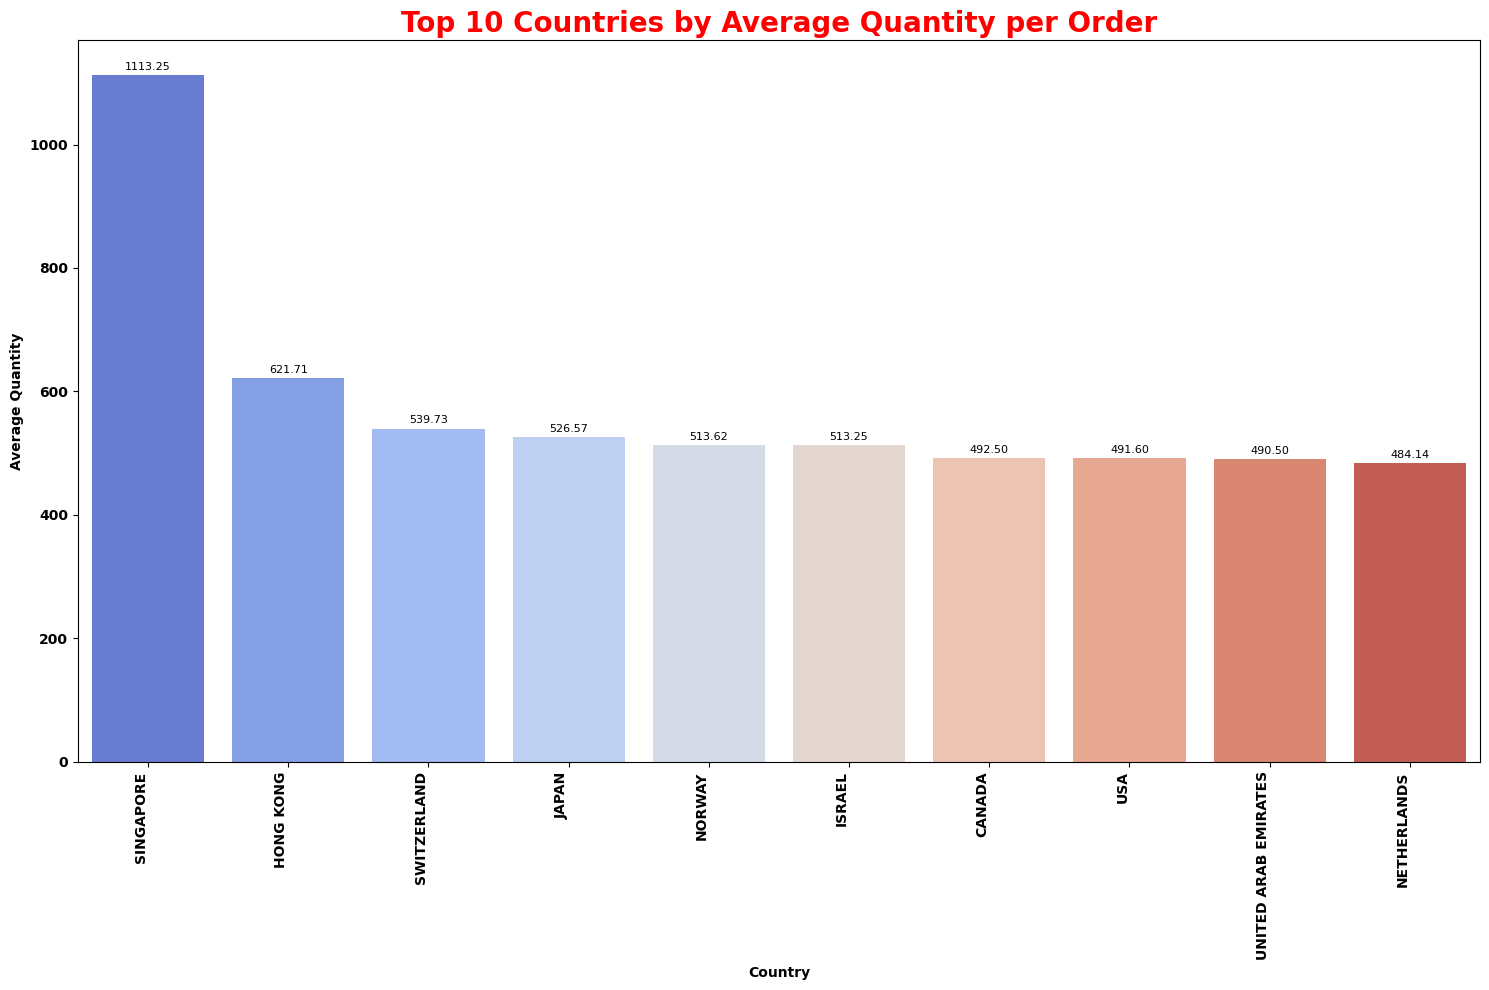

In [ ]:
#Plotting Average Quantity per Order by Country
plt.figure(figsize=(15,10) , dpi = 100),
plt.style.use('default')
bar_s_ = sns.barplot(x=avg_qty_country.head(10).index, y=avg_qty_country.head(10).values, palette = 'coolwarm')
plt.title('Top 10 Countries by Average Quantity per Order' , weight = 'bold', c = 'red' , fontsize = 20)
plt.xlabel('Country' , weight = 'bold', c = 'k')
plt.ylabel('Average Quantity' , weight = 'bold' , c = 'k')
plt.xticks(rotation = 90 , ha = 'right' , weight = 'bold')
plt.yticks(weight = 'bold')
for p in bar_s_.patches:
        bar_s_.annotate('{:.2f}' . format(p.get_height()),(p.get_x()+0.4 , p.get_height()+5),
                     ha = 'center' , va= 'bottom',
                    color = 'black' , size = 8, rotation = 0)
plt.tight_layout()
plt.savefig('AQO by Top 10 Countries' , dpi = 200)

**Results**
1. Average Order Value (AOV) by Country:
 - High AOV Countries: Singapore has the
   highest AOV at 2,098.72, followed by Lebanon (1,693.88), Hong Kong (1,304.06), Japan (1,218.98), and Brazil (1,143.60). These countries generally have higher AOV compared to the overall average.
 - Mid-Range AOV Countries: The   Netherlands, Switzerland, South Africa, Australia, Norway, Israel, UAE, and Denmark fall into a mid-range AOV, mostly above 900.
 - Lower AOV Countries: The United
   Kingdom, your primary market, has a relatively lower AOV of 376.69. Similarly, other major European markets like Germany (437.59) and France (434.34) also exhibit lower AOVs. The lowest AOVs are found in Saudi Arabia (145.92) and Bahrain (211.38).
2. Average Quantity per Order by Country:
 - High Average Quantity Countries:
   Mirroring AOV, Singapore leads with an average of 1,113.25 items per order. Hong Kong (621.71), Switzerland (539.73), Japan (526.57), and Norway (513.62) also show very high average quantities.
 - Lower Average Quantity Countries:
   Similar to AOV, the United Kingdom has a relatively low average quantity per order at 185.96 items. Germany (238.76) and France (252.19) also fall into this lower range. The lowest average quantities are observed in Saudi Arabia (80.00) and Bahrain (72.67).

**Insights**
1. Despite a lower number of customers, countries like Singapore, Lebanon, Hong Kong, Japan, and Brazil show significantly higher Average Order Values (AOV) and Average Quantity per Order compared to the core market, the United Kingdom. This indicates that customers from these regions, while fewer, tend to make larger, more valuable purchases when they do transact. These markets represent high-value niches. Instead of focusing solely on customer acquisition volume, strategies for these countries should prioritize maximizing the value of each transaction. This could involve curated product offerings, premium product lines, or special promotions designed for bulk or higher-value purchases. Targeted marketing to similar demographics or regions could yield significant returns.
2. The United Kingdom, while dominating in customer acquisition and retention, has a comparatively lower Average Order Value and Average Quantity per Order. This suggests that the UK market is driven by a high volume of smaller transactions. For the UK market, strategies should focus on increasing purchase frequency, encouraging repeat purchases (as the repeat purchase rate is alreadt healthy at ~50%), and potentially employing tactics to marginally increase AOV, such as suggestive selling, bundles for frequently purchased items, or loyalty programs that reward higher spend over time.
3. There's a clear geographical disparity in purchasing behaviour. European countries like Germnay, France, and Italy, while having more customers than the high-AOV Asian/Middle Eastern Countries, still show lower AOV and average quantities than the top tier, albeit slightly higher than the UK. This suggests that a one-size-fits-all strategy for all international market is inefficient. Tailor marketing messages, product assortments, and pricing strategies based on regional purchasing habits. For countries with lower AOV, focus on accessibility and value, while for high AOV countries, emphasize premium offerings and exclusive products.
4. There is a strong positive correlation between Average Order Value and Average Quantity per Order across countries. Countries with higher AOV generally also purchase a larger quantity of items per order, and vice-versa. This reinforces that customers in high-value markets are not just buying more expensive items, but alsi buying more items in general. This simplifies strategy, as efforts to increase quantity per order will likely also boost AOV. Conversely, if a country has low AOV, it's also likely buying fewer items.

# **Insights and Recommendations**

**Revenue Analysis: Dissect the Revenue Streams and Understand the Resources**

United Kingdom The UK is the dominant market in terms of both customer acquisition and customer retention. While its average order value is lower compared to some other countries, the sheer volume of customers and transactions from the UK makes it the largest revenue contributor. The "Revenue by Acquisition Cohort and Order Month" heatmap also primarily reflects the overall company revenue, which would be heavily weighted by the UK given its customer base size.
To fully dissect revenue streams and understand resources, a more detailed breakdown of total revenue by country, product category, or sales channel would be ideal, but based on the current data, the UK's significance is paramount.

**Marketing Effectiveness: Delve into Metrics Related to Customer Acquisition, Retention, and Engagement**

1. Customer Acquisition Trends:
 - High Initial Acquisition, then
   Decline: Customer acquisition started very strong in December 2010 but showed a general decline through parts of 2011, with a sharp drop again in December 2011. This suggests that initial marketing efforts in late 2010 were highly effective, but maintaining that momentum for new customer acquisition proved challenging in 2011.
 - Geographic Concentration: Acquisition
   efforts are overwhelmingly effective in the UK, which accounts for 92% of new customers. This indicates either highly successful UK-focused campaigns or less effective international outreach for new customers.
 - Resource Allocation Implication:
  Marketing resources for new customer acquisition should be re-evaluated. If the goal is broader international growth, more investment and tailored strategies are needed for non-UK markets. If the focus remains on the UK, understanding why acquisition declined in 2011 despite strong initial performance is crucial to re-optimize campaigns.

2. Customer Retention Metrics:
 - Strong Repeat Purchase and Low Churn:
   A repeat purchase rate of nearly 50% and a churn rate of 0.51% are excellent indicators of customer loyalty. This suggests that once customers are acquired, they generally find value and continue to purchase.
 - Cohort Retention Patterns: While
   there's an expected initial drop in retention after the first month of acquisition, rates tend to stabilize, with some cohorts showing sustained engagement. The 2010-12 cohort demonstrated particularly strong long-term retention.
 - Resource Allocation Implication:  
   Given the healthy retention rates, resources should continue to be allocated to customer retention programs, loyalty initiatives, and ensuring a positive post-purchase experience. Identifying the factors contributing to the strong performance of cohorts like 2010-12 (e.g., specific onboarding, product releases, or communication strategies during that period) could inform future retention efforts. The sharp drop in December 2011 retention across cohorts, mirroring the acquisition drop, suggests a need for targeted re-engagement campaigns during holiday periods to prevent post-holiday churn.

3. Engagement on Marketing Channels: The provided data does not directly include metrics on engagement on different marketing channels (social media, email campaigns, etc.). To fully assess marketing effectiveness and allocate resources, data on conversion rates from specific campaigns and channels would be needed.


**Demographic Insights: Understand the Demographics of the Customer Base**

1. Geographic Segmentation & Purchasing Behavior:
 - UK Segment: Characterized by a high
   volume of customers making frequent, but smaller, purchases (lower Average Order Value and Average Quantity per Order).
 - High-Value International Segments:
   Countries like Singapore, Lebanon, Hong Kong, and Japan represent niche segments with fewer customers but significantly higher Average Order Values and Average Quantity per Order. These customers appear to be making larger, less frequent, but more valuable purchases.
 - Other International Segments: Various European countries fall in between, with moderate customer numbers and AOV/quantity.
2. Missing Demographic Data: Information on age and gender is not available in the provided analysis.

**Personalized Marketing Strategies and Product Offerings based on Demographics:**

1. For the UK Market (Volume-Driven):
 - Marketing: Focus on driving purchase
   frequency through promotions, subscription models, or loyalty programs that reward repeat purchases. Marketing messages can highlight convenience, everyday value, and breadth of product range. Consider SMS marketing or frequent email newsletters with new arrivals or sales.
 - Product Offerings: Ensure a wide
   variety of affordable and frequently purchased items. Bundle smaller items together to gently increase AOV.

2. For High-Value International Markets (e.g., Singapore, Lebanon, Hong Kong, Japan):
 - Marketing: Tailor marketing to
   emphasize premium products, exclusivity, and quality over quantity. Focus on showcasing high-value items, special collections, or personalized shopping experiences. Digital marketing channels with strong visual appeal would be beneficial.
 - Product Offerings: Feature    higher-priced items, luxury goods, or unique products. Consider offering bundled sets of premium items. Shipping and return policies should be clear and customer-friendly to support larger international transactions.

3. For Other International Markets (e.g., Germany, France):
 - Marketing: A hybrid approach.   Leverage strong local marketing efforts but also explore opportunities to increase AOV through bundled offers or promoting slightly higher-value items than in the UK.
 - Product Offerings: A balanced mix of
   core products and some mid-range premium options.

4. Future Data Collection: To further enhance personalized strategies, collecting demographic data like age and gender would provide more granular segmentation and allow for highly targeted marketing campaigns and product development.